In [2]:
#environment 3Dtrackplot Python 3.9.15
import mpl_toolkits
from mpl_toolkits import mplot3d




In [17]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

from mpl_toolkits.mplot3d import axes3d

import os
import statistics
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [232]:
#if movies are in lots of different folders
file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output'
# folderpath='/Volumes/mas515/home/CP_MOVIE2/movie_output'
folderpath='/Volumes/mas515/home/CP_MOVIE2/movie_output230717'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output'
# folderpath='/Volumes/mas515/home/CP_MOVIE2/movie_output'
folderpath='/Volumes/mas515/home/CP_MOVIE2/movie_output230717'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0          1779            1                 NaN                    NaN   
1          1782            1                 NaN                    NaN   
2          1419            1                 NaN                    NaN   
3          1420            1                 NaN                    NaN   
4          1015            1                 NaN                    NaN   
..          ...          ...                 ...                    ...   
615         211            1                 NaN                    NaN   
616         212            1                 NaN                    NaN   
617         213            1                 NaN                    NaN   
618         214            1                 NaN                    NaN   
619         215            1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
0                 NaN    

In [240]:
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/movie_full.csv') 
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/old_movie_full.csv')
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/230725_movie_some.csv')
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/230728_cp_movies.csv')

      ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             274            1                 NaN                    NaN   
1             274            2                 NaN                    NaN   
2             275            1                 NaN                    NaN   
3             275            2                 NaN                    NaN   
4             275            3                 NaN                    NaN   
...           ...          ...                 ...                    ...   
13822         211            1                 NaN                    NaN   
13823         212            1                 NaN                    NaN   
13824         213            1                 NaN                    NaN   
13825         214            1                 NaN                    NaN   
13826         215            1                 NaN                    NaN   

       Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \

In [241]:
#back up #importing the metadata
#make sure that date is in reverse format for both imaging date and acquisition date 23-07-17
# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(data)
# data.to_csv('/Users/secchim/Documents/221104TEST.csv')
data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/230728_cp_movies.csv')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/2919454780.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


      ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             274            1                 NaN                    NaN   
1             274            2                 NaN                    NaN   
2             275            1                 NaN                    NaN   
3             275            2                 NaN                    NaN   
4             275            3                 NaN                    NaN   
...           ...          ...                 ...                    ...   
13604        1422            1                 NaN                    NaN   
13605        1423            1                 NaN                    NaN   
13606        1424            1                 NaN                    NaN   
13607        1425            1                 NaN                    NaN   
13608        1426            1                 NaN                    NaN   

       Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \

In [94]:
#TRACK ID IS UNIQUE PER CELL PER MOVIE
data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/230728_cp_movies.csv', header=0)

data['Track_ID'] = 'X'
#the + only work with strings
data['Track_ID']=(data['Metadata_VWF']) +'_'+((data['Intensity_MaxIntensity_track']).astype(str))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPbin.csv', index=False)

#Normalize to stage position 
#because lacking imgWidth and imgHeight, normalizing to center of the image as 0 
# (meaning the absolute positions will be off by half the image size)

## Convert xPos and yPos to stage coordinates
def convertToStagePos(xPos, yPos,  imageCenterStageX, imageCenterStageY, data_name):
    CenterAsStageX = imageCenterStageX + xPos
    CenterAsStageY = imageCenterStageY + yPos
    # return CenterAsStageX, CenterAsStageY
    # print(CenterAsStageX, CenterAsStageY)
    data_name['corrected_x']=CenterAsStageX
    data_name['corrected_y']=CenterAsStageY

convertToStagePos(data['Location_Center_X'], data['Location_Center_Y'], data['Position_X'], data['Position_Y'], data)
# data['corrected_x']=CenterAsStageX
# data['corrected_y']=CenterAsStageY

print(data['corrected_x'])

0        65878.060104
1        65859.725974
2        65877.644444
3        65860.838514
4        65754.692754
             ...     
13604   -14268.654682
13605   -14267.740000
13606   -14269.497054
13607   -14269.554195
13608   -14269.383333
Name: corrected_x, Length: 13609, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/1986243023.py:2: DtypeWarning: Columns (512) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/230728_cp_movies.csv', header=0)


In [95]:
#REMOVE CELLS THAT WERE NOT TRACKED IN TRACKMATE
print(data.index)
data= data[data['Intensity_MaxIntensity_track'] != 0] #worked
print(data.index)

RangeIndex(start=0, stop=13609, step=1)
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13599, 13600, 13601, 13602, 13603, 13604, 13605, 13606, 13607,
            13608],
           dtype='int64', length=13607)


In [96]:
#time per timepoint

# print(str(data['AcquisitionDate']),str(data['AcquisitionTime']))
#https://docs.python.org/3/library/datetime.html#timedelta-objects

data['Timeframe_Time']=data['AcquisitionTime']
for i in data.index:
    # tpt=data['Metadata_Timepoint'][i]
    # print(tpt)
    # data['Timeframe_Time']=data['AcquisitionTime'][i]+ datetime.timedelta(minutes=tpt *3)
    # print(data['Timeframe_Time'])
    # print(datetime.time(data['AcquisitionTime'][i]))
    #worked
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'Metadata_Timepoint'])))
    # data.loc[i, 'Treat_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment'])))
    # print(data.loc[i, 'Timeframe_Time'])
    #didnt work
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+timedelta(minutes=int(3*(data['Metadata_Timepoint'][i])))
    #worked
    #  data['Timeframe_Time']=(time.fromisoformat(data['AcquisitionTime'][i]))
    #didnt work 
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+(timedelta(minutes=int(3*(data['Metadata_Timepoint'][i]))))

# print(data['Timeframe_Time'])



#relative time per timepoint

data['Relative_treatment_Time']=data['Time of treatment']
for i in data.index:
    # print(type(data.loc[i,'Time of treatment']))
    if type(data.loc[i,'Time of treatment'])!=float:
        if data.loc[i, 'Time of treatment']=='na':
            data.loc[i, 'Relative_treatment_Time']=0
        else:
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment'])))))/60
            # print(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'Treat_Time']))))
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment']))))))/60
            if data.loc[i,'Treatment']=='24h_depletion':
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'AcquisitionDate']+' '+(data.loc[i, 'Time of treatment']))))+timedelta(days=1)))/60
            else:
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i,'AcquisitionDate']+' '+(data.loc[i,'Time of treatment'])))))/60
    else:
        data.loc[i, 'Relative_treatment_Time']=0
# print(data['Relative_treatment_Time'])
# print(data)
# print(datetime.fromisoformat(data['AcquisitionDate'][i]+' '+data['Timeframe_Time'][i]))

# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/CP_output/movie_half.csv')

In [97]:
#correcting treatment 

data['Treatment_corrected']=data['Treatment']
for i in data.index:
    if data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='24h_depletion':
        data.loc[i, 'Treatment_corrected']='24h_depletion'
    else:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    print(data.loc[i, 'Treatment_corrected'], data.loc[i, 'Relative_treatment_Time'], data.loc[i, 'Treatment'])

#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
data['corrected_x_2']=data['Location_Center_X']
data['corrected_y_2']=data['Location_Center_Y']
data['corrected_z_2']=data['Location_Center_Z']
data['norm_x']=0
grouped=data.groupby(['Track_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['Location_Center_X'].values
    norm_y=newdf2['Location_Center_Y'].values
    norm_z=newdf2['Location_Center_Z'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

Depletion 12.216666666666667 plt_depletion
Depletion 12.216666666666667 plt_depletion
Depletion 15.216666666666667 plt_depletion
Depletion 15.216666666666667 plt_depletion
Depletion 15.216666666666667 plt_depletion
Depletion 15.216666666666667 plt_depletion
24h_depletion 1496.6333333333334 24h_depletion
24h_depletion 1496.6333333333334 24h_depletion
24h_depletion 1499.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1502.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1505.6333333333334 24h_depletion
24h_depletion 1508.6333333333334 24h_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3550748759.py:30: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


       Unnamed: 0  ImageNumber  ObjectNumber  Metadata_Channelnb  \
13539       13539          161             1                 NaN   
13537       13537          158             2                 NaN   
13536       13536          158             1                 NaN   
13538       13538          160             1                 NaN   
13247       13247          163             2                 NaN   
...           ...          ...           ...                 ...   
6724         6724         3663             2                 NaN   
6733         6733         3671             1                 NaN   
6725         6725         3663             3                 NaN   
6732         6732         3670             1                 NaN   
6742         6742         3679             2                 NaN   

       Metadata_FileLocation  Metadata_Format1  Metadata_Format2  \
13539                    NaN               NaN               NaN   
13537                    NaN               NaN 

In [98]:
#added these lines when not calculating FINAL CELL ID -by connecting track I think is what I meant
data['Cell_group']=data['FileID']+'_'+data['Cell_name']
data['Final_Cell_ID']=data['Track_ID']
######
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf.sort_values(by=['Timeframe_Time'])
    print(newdf['Timeframe_Time'])
    dflist.append(newdf)
data=pd.concat(dflist)   

#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3729721243.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13539    2021-11-25 13:21:46
Name: Timeframe_Time, dtype: object
13537    2021-11-25 13:12:46
Name: Timeframe_Time, dtype: object
13536    2021-11-25 13:12:46
Name: Timeframe_Time, dtype: object
13538    2021-11-25 13:18:46
Name: Timeframe_Time, dtype: object
13247    2021-11-25 13:09:46
13250    2021-11-25 13:12:46
Name: Timeframe_Time, dtype: object
13246    2021-11-25 13:09:46
13251    2021-11-25 13:15:46
13252    2021-11-25 13:18:46
13253    2021-11-25 13:21:46
13254    2021-11-25 13:24:46
Name: Timeframe_Time, dtype: object
13248    2021-11-25 13:12:46
Name: Timeframe_Time, dtype: object
13249    2021-11-25 13:12:46
Name: Timeframe_Time, dtype: object
12883    2021-11-25 15:03:54
12892    2021-11-25 15:06:54
12895    2021-11-25 15:09:54
12905    2021-11-25 15:15:54
12909    2021-11-25 15:18:54
Name: Timeframe_Time, dtype: object
12894    2021-11-25 15:09:54
12900    2021-11-25 15:12:54
Name: Timeframe_Time, dtype: object
12906    2021-11-25 15:15:54
12910    2021-11-25 15:18:54
12

In [99]:
#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Timeframe_Time"])== (newdf['Timeframe_Time'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
        dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# calculate distance between timeframes
data['distance']= None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(mt.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(mt.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    # dflist.append(newdf)
        dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()




/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3878859721.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3878859721.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247      3.2785
13250        None
13246    2.551047
13251    0.746216
13252     1.05935
           ...   
6746     0.431016
6747     0.520181
6748         None
6722     0.861926
6724         None
Name: distance, Length: 9717, dtype: object


In [100]:
#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf.dropna()
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2701469315.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247     3.278500
13250     3.278500
13246     4.742191
13251     4.742191
13252     4.742191
           ...    
6746     23.885961
6747     23.885961
6748     23.885961
6722      0.861926
6724      0.861926
Name: track_length, Length: 9717, dtype: float64


In [101]:
#calculate displacement for every timepoint
data['displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    #The lines below used to work and stopped working because somehome so df ended up with more than 1 value stored
    # stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    # stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    # stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    #This fixes it as all normalized positions should start with 0
    stored_X0=0
    stored_Y0=0
    stored_Z0=0
    # print(type(newdf['corrected_x_2']))
    # newdf['corrected_x_2']=newdf['corrected_x_2'].astype(float)
    # print(type(newdf['corrected_x_2']))
    # newdf['corrected_y_2']=newdf['corrected_y_2'].astype(float)
    # newdf['corrected_z_2']=newdf['corrected_z_2'].astype(float)
    for b, r in newdf.iterrows():
        # newdf.loc[b,'corrected_x_2']=newdf.loc[b,'corrected_x_2'].astype(float)
        # newdf.loc[b,'corrected_y_2']=newdf.loc[b,'corrected_y_2'].astype(float)
        # newdf.loc[b,'corrected_z_2']=newdf.loc[b,'corrected_z_2'].astype(float)
        # newdf.loc[b, "displacement"]=mt.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
        newdf.loc[b, "displacement"]=mt.sqrt((newdf.loc[b,"corrected_x_2"]-stored_X0)**2+(newdf.loc[b,"corrected_y_2"]-stored_Y0)**2+(newdf.loc[b,"corrected_z_2"]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/1569066875.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247         0.0
13250      3.2785
13246         0.0
13251    2.551047
13252    2.943406
           ...   
6746     6.972178
6747     7.304455
6748     7.215858
6722          0.0
6724     0.861926
Name: displacement, Length: 9717, dtype: object


In [102]:
#maximum displacement
data['max_displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3757265841.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247    3.278500
13250    3.278500
13246    3.855261
13251    3.855261
13252    3.855261
           ...   
6746     7.304455
6747     7.304455
6748     7.304455
6722     0.861926
6724     0.861926
Name: max_displacement, Length: 9717, dtype: float64


In [103]:
#mean speed in um/sec
#potentially wrong
#gives NaN for cells that have only one timepoint so these cells were removed in the if statement


data['mean_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        mean_speed=newdf['track_length']/((newdf['Timeframe_Time'].max()-newdf['Timeframe_Time'].min()).total_seconds())
        newdf['mean_speed']=mean_speed
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/3691026993.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247    0.018214
13250    0.018214
13246    0.005269
13251    0.005269
13252    0.005269
           ...   
6746     0.006032
6747     0.006032
6748     0.006032
6722     0.004788
6724     0.004788
Name: mean_speed, Length: 9717, dtype: float64


In [104]:
data['Timeframe_Time_next']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        # newdf=newdf.drop_duplicates()
        newdf["Timeframe_Time_next"] = newdf["Timeframe_Time"].shift(-1)
        dflist.append(newdf)
data=pd.concat(dflist)
print(data[["Timeframe_Time_next","Timeframe_Time"]])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/294060620.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


       Timeframe_Time_next       Timeframe_Time
13247  2021-11-25 13:12:46  2021-11-25 13:09:46
13250                 None  2021-11-25 13:12:46
13246  2021-11-25 13:15:46  2021-11-25 13:09:46
13251  2021-11-25 13:18:46  2021-11-25 13:15:46
13252  2021-11-25 13:21:46  2021-11-25 13:18:46
...                    ...                  ...
6746   2023-06-19 21:25:57  2023-06-19 21:22:57
6747   2023-06-19 21:28:57  2023-06-19 21:25:57
6748                  None  2023-06-19 21:28:57
6722   2023-06-19 20:25:57  2023-06-19 20:22:57
6724                  None  2023-06-19 20:25:57

[9717 rows x 2 columns]


In [105]:
#frame speed
data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False :#and ((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds())!=0: 
                #used to work, now I don't understand why the time of the next frame can be equal to the time of the current frame, could it be segmented by CP as 2 KuO but 1 track
                #this line calculates the time between one frame and the next
                # newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time_next']-newdf.loc[(b),'Timeframe_Time']).total_seconds()))
                #this line assumes 180s between frames
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/180)

            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                # newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])

#TROUBLESHOOTING THE WHY I HAVE DUPLICATES
# x=data[['Final_Cell_ID','Timeframe_Time']]
# x['test']=x['Final_Cell_ID']+x['Timeframe_Time'].astype(str)
# df_list=[]
# grouped=x.groupby(['test'])
# for i, newdf in grouped:
#     if newdf.shape[0]>1:
#         df_list.append(newdf['test'])
# pb=pd.concat(df_list)
# pb.to_csv('/Users/secchim/Documents/pb.csv')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/1551052979.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247    0.018214
13250        None
13246    0.014172
13251    0.004146
13252    0.005885
           ...   
6746     0.002395
6747      0.00289
6748         None
6722     0.004788
6724         None
Name: frame_speed, Length: 9717, dtype: object


In [106]:
#linearity coefficient

data['linearity_coefficient']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/170172036.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247    1.000000
13250    1.000000
13246    0.812970
13251    0.812970
13252    0.812970
           ...   
6746     0.305805
6747     0.305805
6748     0.305805
6722     1.000000
6724     1.000000
Name: linearity_coefficient, Length: 9717, dtype: float64


In [107]:
#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

data['arrest_coefficient']=False
data=data.drop_duplicates()
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrest_coefficient'])



# #   for b, r in newdf.iterrows(): 
# #         # print(b)
# #         try:
# #             newdf.loc[b, "distance"]=(mt.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
# #             # newdf["distance"]=(mt.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
        

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2597267752.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247     True
13250    False
13246     True
13251     True
13252     True
         ...  
6746      True
6747      True
6748     False
6722      True
6724     False
Name: arrested, Length: 9717, dtype: bool


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2597267752.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


13247    0.500000
13250    0.500000
13246    0.800000
13251    0.800000
13252    0.800000
           ...   
6746     0.952381
6747     0.952381
6748     0.952381
6722     0.500000
6724     0.500000
Name: arrest_coefficient, Length: 9717, dtype: float64


In [108]:
number_of_cells=data['Final_Cell_ID'].unique()
print(len(number_of_cells)) #1889

grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>10:
        dflist.append(newdf)
dx=pd.concat(dflist)
print(len(dx['Final_Cell_ID'].unique())) #232



1889


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/524528611.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


232


In [22]:
# #exporting data

# # data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv')
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv')

In [ ]:
###### CHECKING MISSING MOVIES because the second CP pipeline failed
# import os

correct_file=[]
missing_file=[]

filepath='/Users/secchim/Downloads/movie_output'

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:        
        if file.endswith("Experiment.csv"):
            nfile=os.path.join(root,file)
            nfile=nfile[38:-22]
            if nfile not in correct_file:
                # print(nfile)
                correct_file.append(nfile)

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:
            if file.endswith(".tiff"):
                xfile=os.path.join(root,file)
                xfile=xfile[38:-(len(file)+1)]
                if xfile not in missing_file and xfile not in correct_file:
                    # print(xfile)
                    missing_file.append(xfile)


# print('correct_file', correct_file)
print('file_missing from downstream folders', missing_file)


In [257]:
#Checking the number of movies that have 2 cells in one frame

grouped=data.groupby(['Metadata_VWF'])
multiple_cells_movie=[]
for i, newdf in grouped:
    newdf= newdf[['Track_ID', 'Metadata_Timepoint']].drop_duplicates()
    for tmpt in newdf['Metadata_Timepoint']:
        newdf2=newdf[newdf['Metadata_Timepoint']==tmpt]
        if newdf2.shape[0]>1 and i not in multiple_cells_movie:
            multiple_cells_movie.append(i) 

print(len(multiple_cells_movie), multiple_cells_movie)

#for manual file:
#majuscule
#rename VWF_065 VWF_066
# df['FileID']=df['file'].str[0:19].str.upper()
#df['FileID].str.replace(r'VWF_065','VWF_066')
#x,y,z
#if filename - czi in 

#/Users/secchim/Downloads/CellProfiler/movie_processing/230102_movie_output/trackcorrect.csv
#/Users/secchim/Downloads/manual_tracks230711.csv

#grouped=df.groupby('Final_Cell_ID)
#for i, newdf in grouped:
###for i in df['Final_Cell_ID'].unique():
#    storedX=newdf[newdf['Metadata_Timepoint]==0]['x']
    #storedY=newdf[newdf['Metadata_Timepoint]==0]['y']
    #storedID=newdf[newdf['Metadata_Timepoint']==0]['FileID']
    #autodf=data[data['FileID]==storedID]
    #for b,r in autodf.iterrows():
        #if autodf.loc[b,'Location_Center_X]in range(storedX-10,storedX+10)and autodf.loc[b,'Location_Center_Y]in range(storedY-10,storedY+10):
            #newdf['manu_ID]=autodf.loc[b,'Final_Cell_ID']
#    


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/2787587694.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


167 ['VWF_043_MS211125_m3-homeostasis_movie2_P4', 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+', 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+', 'VWF_043_MS211125_m3-homeostasis_movie_M1', 'VWF_043_MS211125_m3-homeostasis_movie_P4', 'VWF_043_MS211126_m4-homeostasismovie_2_P12+', 'VWF_043_MS211126_m4-homeostasismovie_2_P7++', 'VWF_043_MS211126_m4-pltdepletionmovie2_P7++', 'VWF_043_MS211126_m4-pltdepletionmovie3_P17+', 'VWF_043_MS211126_m4-pltdepletionmovie3_P7++', 'VWF_045_MS211208_M2_movie3_P22', 'VWF_045_MS211208_M2_movie6_P24', 'VWF_048_MS220118_M3_movie2homeostasis_P12+', 'VWF_048_MS220118_M3_movie2homeostasis_P13+', 'VWF_048_MS220118_M3_movie2homeostasis_P14+', 'VWF_048_MS220118_M3_movie3plt_P6DP+', 'VWF_048_MS220118_M3_movie4plt_P27+', 'VWF_048_MS220118_M3_movie4plt_P6DP+', 'VWF_048_MS220118_M3_movie5plt_P22+', 'VWF_048_MS220118_M3_movie5plt_P27+', 'VWF_048_MS220118_M3_movie5plt_P6DP+', 'VWF_048_MS220119_M1_homeostasis_movie_2_P17DP', 'VWF_048_MS220119_M1_homeostasis_movi

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/2541676582.py:10: DtypeWarning: Columns (498,502,507,508,509,510,512,513,533) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/2541676582.py:23: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P10spot_0.0001525902189314'
 'VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_4.577706567943096e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_7.629510946571827e-05'
 'VWF_062_MS220421_M5_MOVIE2_P19_4.577706567943096e-05'
 'VWF_066_MS220522_M1_movie2_P10DP_1.5259021893143654e-05'
 'VWF_066_MS220522_M4_pmovie2_P2kuomk_1.5259021893143654e-05'
 'VWF_091_MS230402_M1_movie_P2_3.051804378628731e-05'
 'VWF_091_MS230402_M2_movie_depletion_P8DP_1.5259021893143654e-05'
 'VWF_091_MS230402_M2_movie_depletion_P8DP_3.051804378628731e-05'
 'VWF_091_MS230402_M2_movie_depletion_P8_0.000106813153252'
 'VWF_091_MS230402_M2_movie_depletion_P8_1.5259021893143654e-05'
 'VWF_091_MS230402_M2_movie_depletion_P8_7.629510946571827e-05'
 'VWF_091_MS230402_M2_movie_homeostasis_P8DP_0.0001220721751451'
 'VWF_091_MS230402_M2_movie_homeostasis_P8DP_1.5259021893143654e-

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/2541676582.py:89: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='track_length'>

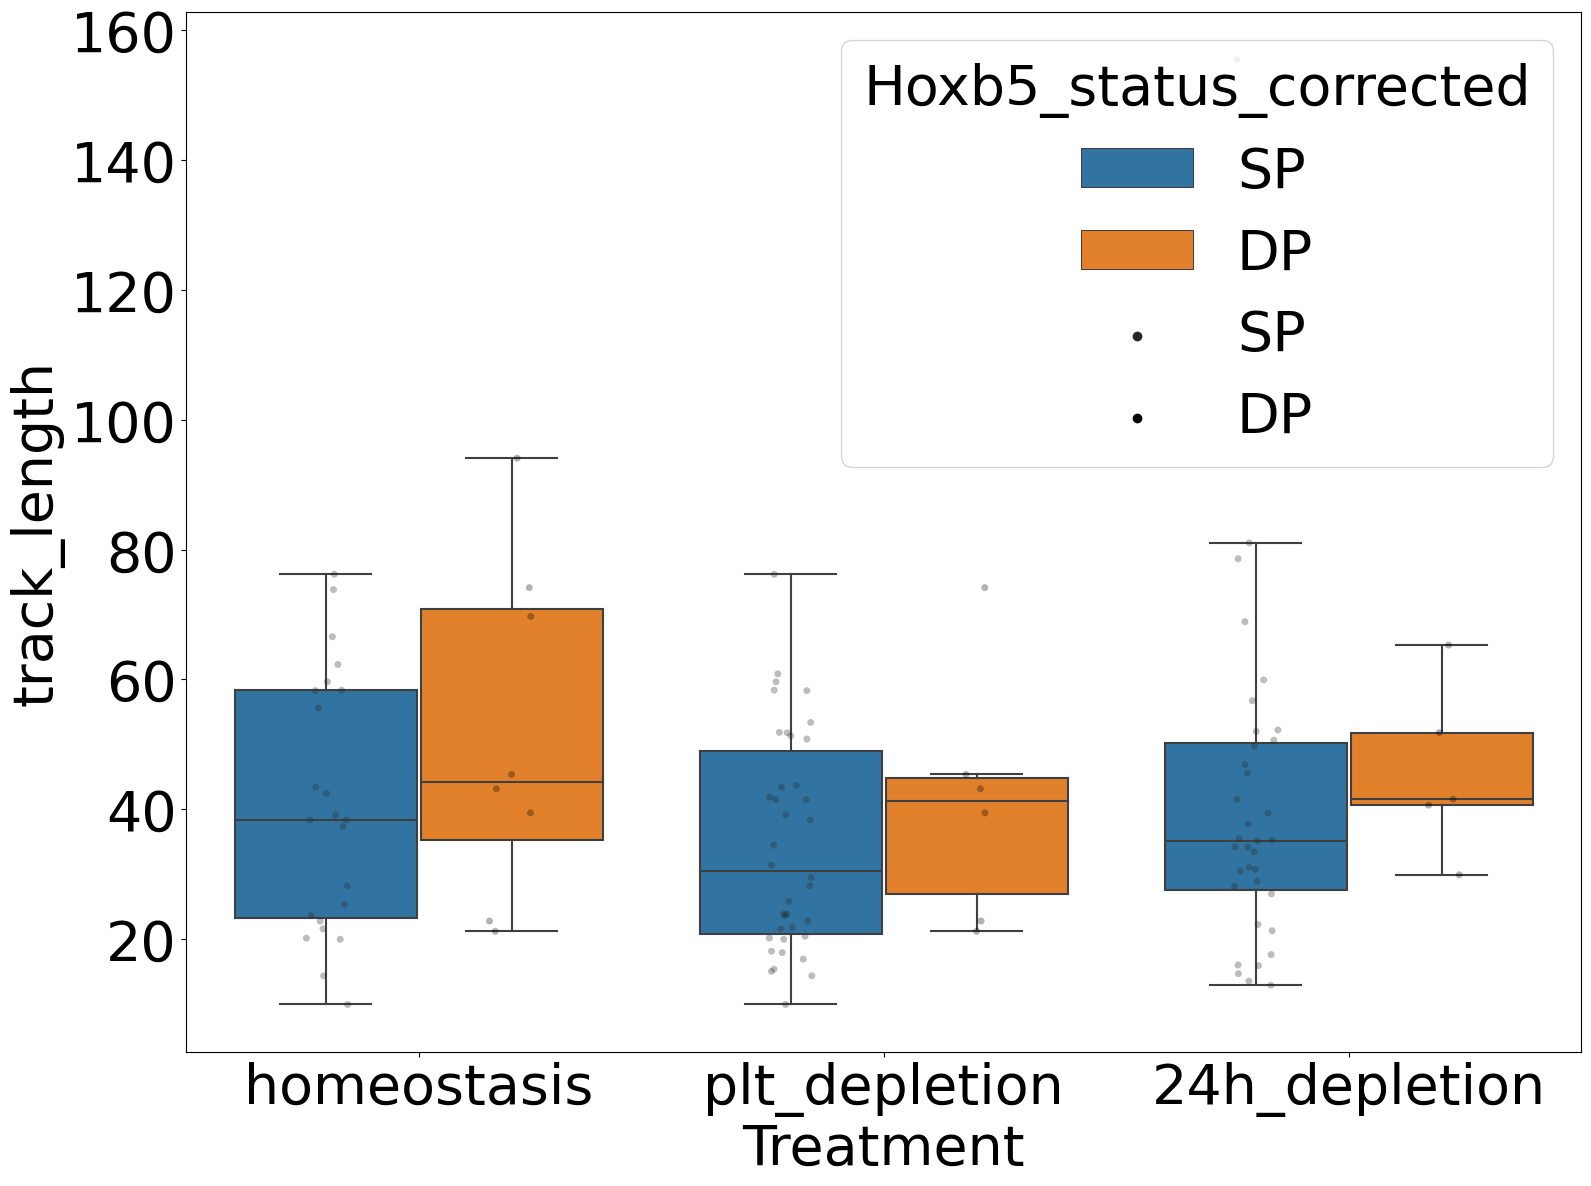

In [263]:
#PLOTTING RESULTS of track length
# 

#Either:
# datax=data
#Or
# data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 5:#was 3
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'
        # print('DP', i)
    # else:
        # datax.loc[i,'Hoxb5_status_corrected']='SP'
        # print('SP', i)
# print(datax)
# print(len(datax))
# dx=datax.drop_duplicates()
# print(len(dx))
# print(dx['Relative_treatment_Time']=='na')



#IS THIS THE RIGHT PLACE FOR IT?
# #CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
# #SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
# grouped=data.groupby(['Final_Cell_ID'])
# # print(grouped)
# for i, newdf in grouped:
#     newdf=newdf[newdf['Hoxb5_status'] == 'DP']
#     # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
#     count_DP=newdf.shape[0]
#     # print(count_DP)
#     # if count_DP > (len(newdf.index))/2:
#     if count_DP > 3:
#         Hoxb5Vwf_cells.append(i) #137
# # # print(Hoxb5Vwf_cells)

# Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
# # print(Hoxb5Vwf_list)

# grouped=data.groupby(['Final_Cell_ID'])
# for i, newdf in grouped:
#     if i in Hoxb5Vwf_list:
#         newdf['Hoxb5_status_corrected']='DP'
#     else:
#         newdf['Hoxb5_status_corrected']='SP'
#     dflist.append(newdf)
# data=pd.concat(dflist)

# https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'track_length']]#or datax

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=18:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))


dx=datab.drop_duplicates()
dx=dx[dx['track_length']!=0]

# print(dx)
sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="track_length", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="track_length", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68139/780754991.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68139/780754991.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_045_MS211208_M2_movie3_P21_1.5259021893143654e-05
VWF_045_MS211208_M2_movie6_P24_1.5259021893143654e-05
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05
VWF_048_MS22

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='Track_length_in_timepoint'>

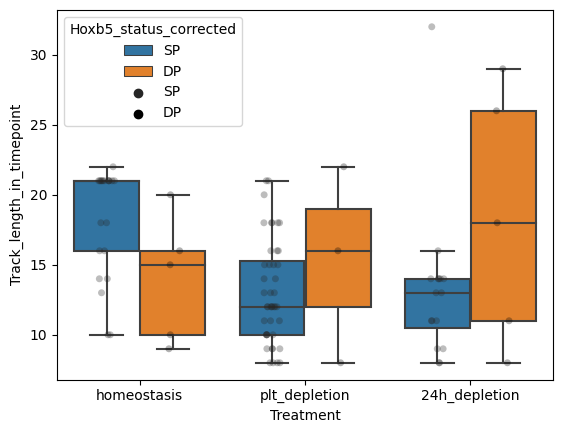

In [5]:
#ONLY RUN ONCE OTHERWISE TRACKED COEFFICIENT CHANGES!!!

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'Nframes']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)

df_list =[]
datab['Tracked_coefficient']=None
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    newdf['Track_length_in_timepoint']=newdf.shape[0]
    for r in newdf.index:
        newdf.loc[r, 'Tracked_coefficient']=newdf.loc[r,'Track_length_in_timepoint']/newdf.loc[r,'Nframes']
    df_list.append(newdf)
datab=pd.concat(df_list)
# print(len(datab))
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab['Tracked_coefficient'])

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)

dx=datab.drop_duplicates()
# print(dx)
sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


# sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y='Tracked_coefficient', data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y='Tracked_coefficient', data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/470526284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/470526284.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/470526284.py:19: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of lengt

VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_045_MS211208_M2_movie3_P21_1.5259021893143654e-05
VWF_045_MS211208_M2_movie6_P24_1.5259021893143654e-05
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05
VWF_048_MS22

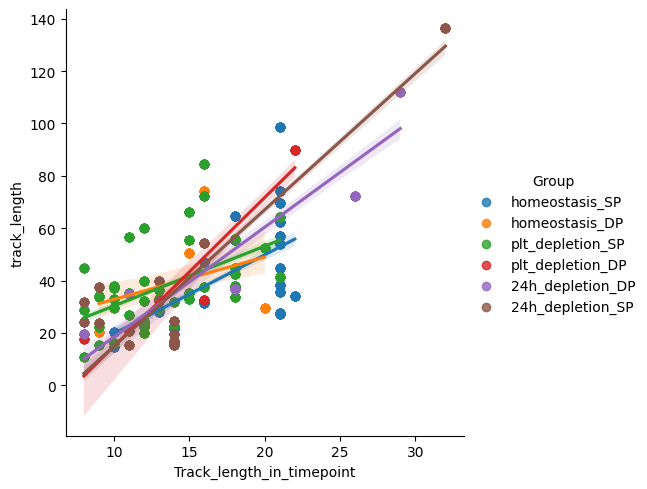

In [15]:
#PRINT TRACK LENGTH AS A FUNCTION OF TIME LENGTH 

datax=datax[datax['track_length']!=0]
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'Nframes', 'track_length']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
# print(len(datab))
datab.dropna()
df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)

df_list =[]
datab['Tracked_coefficient']=None
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    newdf['Track_length_in_timepoint']=newdf.shape[0]
    df_list.append(newdf)
datab=pd.concat(df_list)

##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
# fig, ax = plt.subplots(figsize=(12,9))#6,4.5
# g=sns.scatterplot(x="Track_length_in_timepoint", y="track_length", data=datab, hue='Hoxb5_status_corrected', style='Treatment')
# sns.scatterplot(x="Track_length_in_timepoint", y="track_length", data=datab, hue='Hoxb5_status_corrected', style='Treatment')

# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# sns.lineplot(data=datab, x="Track_length_in_timepoint", y="track_length", hue='Hoxb5_status_corrected', style='Treatment')
sns.lmplot(data=datab, x='Track_length_in_timepoint', y='track_length', hue='Group', col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, 
            hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, 
            seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, 
            facet_kws=None)
# g.set(ylim=(0, 200))


In [295]:
#NEIGHBOURHOOD ANALYSIS

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=40
# print ("New size:", fig_size)

data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)

data.drop_duplicates()
data['TrueTreatment']="none"
grouped=data.groupby(['Position_Name'])
grouped #list of dataframes
dflist=[]
for i, newdf in grouped: #new df is grouped data franes
    if newdf.shape[0]>1:
        # print(i)
        try: 
            trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
            newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
        except:
            print(i)
    dflist.append(newdf)
data=pd.concat(dflist)

data=data[
    ((data['Treatment']=='homeostasis') & (data['TrueTreatment']=='Thomeostasis'))|
    ((data['Treatment']=='plt_depletion') & (data['TrueTreatment']=='Tdepletion'))|
    (data['TrueTreatment']=='none')
    ]
# print(len(data))

# data.dropna()

#DP/SP Hoxb5_status
Hoxb5Vwf_cells=['VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_1.5259021893143654e-05', 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_0.0001220721751451','VWF_053_MS220209_M1_movie3depletion_P16DP_1.5259021893143654e-05','VWF_053_MS220209_M1_movie2homeostasis_P16DP_9.155413135886192e-05','VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_3.051804378628731e-05','VWF_048_MS220119_M1_homeostasis_movie_3_P17DP_3.051804378628731e-05','VWF_048_MS220118_M3_movie4plt_P6DP+_1.5259021893143654e-05','VWF_060_MS220408_M1_MOVIE5_P1_dp2_1.5259021893143654e-05','VWF_060_MS220408_M1_MOVIE5_P16_4.577706567943096e-05','VWF_066_MS220519_M2_movie2_P9DP_1.5259021893143654e-05','VWF_066_MS220522_M4_pmovie2_P4_dp_0.0001220721751451','VWF_091_MS230402_M2_movie_homeostasis_P8DP_1.5259021893143654e-05','VWF_091_MS230402_M2_movie_depletion_P8DP_1.5259021893143654e-05','VWF_102_MS230520_M3_24hdep_movie_P10_4.577706567943096e-05','VWF_102_MS230520_M3_24hdep_movie_P10_6.103608757257462e-05','VWF_102_MS230520_M4_24hdep_movie_P6_3.051804378628731e-05','VWF_109_MS230619_M1_movie_P3_7.629510946571827e-05','VWF_109_MS230619_M2_movie_P6dp_9.155413135886192e-05','VWF_109_MS230619_M2_movie_P7kuo_1.5259021893143654e-05']
dflist=[]
#DP STATUS MANUALLY CHECKED
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
data['Hoxb5_status_corrected']='SP'
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    if i in Hoxb5Vwf_cells:
        newdf['Hoxb5_status_corrected'] ='DP'
        # print(i)
        dflist.append(newdf)
    elif i not in Hoxb5Vwf_cells and len(newdf.index) >=18:
        # print(i)
        dflist.append(newdf)
datax=pd.concat(dflist)    
# print(datax[datax['Hoxb5_status_corrected']=='DP'])

datax=datax[datax['track_length']!=0]
# dx=dx[dx['Treatment'!=ageing]]
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransformMK','Intensity_MinIntensity_DistanceTransforprog', 'Intensity_MinIntensity_DistanceTransformAF647','Intensity_MinIntensity_DistanceTransforplt','Neighbors_FirstClosestDistance_RemovedObjectsSP_200','Scale_X','Neighbors_NumberOfNeighbors_RemovedObjectsSP_200' ]]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

#FOR NUMBER OF NEIGHBOURS ONLY
grouped=datax.groupby(['FileName_GFP']) #group by Metadata_VWF didn't work because sometimes track split and that creates more neighbours
dflist=[]
for i, newdf in grouped:
    newdf2=newdf['Final_Cell_ID']
    newdf2.drop_duplicates()
    newdf['count_P']=(newdf2.shape[0])-1
    newdf['Group']=newdf['Treatment']+'_'+newdf['Hoxb5_status_corrected']
    dflist.append(newdf)
datab=pd.concat(dflist)


datab['MK_median']=None
datab['AF647_median']=None
datab['SP_median']=None
grouped=datab.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_median']=(newdf['Intensity_MinIntensity_DistanceTransformMK'].median())*(newdf['Scale_X'].median()*1000000)
    newdf['AF647_median']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()*(newdf['Scale_X'].median()*1000000)
    # newdf['DP_median']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()*(newdf['Scale_X'].median()*1000000)
    newdf['SP_median']=newdf['Neighbors_FirstClosestDistance_RemovedObjectsSP_200'].median()*(newdf['Scale_X'].median()*1000000)
    newdf['SP_nb']= newdf['Neighbors_NumberOfNeighbors_RemovedObjectsSP_200'].median()
    newdf['count_P_median']=newdf['count_P'].median()
    dflist.append(newdf)
datab=pd.concat(dflist)
print(datab['count_P'])



# for i, b in datab.iterrows():
    # if datab['SP_nb']

# dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'MK_median','Group']]
dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'AF647_median','Group']]
# dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'SP_median','Group']]
# dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'SP_nb','Group']]
# dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'count_P_median','Group']]
dx=dx.drop_duplicates()
# dx=dx.dropna()
# print(dx['MK_median'])
# print(dx['AF647_median'])

# #MK
dx['Treatment']=dx['Treatment'].str.replace(r'plt_depletion','depletion')
dx['Treatment']=dx['Treatment'].str.replace(r'24h_depletion','24hdepletion')
# print(dx['Treatment'])
# g=( sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="MK_median", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','depletion','24hdepletion')),sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="MK_median", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('DP','SP'), order =['homeostasis','depletion','24hdepletion']))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Distance to MK (um)')
# plt.show(g)
# model = ols('MK_median ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['MK_median'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['MK_median'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['MK_median'], dx['Group'], alpha=0.05).summary()

# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="AF647_median", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','depletion','24hdepletion'))

##vessel

g=(sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="AF647_median", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','depletion','24hdepletion')), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="AF647_median", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('DP','SP'), order =['homeostasis','depletion','24hdepletion']))
plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g[1].set(ylabel='Distance to vessel (um)')
plt.show(g)
# model = ols('AF647_median ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(dx['AF647_median'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['AF647_median'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['AF647_median'], dx['Group'], alpha=0.05).summary()

# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransformAF647", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransformAF647", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

#SP

# g=( sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="SP_median", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24h_depletion')),sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="SP_median", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('DP','SP'), order =['homeostasis','plt_depletion','24h_depletion']))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Distance to Kuo+ (um)')
# plt.show(g)
# model = ols('SP_median ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(dx['SP_median'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['SP_median'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['SP_median'], dx['Group'], alpha=0.05).summary()

#PIE CHART WITH PROPORTION WITHOUT NEIGHBOURS AND WITH
# pied=(len(dx[dx['SP_nb']== '1']))
# print(pied)
# pied=(len(dx[dx['SP_nb']== '2']))
# print(pied)
# print(len(dx))
# plt.pie(, labels='Group', autopct='%.0f%%')
# plt.show()

# g=( sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="count_P_median", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24h_depletion')),sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="count_P_median", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('DP','SP'), order =['homeostasis','plt_depletion','24h_depletion']))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Number of Kuo+ neighbours')
# plt.show(g)

##plt
# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforplt", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforplt", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

##MKP
# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])





/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/1281924848.py:11: DtypeWarning: Columns (498,502,507,508,509,510,512,513,533) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/1281924848.py:18: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped: #new df is grouped data franes


VWF_043_MS211125_m3-homeostasis_movie.czi_M1
VWF_043_MS211125_m3-homeostasis_movie.czi_P4
VWF_043_MS211125_m3-homeostasis_movie2.czi_P4
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P18+
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P23+
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P32+
VWF_048_MS220118_M3_movie2homeostasis.czi_P12+
VWF_048_MS220118_M3_movie2homeostasis.czi_P13+
VWF_048_MS220118_M3_movie2homeostasis.czi_P14+
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P10spot
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P12DP
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P14touchMK
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P152kuo
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P9kuo2
VWF_053_MS220209_M1_movie2homeostasis.czi_P16DP
VWF_053_MS220209_M1_movie2homeostasis.czi_P26kuovascu
VWF_060_MS220408_M1_MOVIE1.czi_P11DP
VWF_060_MS220408_M1_MOVIE1.czi_P1DP
VWF_060_MS220408_M1_MOVIE1.czi_P8
VWF_060_MS220408_M1_MOVIE2.czi_P4GREENVESSEL
VWF_060_MS220408_M1_MOVIE3.czi_P10


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/1281924848.py:46: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/1281924848.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/1281924848.py:65: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of l

KeyboardInterrupt: 

In [ ]:
#export for morpheus

data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)

data.drop_duplicates()
data['TrueTreatment']="none"
grouped=data.groupby(['Position_Name'])
grouped #list of dataframes
dflist=[]
for i, newdf in grouped: #new df is grouped data franes
    if newdf.shape[0]>1:
        # print(i)
        try: 
            trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
            newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
        except:
            print(i)
    dflist.append(newdf)
data=pd.concat(dflist)

data=data[
    ((data['Treatment']=='homeostasis') & (data['TrueTreatment']=='Thomeostasis'))|
    ((data['Treatment']=='plt_depletion') & (data['TrueTreatment']=='Tdepletion'))|
    (data['TrueTreatment']=='none')
    ]
# print(len(data))

# data.dropna()

#DP/SP Hoxb5_status
Hoxb5Vwf_cells=['VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_1.5259021893143654e-05', 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_0.0001220721751451','VWF_053_MS220209_M1_movie3depletion_P16DP_1.5259021893143654e-05','VWF_053_MS220209_M1_movie2homeostasis_P16DP_9.155413135886192e-05','VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_3.051804378628731e-05','VWF_048_MS220119_M1_homeostasis_movie_3_P17DP_3.051804378628731e-05','VWF_048_MS220118_M3_movie4plt_P6DP+_1.5259021893143654e-05','VWF_060_MS220408_M1_MOVIE5_P1_dp2_1.5259021893143654e-05','VWF_060_MS220408_M1_MOVIE5_P16_4.577706567943096e-05','VWF_066_MS220519_M2_movie2_P9DP_1.5259021893143654e-05','VWF_066_MS220522_M4_pmovie2_P4_dp_0.0001220721751451','VWF_091_MS230402_M2_movie_homeostasis_P8DP_1.5259021893143654e-05','VWF_091_MS230402_M2_movie_depletion_P8DP_1.5259021893143654e-05','VWF_102_MS230520_M3_24hdep_movie_P10_4.577706567943096e-05','VWF_102_MS230520_M3_24hdep_movie_P10_6.103608757257462e-05','VWF_102_MS230520_M4_24hdep_movie_P6_3.051804378628731e-05','VWF_109_MS230619_M1_movie_P3_7.629510946571827e-05','VWF_109_MS230619_M2_movie_P6dp_9.155413135886192e-05','VWF_109_MS230619_M2_movie_P7kuo_1.5259021893143654e-05']
dflist=[]
#DP STATUS MANUALLY CHECKED
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
data['Hoxb5_status_corrected']='SP'
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    if i in Hoxb5Vwf_cells:
        newdf['Hoxb5_status_corrected'] ='DP'
        # print(i)
        dflist.append(newdf)
    elif i not in Hoxb5Vwf_cells and len(newdf.index) >=3:
        # print(i)
        dflist.append(newdf)
datax=pd.concat(dflist)    

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728_morpheus.csv')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/1423274146.py:3: DtypeWarning: Columns (498,502,507,508,509,510,512,513,533) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/track_param_cp_230728.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/1423274146.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped: #new df is grouped data franes


VWF_043_MS211125_m3-homeostasis_movie.czi_M1
VWF_043_MS211125_m3-homeostasis_movie.czi_P4
VWF_043_MS211125_m3-homeostasis_movie2.czi_P4
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P18+
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P23+
VWF_043_MS211125_m3-homeostasis_movie5_1.5x.czi_P32+
VWF_048_MS220118_M3_movie2homeostasis.czi_P12+
VWF_048_MS220118_M3_movie2homeostasis.czi_P13+
VWF_048_MS220118_M3_movie2homeostasis.czi_P14+
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P10spot
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P12DP
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P14touchMK
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P152kuo
VWF_049_MS220201_M1_Snap_movie4homeostasis.czi_P9kuo2
VWF_053_MS220209_M1_movie2homeostasis.czi_P16DP
VWF_053_MS220209_M1_movie2homeostasis.czi_P26kuovascu
VWF_060_MS220408_M1_MOVIE1.czi_P11DP
VWF_060_MS220408_M1_MOVIE1.czi_P1DP
VWF_060_MS220408_M1_MOVIE1.czi_P8
VWF_060_MS220408_M1_MOVIE2.czi_P4GREENVESSEL
VWF_060_MS220408_M1_MOVIE3.czi_P10


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/1423274146.py:38: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/240048576.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3446/240048576.py:31: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


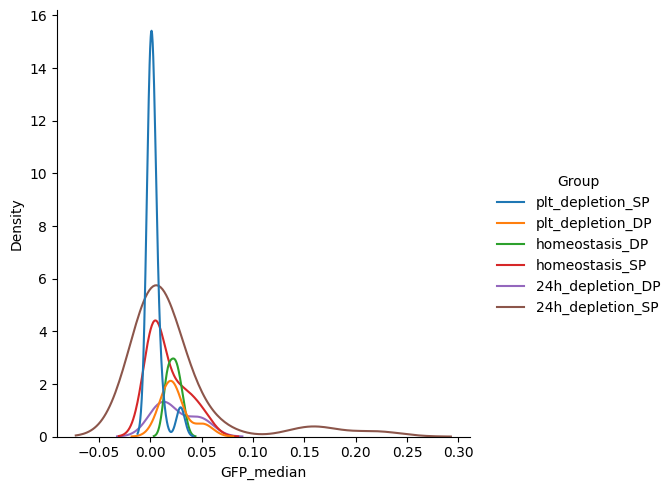

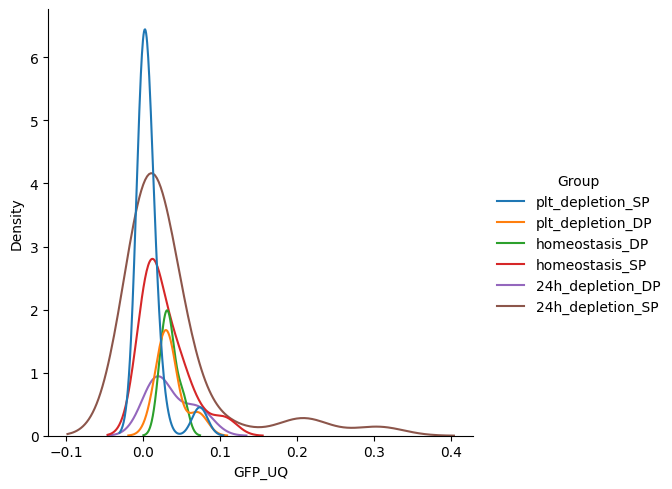

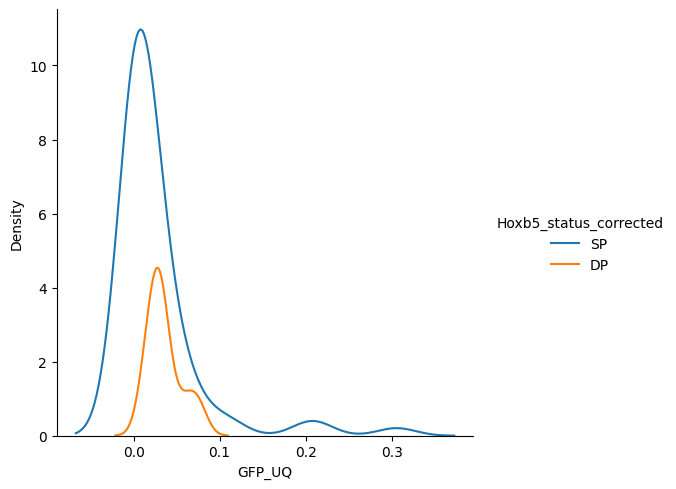

In [ ]:
#TRYING TO DEFINE BETTER CRITERIAS TO DISTINGUISH SP AND DP
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=10

datax['Group']=datax['Treatment']+'_'+datax['Hoxb5_status_corrected']
# sns.displot(datax, x="Intensity_MedianIntensity_GFP", hue="Group", kind="kde")
# sns.displot(datax, x="Intensity_StdIntensity_GFP", hue="Group", kind="kde")
# sns.displot(datax, x="Intensity_UpperQuartileIntensity_GFP", hue="Group", kind="kde")


datax['GFP_median']=None
grouped=datax.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['GFP_median']=newdf['Intensity_MedianIntensity_GFP'].median()
    dflist.append(newdf)
datab=pd.concat(dflist)

dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'GFP_median','Group']]
dx=dx.drop_duplicates()
dx=dx.dropna()

sns.displot(dx, x="GFP_median", hue="Group", kind="kde")

datax['GFP_UQ']=None
grouped=datax.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['GFP_UQ']=newdf['Intensity_UpperQuartileIntensity_GFP'].median()
    dflist.append(newdf)
datab=pd.concat(dflist)

dx=datab[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'GFP_UQ','Group']]
dx=dx.drop_duplicates()
dx=dx.dropna()

sns.displot(dx, x="GFP_UQ", hue="Group", kind="kde")
sns.displot(dx, x="GFP_UQ", hue="Hoxb5_status_corrected", kind="kde")

In [ ]:
#'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP', 
d=pd.read_csv('/Users/secchim/Downloads/manual_tracks230711.csv', header=0)
# print(d['Hoxb5_status_corrected'].unique())
dd=d[d['Hoxb5_status_corrected']=='Hoxb5_vwf']
print(dd['file'].unique())
#25 first characters of the file name

#VWF_053_MS220209_M1_movie3depletion_P16DP_1.5259021893143654e-05

d['FileID']=d['file'].str[0:19]
print(d['FileID'].unique())
print(len(d['FileID'].unique()))

['VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii2_VWF_049_MS220201_M1_Snap_movie4homeostasis_Image_3]_Statistics'
 'VWF_049_MS220201_M1_Snap_movie5depletion_[ii2_VWF_049_MS220201_M1_Snap_movie5depletion_Image_3]_Statistics'
 'VWF_053_MS220209_M1_movie3depletion_[ii2_VWF_053_MS220209_M1_movie3depletion_Image_3]_Statistics'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii2_VWF_053_MS220209_M1_movie2homeostasis_Image_3]_Statistics'
 'VWF_048_MS220119_M1_homeostasis_movie_3_[ii1_VWF_048_MS220119_M1_homeostasis_movie_3_Image_2]driftcorrected_Statistics'
 'VWF_048_MS220118_M3_movie2homeostasis_[ii2_VWF_048_MS220118_M3_movie2homeostasis_Image_3]_Statistics'
 'VWF_048_MS220118_M3_movie1plt_[ii0_VWF_048_MS220118_M3_movie1plt_Image_1]_Statistics'
 'VWF_060_MS220408_M1_MOVIE5_[ii0_VWF_060_MS220408_M1_MOVIE5_Image_1]_Statistics'
 'VWF_060_MS220408_M1_MOVIE5_[ii2_VWF_060_MS220408_M1_MOVIE5_Image_3]_Statistics'
 'VWF_062_MS220421_M2_movie_[ii1_VWF_062_MS220421_M2_movie_Image_2]_Statistics'
 'VWF_065_MS22

<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransforprog'>

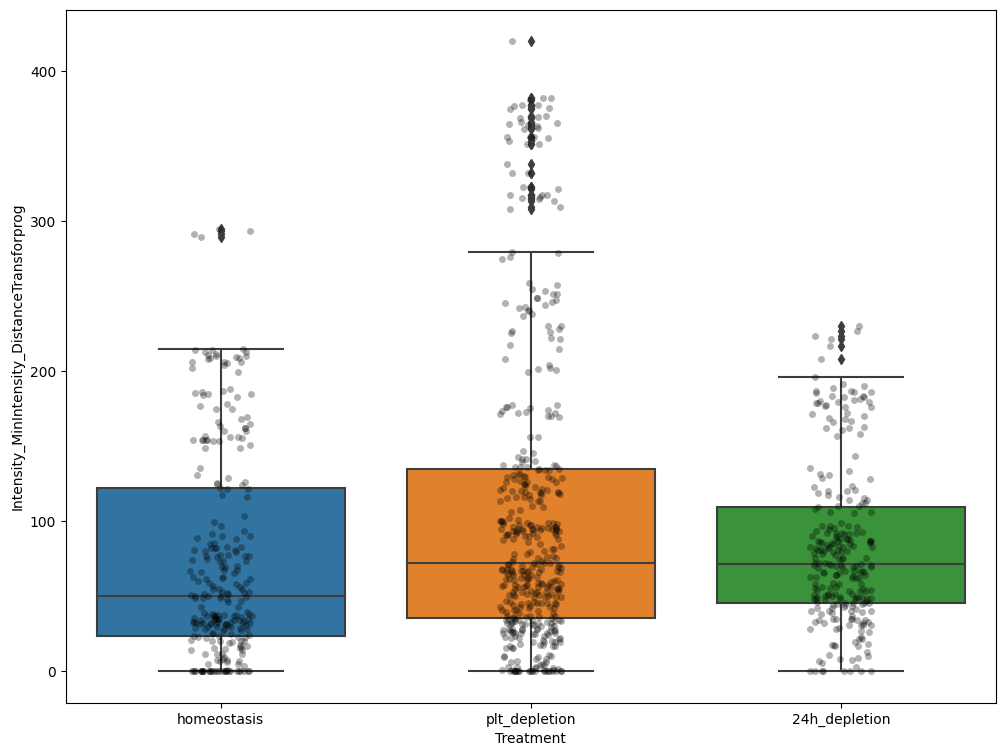

In [ ]:

# #MK
# sns.boxplot(x=("Treatment"), y="Intensity_MinIntensity_DistanceTransformMK", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"), y="Intensity_MinIntensity_DistanceTransformMK", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

##plt
# sns.boxplot(x=("Treatment"),  y="Intensity_MinIntensity_DistanceTransforplt", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"), y="Intensity_MinIntensity_DistanceTransforplt", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

#MKP
sns.boxplot(x=("Treatment"), y="Intensity_MinIntensity_DistanceTransforprog", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"), y="Intensity_MinIntensity_DistanceTransforprog", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


    ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0          1410             1                 NaN                    NaN   
1          1410             2                 NaN                    NaN   
2          1410             3                 NaN                    NaN   
3          1411             1                 NaN                    NaN   
4          1411             2                 NaN                    NaN   
5          1411             3                 NaN                    NaN   
6          1411             4                 NaN                    NaN   
7          1411             5                 NaN                    NaN   
8          1412             1                 NaN                    NaN   
9          1412             2                 NaN                    NaN   
10         1413             1                 NaN                    NaN   
11         1413             2                 NaN                    NaN   
12         1

<AxesSubplot: xlabel='Treatment', ylabel='AreaShape_Volume'>

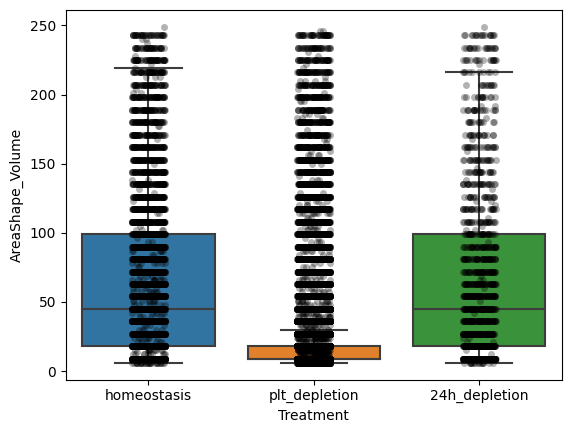

In [ ]:
#SMALL GFP OUT

#if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('out.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataout=pd.concat(file_list, axis =0, ignore_index=True)

# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')

# metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
dataout=pd.merge(dataout, metadata[:], on = 'Metadata_VWF')
# data['Final_Cell_ID']=data['Track_ID']
print(data)

data.dropna()

datab=dataout[['Metadata_VWF', 'Treatment', 'ObjectNumber','AreaShape_Volume' ]]
# print(len(datab))

dx=datab.drop_duplicates()

# #MK
sns.boxplot(x=('Treatment'),  y="AreaShape_Volume", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=('Treatment'), y="AreaShape_Volume", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7120/1883762099.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


[(0.0, 1500.0)]

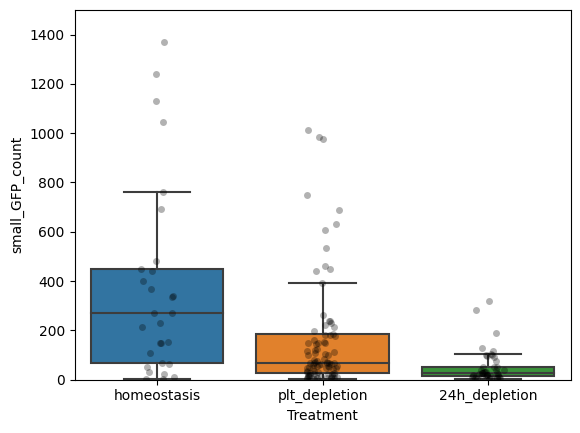

In [ ]:
df_list =[]
datab['small_GFP_count']=None
grouped=datab.groupby(['Metadata_VWF'])
for i, newdf in grouped:
    newdf['small_GFP_count']=newdf.shape[0]
    df_list.append(newdf)
datab=pd.concat(df_list)

dx=datab[['Metadata_VWF', 'small_GFP_count', 'Treatment' ]].drop_duplicates()
g=sns.boxplot(x=('Treatment'),  y='small_GFP_count', data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
g.set(ylim=(0, 1500))
gg=sns.stripplot(x=('Treatment'), y='small_GFP_count', data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])
gg.set(ylim=(0, 1500))


In [15]:
#MK protrusions

# #if movies are in lots of different folders
# file_list=[]
# # folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/'#v1 #230201
# folderpath='/Volumes/mas515/home/CP_MOVIE2/movie_output230717'#v2
# for root,dirs, files in os.walk(folderpath):
#     for file in files:
#         if file.endswith('MK.csv'):
#             # file_list.append(os.path.join(root,file))
#             data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
#             file_list.append(data)

dataout=pd.concat(file_list, axis =0, ignore_index=True)
# dataout.grouby(['Metadata_VWF'])
# for i, newdf in grouped:
#     newdf=newdf.shape[0]
#     df_list.append(newdf)
dataout=dataout[dataout['Metadata_Timepoint']==20]
# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv') #v1
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv') #v2
metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
dataout=pd.merge(dataout, metadata[:], on = 'Metadata_VWF')
# data['Final_Cell_ID']=data['Track_ID']
print(dataout)

dataout.dropna()


# print(len(datab))


# dataout.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/230201MK_check.csv')


      ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             392             1                 NaN                    NaN   
1             392             2                 NaN                    NaN   
2             392             3                 NaN                    NaN   
3             392             4                 NaN                    NaN   
4             392             5                 NaN                    NaN   
...           ...           ...                 ...                    ...   
1967          371             5                 NaN                    NaN   
1968          249             1                 NaN                    NaN   
1969          249             2                 NaN                    NaN   
1970          249             1                 NaN                    NaN   
1971          249             2                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2  Metadata_Frame  Metad

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3849/2701923190.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


Empty DataFrame
Columns: [ImageNumber, ObjectNumber, Metadata_Channelnb, Metadata_FileLocation, Metadata_Format1, Metadata_Format2, Metadata_Frame, Metadata_Series, Metadata_Timepoint, Metadata_Timepoint.1, Metadata_VWF, Metadata_VWF.1, Metadata_VWF.2, FileName_AF647, FileName_Autofluo, FileName_GFP, FileName_Ilastik_GFP, FileName_KUO, FileName_track, PathName_AF647, PathName_Autofluo, PathName_GFP, PathName_Ilastik_GFP, PathName_KUO, PathName_track, AreaShape_BoundingBoxMaximum_X, AreaShape_BoundingBoxMaximum_Y, AreaShape_BoundingBoxMaximum_Z, AreaShape_BoundingBoxMinimum_X, AreaShape_BoundingBoxMinimum_Y, AreaShape_BoundingBoxMinimum_Z, AreaShape_BoundingBoxVolume, AreaShape_Center_X, AreaShape_Center_Y, AreaShape_Center_Z, AreaShape_EquivalentDiameter, AreaShape_EulerNumber, AreaShape_Extent, AreaShape_MajorAxisLength, AreaShape_MinorAxisLength, AreaShape_SurfaceArea, AreaShape_Volume, Children_DilateObjectsMK_Count, Location_Center_X, Location_Center_Y, Location_Center_Z, Number_Object_Number, Parent_Mk_segmentation, Experiment mouse number, Mouse ID, Genotype, D.O.B., Age, Sex, Treatment, Time of treatment, timepoint_movies, Experiment, Surgery, Imaging_Date, Strain, Comments, Platelet_count_sysmex x10^3, dilution 1 in, platelet_count, Time of bleeding, Number of DP, relative_time_of_bleeding, FileID, Position_Name, Cell_name, Position_X, Position_Y, AcquisitionDate, AcquisitionTime, NChannel, Nframes, NZslices, Tilerow, Tilecolumn, N_X, N_Y, Original_Filename, Scale_X, Scale_Y, Scale_Z, Datatype, Treatment.1, BatchID, Position]
Index: []

[0 rows x 90 columns]

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3849/2524118656.py:46: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1968     2
1969     2
1944     7
1945     7
1946     7
        ..
1102    15
1103    15
1104    15
1105    15
1106    15
Name: mean_MK_count, Length: 921, dtype: int64


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


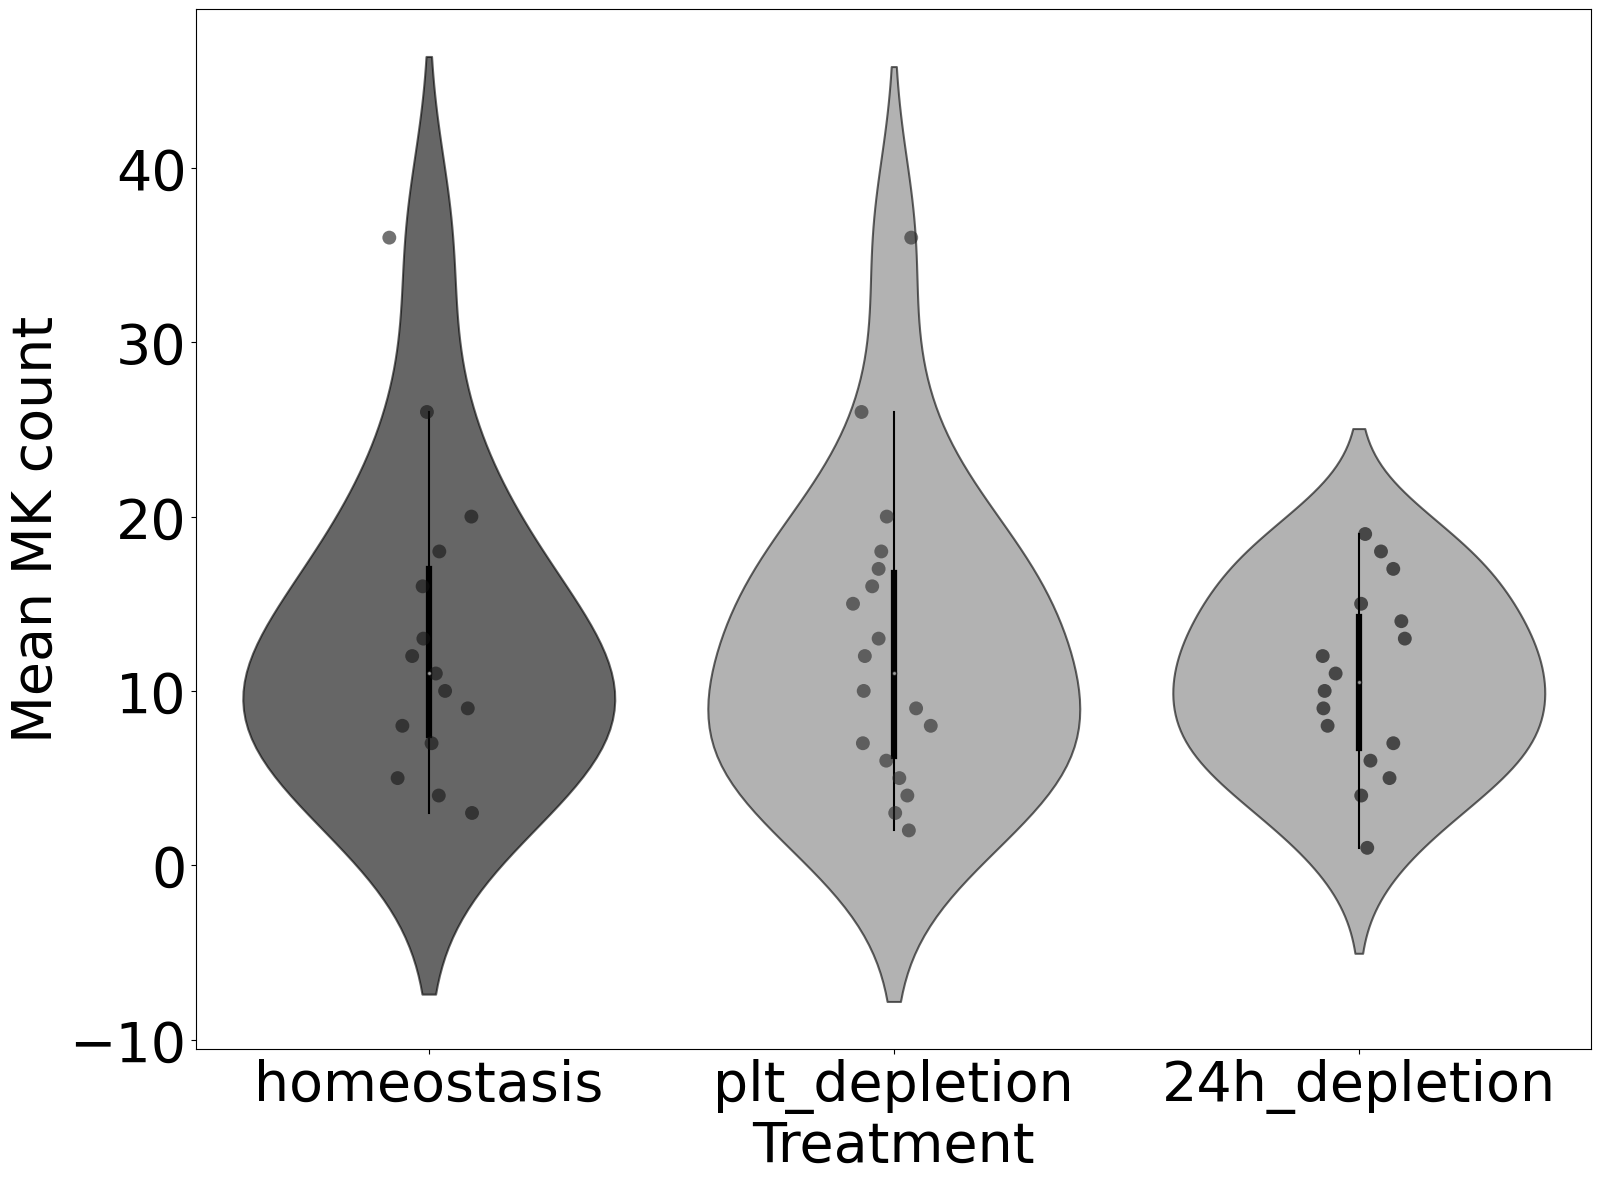

In [37]:
### normalize MK volume by scale in um
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=40
for i,b in dataout.iterrows():
    dataout.loc[i, 'MK_volume_um']=dataout.loc[i, 'AreaShape_Volume']/((dataout.loc[i, 'Scale_X']*1000000)*(dataout.loc[i, 'Scale_Y']*1000000)*(dataout.loc[i, 'Scale_Z']*1000000))

dx=dataout[dataout['MK_volume_um']<150000]
dx=dx[dx['MK_volume_um']>4188]

# g=(sns.stripplot(x='Treatment', y="MK_volume_um", data=dx,dodge=True, hue='Treatment', color='black', alpha=0.9, s=8), sns.violinplot(x="Treatment", hue='Treatment', y="MK_volume_um", data=dx, palette=('black','grey','grey'), alpha=0.3))
# # sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion'])
# # g=sns.violinplot(data=dx, x="Treatment", y="mean_MK_count",hue='Treatment',  fill=False )
# plt.setp(g[1].collections, alpha=.6)
# #pip install seaborn --upgrade
# g[1].set(ylabel='MK volume (um3)')
# plt.legend([], [], frameon=False)

# grouped=dx.groupby(['Metadata_VWF'])
# dflist=[]

# for i, newdf in grouped:
#     for b, r in newdf.iterrows():
#         newdf.loc[b,'mean_vol']=(newdf['MK_volume_um'].mean())
#     dflist.append(newdf)
# dx=pd.concat(dflist)
# dx=dx[['Treatment', 'mean_vol']].drop_duplicates()


# g=(sns.stripplot(x='Treatment', y="mean_vol", data=dx, hue='Treatment',dodge=False, color='black', alpha=0.9, s=10, order=('homeostasis','plt_depletion','24h_depletion')), sns.violinplot(x="Treatment", hue='Treatment', y="mean_vol", data=dx, dodge=False, palette=('black','grey','grey'), alpha=0.3,order=('homeostasis','plt_depletion','24h_depletion'), hue_order=('homeostasis','plt_depletion','24h_depletion')))
# # sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion'])
# # g=sns.violinplot(data=dx, x="Treatment", y="mean_MK_count",hue='Treatment',  fill=False )
# plt.setp(g[1].collections, alpha=.6)
# #pip install seaborn --upgrade
# g[1].set(ylabel='(μm3)')
# plt.legend([], [], frameon=False)
# # dx.to_csv('/Users/secchim/Downloads/231103MK_check.csv')

dx['mean_MK_count']=10
grouped=dx.groupby(['Metadata_VWF'])
dflist=[]

for i, newdf in grouped:
    for b, r in newdf.iterrows():
        newdf['MK_count']=newdf.shape[0]
        newdf.loc[b,'mean_MK_count']=(newdf['MK_count'].mean())
    dflist.append(newdf)
dx=pd.concat(dflist)
print(dx['mean_MK_count'])
dx=dx[['Treatment', 'mean_MK_count']].drop_duplicates()
g=(sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=False, hue='Treatment', color='black', alpha=0.9, s=10, order =['homeostasis','plt_depletion','24h_depletion']), sns.violinplot(x=("Treatment"), hue='Treatment', dodge=False, y="mean_MK_count", data=dx, order =['homeostasis','plt_depletion','24h_depletion'], hue_order =['homeostasis','plt_depletion','24h_depletion'], palette=('black','grey','grey'), alpha=0.3, fill=False))
# g=(sns.stripplot(x='Treatment', y="mean_MK_count", data=dx,dodge=True, hue='Treatment', color='black', alpha=0.9, s=8), sns.violinplot(x="Treatment", hue='Treatment', y="mean_MK_count", data=dx, palette=('black','grey','grey'), alpha=0.3))
# sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion'])
# g=sns.violinplot(data=dx, x="Treatment", y="mean_MK_count",hue='Treatment',  fill=False )
plt.setp(g[1].collections, alpha=.6)
#pip install seaborn --upgrade
g[1].set(ylabel='Mean MK count')
plt.legend([], [], frameon=False)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/2255026641.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


63582    2.020071
63583    2.020071
63584    2.020071
63585    2.020071
63586    2.020071
           ...   
35183    1.681638
35184    1.681638
35185    1.681638
35186    1.681638
35187    1.681638
Name: mean_protrusion, Length: 64026, dtype: float64


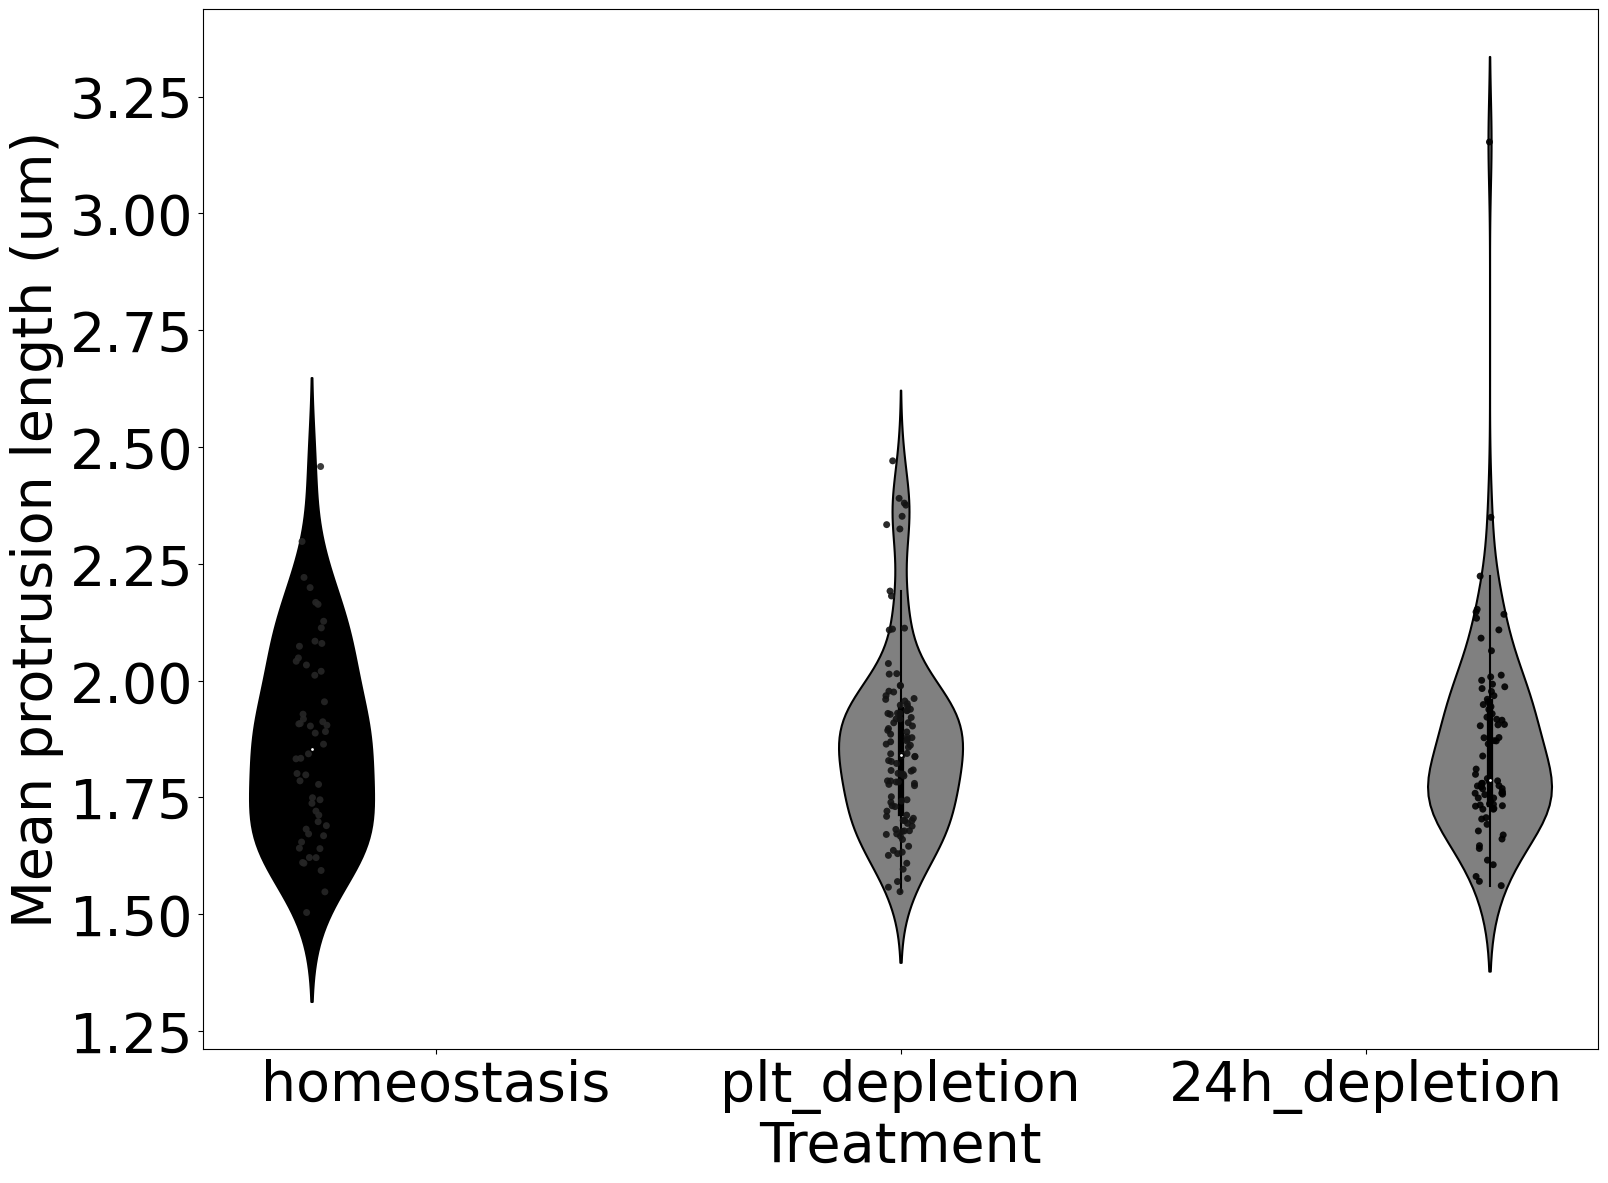

In [139]:
# #MK
datab=dataout[['Metadata_VWF', 'Treatment', 'ObjectNumber','AreaShape_MajorAxisLength', 'AreaShape_MinorAxisLength', 'AreaShape_Volume' ]]
datab['MK_protrusion']=None
for i in datab.index:
    datab.loc[i,'MK_protrusion']=datab.loc[i,'AreaShape_MajorAxisLength']/datab.loc[i,'AreaShape_MinorAxisLength']

#MK mean protrusion
# dx['mean_protrusion']=None
grouped=datab.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['mean_protrusion']=newdf['MK_protrusion'].mean()
    dflist.append(newdf)
dx=pd.concat(dflist)
print(dx['mean_protrusion'])

dx=dx[['Metadata_VWF', 'Treatment', 'mean_protrusion' ]]
dx=dx.drop_duplicates()
# dx=dx[dx['Metadata_Timepoint'==1]] #error 
# sns.boxplot(x=('Treatment'),  y="mean_protrusion", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
g=(sns.stripplot(x=('Treatment'), y="mean_protrusion", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion']), sns.violinplot(x=("Treatment"), hue='Treatment', y="mean_protrusion",dodge=True, data=dx, hue_order =['homeostasis','plt_depletion','24h_depletion'], palette=('black','grey','grey'), fill=False))
g[1].set(ylabel='Mean protrusion length (um)')
plt.legend([], [], frameon=False)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_94715/3372955991.py:84: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


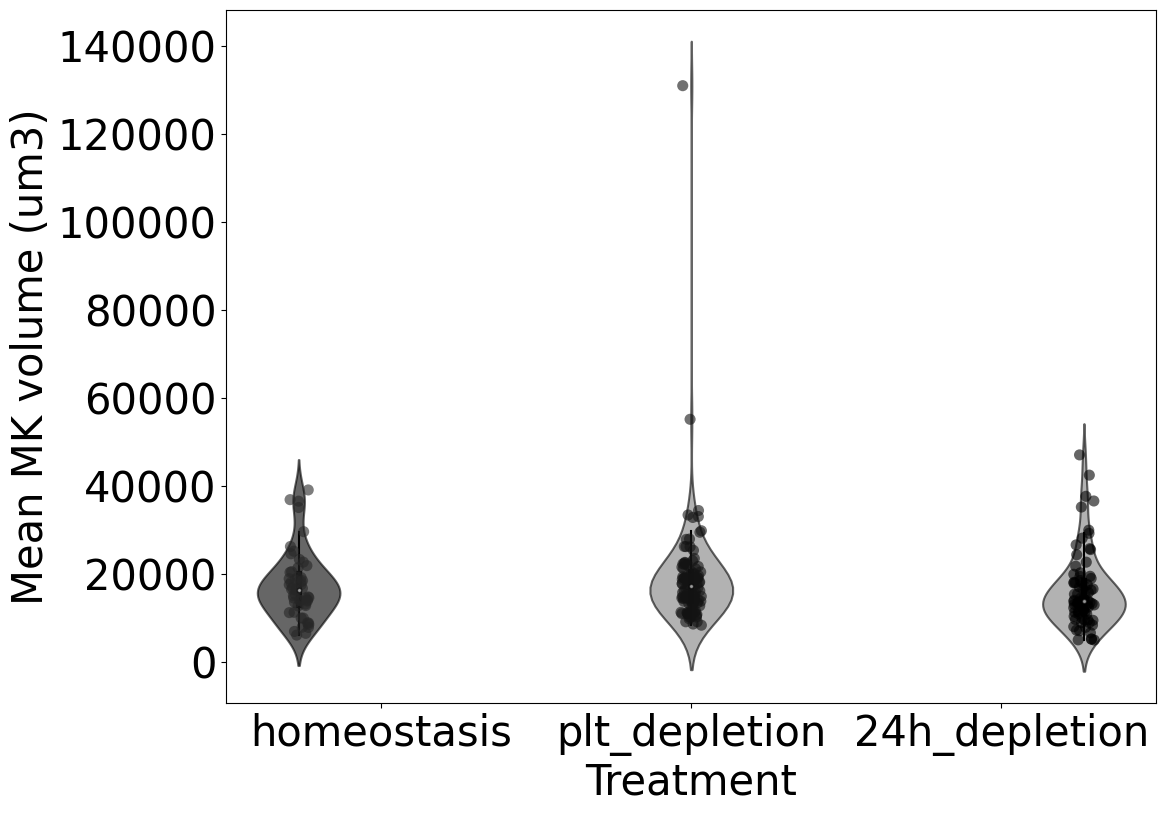

In [6]:
# # #MK minimum numbers per movie

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=30
# print ("New size:", fig_size)

# dx=dataout[['Metadata_VWF', 'Treatment', 'FileName_GFP']]

# dx['MK_count']=10
# # grouped=dx.groupby('AcquisitionTime')['Metadata_VWF']
# grouped=dx.groupby(['FileName_GFP'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows():
#         newdf.loc[b,'MK_count']=newdf.shape[0]
#     dflist.append(newdf)
# dx=pd.concat(dflist)
# print(dx['MK_count'])

# # dx['min_MK_count']=10
# # grouped=dx.groupby(['Metadata_VWF'])
# # dflist=[]

# # for i, newdf in grouped:
# #     for b, r in newdf.iterrows():
# #         newdf.loc[b,'min_MK_count']=(newdf['MK_count'].min())
# #     dflist.append(newdf)
# # dx=pd.concat(dflist)
# # print(dx['min_MK_count'])

# # dxx=dx[['Metadata_VWF', 'Treatment', 'min_MK_count']]
# # dxx=dxx.drop_duplicates()
# # # dx=dx[dx['Metadata_Timepoint'==1]] #error 
# # # sns.boxplot(x=('Treatment'),  y="min_MK_count", data=dxx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# # sns.stripplot(x=('Treatment'), y="min_MK_count", data=dxx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])
# # sns.violinplot(x=("Treatment"), y="min_MK_count", data=dxx, order =['homeostasis','plt_depletion','24h_depletion'])#error maybe because everytimepoint 

# # dx['max_MK_count']=10
# # grouped=dx.groupby(['Metadata_VWF'])
# # dflist=[]

# # for i, newdf in grouped:
# #     for b, r in newdf.iterrows():
# #         newdf.loc[b,'max_MK_count']=(newdf['MK_count'].max())
# #     dflist.append(newdf)
# # dx=pd.concat(dflist)
# # print(dx['max_MK_count'])

# # dxx=dx[['Metadata_VWF', 'Treatment', 'max_MK_count']]
# # dxx=dxx.drop_duplicates()
# # # dx=dx[dx['Metadata_Timepoint'==1]] #error 
# # # sns.boxplot(x=('Treatment'),  y="max_MK_count", data=dxx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# # sns.stripplot(x=('Treatment'), y="max_MK_count", data=dxx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])
# # sns.violinplot(x=("Treatment"), y="max_MK_count", data=dxx, order =['homeostasis','plt_depletion','24h_depletion'])#error maybe because everytimepoint 

# dx['mean_MK_count']=10
# grouped=dx.groupby(['Metadata_VWF'])
# dflist=[]

# for i, newdf in grouped:
#     for b, r in newdf.iterrows():
#         newdf.loc[b,'mean_MK_count']=(newdf['MK_count'].mean())
#     dflist.append(newdf)
# dx=pd.concat(dflist)
# print(dx['mean_MK_count'])
# dx=dx[['Treatment', 'mean_MK_count']].drop_duplicates()
# g=(sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion']), sns.violinplot(x=("Treatment"), hue='Treatment', y="mean_MK_count",dodge=True, data=dx, hue_order =['homeostasis','plt_depletion','24h_depletion'], palette=('black','grey','grey'), alpha=0.3, fill=False))
# g=(sns.stripplot(x='Treatment', y="mean_MK_count", data=dx,dodge=True, hue='Treatment', color='black', alpha=0.9, s=8), sns.violinplot(x="Treatment", hue='Treatment', y="mean_MK_count", data=dx, palette=('black','grey','grey'), alpha=0.3))
# # sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion'])
# # g=sns.violinplot(data=dx, x="Treatment", y="mean_MK_count",hue='Treatment',  fill=False )
# plt.setp(g[1].collections, alpha=.6)
# #pip install seaborn --upgrade
# g[1].set(ylabel='Mean MK count')
# plt.legend([], [], frameon=False)


grouped=datab.groupby(['Metadata_VWF'])
dflist=[]

for i, newdf in grouped:
    for b, r in newdf.iterrows():
        newdf.loc[b,'mean_vol']=(newdf['AreaShape_Volume'].mean())
    dflist.append(newdf)
dx=pd.concat(dflist)
dx=dx[['Treatment', 'mean_vol']].drop_duplicates()


g=(sns.stripplot(x='Treatment', y="mean_vol", data=dx,dodge=True, hue='Treatment', color='black', alpha=0.9, s=8), sns.violinplot(x="Treatment", hue='Treatment', y="mean_vol", data=dx, palette=('black','grey','grey'), alpha=0.3))
# sns.stripplot(x=('Treatment'), y="mean_MK_count", data=dx, dodge=True, hue='Treatment', color='black', alpha=0.9,  hue_order =['homeostasis','plt_depletion','24h_depletion'])
# g=sns.violinplot(data=dx, x="Treatment", y="mean_MK_count",hue='Treatment',  fill=False )
plt.setp(g[1].collections, alpha=.6)
#pip install seaborn --upgrade
g[1].set(ylabel='Mean MK volume (um3)')
plt.legend([], [], frameon=False)



/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/1114267924.py:9: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/1114267924.py:24: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/1114267924.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1.5259021893143654e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_3.051804378628731e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_6.103608757257462e-05'
 'VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_6.103608757257462e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_7.629510946571827e-05'
 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie5depletion_P12DP_1.5259021893143654e-05'
 'VWF_053_MS220209_M1_movie2homeostasis_P16DP_1.5259021893143654e-05'
 'VWF_053_MS220209_M1_movie3depletion_P16DP_1.5259021893143654e-05'
 'VWF_053_MS220209_M1_movie4depletion_P16DP_1.5259021893143654e-05'
 'VWF_053_MS220209_M1_movie5depletion_P16DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/1114267924.py:55: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


<AxesSubplot: xlabel='Final_Cell_ID', ylabel='Intensity_UpperQuartileIntensity_GFP'>

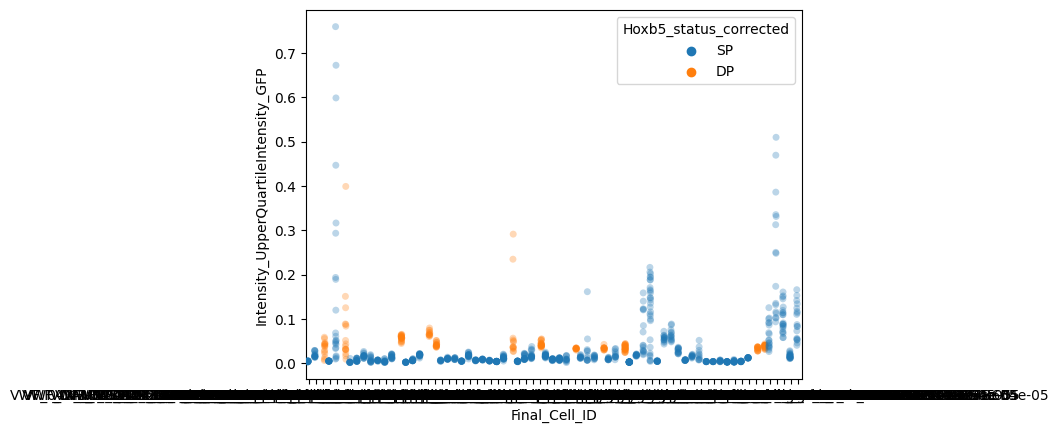

In [ ]:
#FINDING THE RIGHT MEANINTENSITYGFP FOR DP
# 
#Either:
# datax=data
#Or
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]



# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])

for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    newdf=newdf[newdf['Intensity_MinIntensity_DistanceTransformMK']>1] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 2:#was 3
        Hoxb5Vwf_cells.append(i) #137


for i, newdf in grouped:
    newdf=newdf[newdf['Intensity_MinIntensity_DistanceTransformMK']>1] #ADD THIS NEW LINE!!!!!!
    newdf=newdf[newdf['Intensity_UpperQuartileIntensity_GFP']>0.03] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:#was 3
        Hoxb5Vwf_cells.append(i) #137

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'

df_list =[]
grouped=datax.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))

sns.stripplot(x=("Final_Cell_ID"),hue='Hoxb5_status_corrected', y="Intensity_UpperQuartileIntensity_GFP", data=datab, dodge=True, alpha=0.3)


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'axis_fontsize'

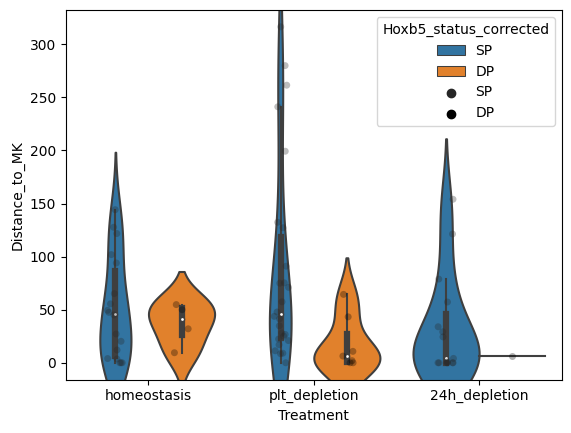

In [ ]:
#NEIGHBOURHOOD ANALYSIS - MK with changed DP


# datab=datab[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransformMK','Intensity_MinIntensity_DistanceTransforprog', 'Intensity_MinIntensity_DistanceTransformAF647','Intensity_MinIntensity_DistanceTransforplt','Last_timepoint' ]]

# datab['MK_median']=0
# grouped=datab.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows():
#         if newdf.loc[b,'Treatment']=='homeostasis':
#             newdf.loc[b,'Distance_to_MK']=newdf['Intensity_MinIntensity_DistanceTransformMK'].median()
#         elif newdf.loc[b,'Treatment']=='plt_depletion':
#             x=newdf[newdf['Last_timepoint']==True]
#             newdf.loc[b,'Distance_to_MK']=x['Intensity_MinIntensity_DistanceTransformMK'].max()
#             print(newdf.loc[b,'Distance_to_MK'])
#         elif newdf.loc[b,'Treatment']=='24h_depletion':
#             newdf.loc[b,'Distance_to_MK']=newdf['Intensity_MinIntensity_DistanceTransformMK'].median()
#     dflist.append(newdf)
# data=pd.concat(dflist)


# datab=data[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'Distance_to_MK']]

# dx=datab.drop_duplicates()

###INCREASING FONT SIZE
## ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)
## plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
## plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
## plt.show()

# #MK
sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Distance_to_MK", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Distance_to_MK", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])
plt.legend(fontsize='x-large', title_fontsize='40')
model = ols('Distance_to_MK ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

sm.stats.multicomp.pairwise_tukeyhsd(dx['Distance_to_MK'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['Distance_to_MK'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()

##plt
# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforplt", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforplt", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

##MKP
# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.table.SimpleTable'>

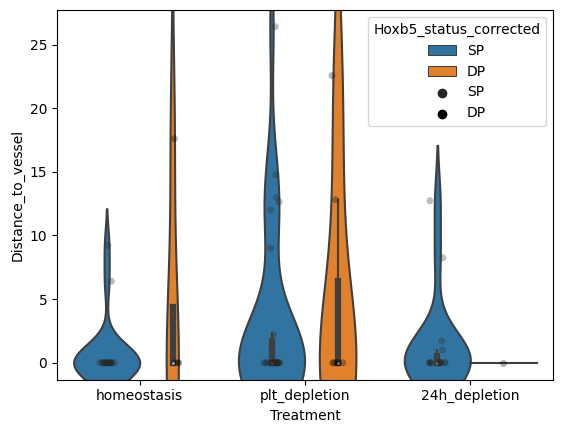

In [ ]:
# datab=datab[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransformMK','Intensity_MinIntensity_DistanceTransforprog', 'Intensity_MinIntensity_DistanceTransformAF647','Intensity_MinIntensity_DistanceTransforplt','Last_timepoint' ]]

# datab['MK_median']=0
# grouped=datab.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows():
#         if newdf.loc[b,'Treatment']=='homeostasis':
#             newdf.loc[b,'Distance_to_vessel']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()
#         elif newdf.loc[b,'Treatment']=='plt_depletion':
#             x=newdf[newdf['Last_timepoint']==True]
#             newdf.loc[b,'Distance_to_vessel']=x['Intensity_MinIntensity_DistanceTransformAF647'].max()
#             print(newdf.loc[b,'MK_median'])
#         elif newdf.loc[b,'Treatment']=='24h_depletion':
#             newdf.loc[b,'Distance_to_vessel']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()
#     dflist.append(newdf)
# data=pd.concat(dflist)


# datab=data[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'Distance_to_vessel']]

# dx=datab.drop_duplicates()


##vessel
sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Distance_to_vessel", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Distance_to_vessel", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

model = ols('Distance_to_vessel ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

# sm.stats.multicomp.pairwise_tukeyhsd(dx['Distance_to_vessel'], dx['Treatment'], alpha=0.05).summary()
sm.stats.multicomp.pairwise_tukeyhsd(dx['Distance_to_vessel'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()



/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/316273021.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
26.39678955078125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


sum_sq      df          F        PR(>F)
C(Hoxb5_status_corrected)    542.088131     1.0  18.501298  1.840189e-05
C(Treatment)                1338.255191     2.0  22.837115  1.868999e-10
Residual                   34105.206781  1164.0        NaN           NaN

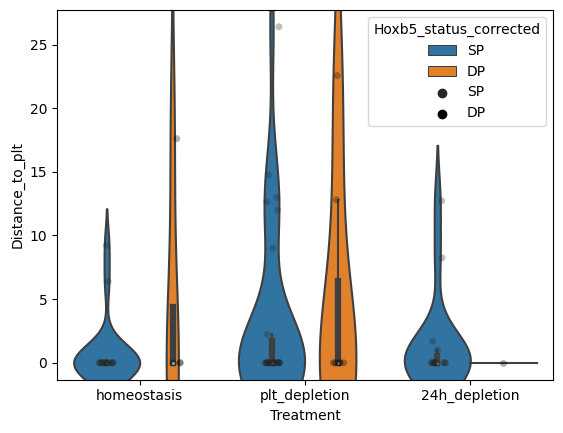

In [ ]:
datab=datab[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransformMK','Intensity_MinIntensity_DistanceTransforprog', 'Intensity_MinIntensity_DistanceTransformAF647','Intensity_MinIntensity_DistanceTransforplt','Last_timepoint' ]]

datab['MK_median']=0
grouped=datab.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        if newdf.loc[b,'Treatment']=='homeostasis':
            newdf.loc[b,'Distance_to_plt']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()
        elif newdf.loc[b,'Treatment']=='plt_depletion':
            x=newdf[newdf['Last_timepoint']==True]
            newdf.loc[b,'Distance_to_plt']=x['Intensity_MinIntensity_DistanceTransformAF647'].max()
            print(newdf.loc[b,'Distance_to_plt'])
        elif newdf.loc[b,'Treatment']=='24h_depletion':
            newdf.loc[b,'Distance_to_plt']=newdf['Intensity_MinIntensity_DistanceTransformAF647'].median()
    dflist.append(newdf)
data=pd.concat(dflist)


datab=data[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'Distance_to_plt']]

dx=datab.drop_duplicates()


##plt
sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Distance_to_plt", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Distance_to_plt", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])

model = ols('Distance_to_plt ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

# sm.stats.multicomp.pairwise_tukeyhsd(dx['Distance_to_plt'], dx['Treatment'], alpha=0.05).summary()


##MKP
# sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Intensity_MinIntensity_DistanceTransforprog", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


In [ ]:


# perform one-way ANOVA for MK count #could add time
# model = ols('MK_count ~  C(Treatment)', data=dx).fit()
model = ols('max_MK_count ~  C(Treatment)', data=dxx).fit()
sm.stats.anova_lm(model, typ=2)

NameError: name 'dxx' is not defined

In [ ]:


#perform two-way ANOVA for MK distance
# model = ols('Intensity_MinIntensity_DistanceTransformMK ~ C(Hoxb5_status_corrected) + C(Treatment) + C(Hoxb5_status_corrected):C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)

# model = ols('Intensity_MinIntensity_DistanceTransformAF647 ~ C(Hoxb5_status_corrected) + C(Treatment) + C(Hoxb5_status_corrected):C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)

# model = ols('Intensity_MinIntensity_DistanceTransforprog ~ C(Hoxb5_status_corrected) + C(Treatment) + C(Hoxb5_status_corrected):C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)

model = ols('Intensity_MinIntensity_DistanceTransforplt ~ C(Hoxb5_status_corrected) + C(Treatment) + C(Hoxb5_status_corrected):C(Treatment)', data=dx).fit()
sm.stats.anova_lm(model, typ=2)

#not tested yet
tukey = pairwise_tukeyhsd(endog=df['Intensity_MinIntensity_DistanceTransforplt'],
                          groups=df['Hoxb5_status_corrected'],
                          alpha=0.05)

sum_sq      df           F  \
C(Hoxb5_status_corrected)               3.910593e+03     1.0    0.883111   
C(Treatment)                            3.378793e+06     2.0  381.508406   
C(Hoxb5_status_corrected):C(Treatment)  2.407698e+04     2.0    2.718595   
Residual                                1.041070e+07  2351.0         NaN   

                                               PR(>F)  
C(Hoxb5_status_corrected)                3.474476e-01  
C(Treatment)                            3.226156e-144  
C(Hoxb5_status_corrected):C(Treatment)   6.617475e-02  
Residual                                          NaN

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


sum_sq      df         F  \
C(Hoxb5_status_corrected)                 10.058838     1.0  1.973667   
C(Treatment)                              30.497225     2.0  2.991964   
C(Hoxb5_status_corrected):C(Treatment)     3.062193     2.0  0.300420   
Residual                                8939.300060  1754.0       NaN   

                                          PR(>F)  
C(Hoxb5_status_corrected)               0.160236  
C(Treatment)                            0.050445  
C(Hoxb5_status_corrected):C(Treatment)  0.740545  
Residual                                     NaN

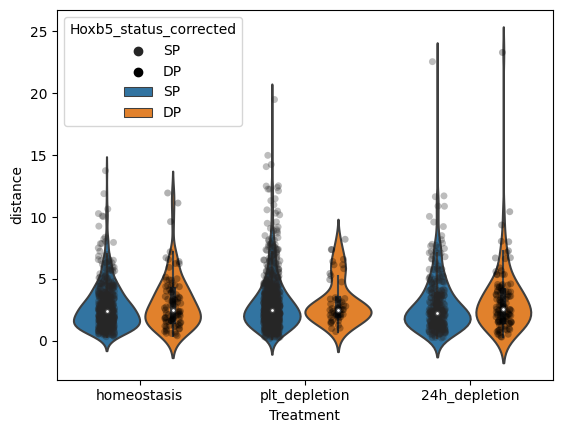

In [ ]:
#QC plot
# 
dx=datax[datax['max_displacement']!=0]
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, order =['homeostasis','plt_depletion','24h_depletion'])
# dx.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/qc.csv')
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="frame_speed", data=dx, dodge=True, order =['homeostasis','plt_depletion','24h_depletion'])

dx.dropna()

##DISTANCE VIOLIN PLOT
sns.stripplot( x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, color='black', alpha=0.3, order =['homeostasis','plt_depletion','24h_depletion'])
sns.violinplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, order =['homeostasis','plt_depletion','24h_depletion'])

model = ols('distance ~ C(Hoxb5_status_corrected) + C(Treatment) + C(Hoxb5_status_corrected):C(Treatment)', data=dx).fit()
sm.stats.anova_lm(model, typ=2)

VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_045_MS211208_M2_movie3_P21_1.5259021893143654e-05
VWF_045_MS211208_M2_movie6_P24_1.5259021893143654e-05
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7120/1265687739.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


[(0.0, 0.15)]

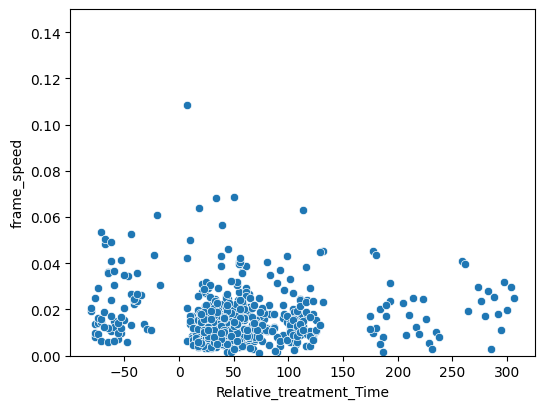

In [ ]:
import statistics
import seaborn as sns
# sns.reset_defaults()

df_list =[]
grouped=datax.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)


# # datab=datab.dropna(axis=0, subset=['Relative_treatment_Time'])
# datax['Relative_treatment_Time'] = datax['Relative_treatment_Time'].astype(float)
# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='Hoxb5_status_corrected', data=datab)


#stripplot not suitable, x axis looks terrible
#sns.stripplot(x=("Relative_treatment_Time"),hue='Hoxb5_status_corrected', y="frame_speed", data=datax, dodge=True, legend='brief')
#scatter plot doesn't allow dodge
# plt.scatter(x=("Relative_treatment_Time"), y="frame_speed", data=datax[datax['Hoxb5_status_corrected']=='SP'], color='orange', alpha=0.3)
# plt.scatter(x=("Relative_treatment_Time"), y="frame_speed", data=datax[datax['Hoxb5_status_corrected']=='DP'], color='green', alpha=0.3)

# sns.scatterplot(x="Relative_treatment_Time", y="distance", hue='Hoxb5_status_corrected', palette='pastel', data=datax)

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/wrong.csv')

##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
dx=datab[datab['Hoxb5_status_corrected']=='SP']#DP
dx=dx[dx['Treatment']=='plt_depletion']

##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
g.set(ylim=(0, 0.15))



[(0.0, 0.15)]

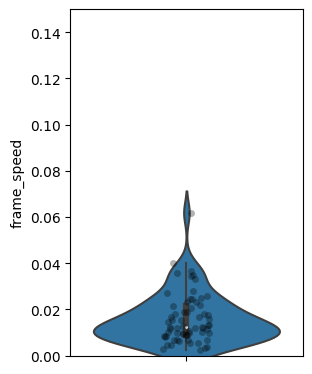

In [ ]:
##PLOTTING HOMEOSTASIS OF TREATED MICE
# dx=dx[dx['Relative_treatment_Time']<0]
# g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
# g.set(ylim=(0, 0.21))

dx=datab[datab['Hoxb5_status_corrected']=='DP']
dx=dx[dx['Treatment']=='homeostasis']

# #PLOTTING HOMEOSTASIS OF UNTREATED MICE
fig, ax = plt.subplots(figsize=(3,4.5))
dx=dx[dx['Relative_treatment_Time']==0]
g=sns.violinplot(y="frame_speed", data=dx)
gg=sns.stripplot( y="frame_speed", data=dx, dodge=True, color='black', alpha=0.3)
# g.set(xlim=(-1, 1))
g.set(ylim=(0, 0.15))
# gg.set(xlim=(-1, 1))
gg.set(ylim=(0, 0.15))

##PLOTING DEPLETION ONLY
# dx=dx[dx['Treatment_corrected']=='Depletion']
# g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
# g.set(ylim=(0, 0.21))


# sns.scatterplot(x="Track_ID", y="frame_speed",hue='track_length', data=dx)
# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=dx)


# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=datab[datab['Hoxb5_status_corrected']=='DP'])

[(0.0, 0.21)]

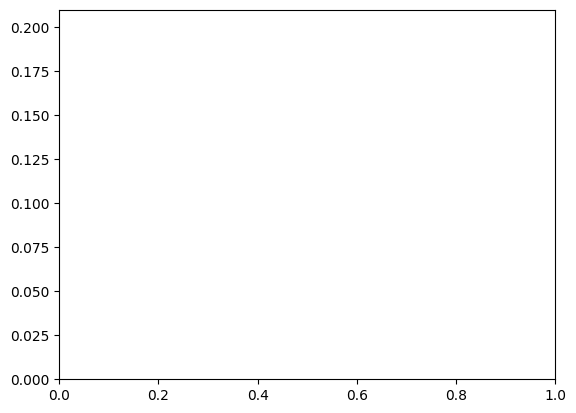

In [ ]:
#PLOTING DEPLETION ONLY
dx=dx[dx['Treatment']!='homeostasis']
# dx=dx[dx['Treatment_corrected']=='Depletion']
g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
g.set(ylim=(0, 0.21))


# sns.scatterplot(x="Track_ID", y="frame_speed",hue='track_length', data=dx)
# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=dx)


# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=datab[datab['Hoxb5_status_corrected']=='DP'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/3290296941.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_045_MS211208_M2_movie3_P21_1.5259021893143654e-05
VWF_045_MS211208_M2_movie6_P24_1.5259021893143654e-05
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05
VWF_048_MS22

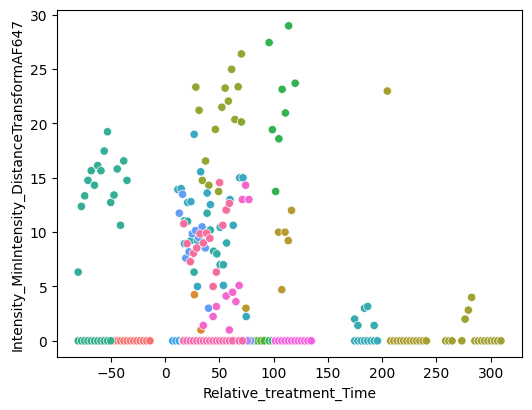

In [ ]:
#PLOTTING DISTANCE TO CELL TYPE IN RELATION TO TIME

import statistics
import seaborn as sns
# sns.reset_defaults()

df_list =[]
grouped=datax.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)


##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
dx=datab[datab['Hoxb5_status_corrected']=='SP']#DP
dx=dx[dx['Treatment']=='plt_depletion']

# ##PLOTTING TREATED MICE to MK
# # figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
# fig, ax = plt.subplots(figsize=(6,4.5))
# dx=dx[dx['Relative_treatment_Time']!=0]
# g=sns.scatterplot(x="Relative_treatment_Time", y="Intensity_MinIntensity_DistanceTransformMK", data=dx, hue="Final_Cell_ID", legend=False)
# # g.set(ylim=(0, 0.000002))

# ##PLOTTING TREATED MICE to vessel
fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="Intensity_MinIntensity_DistanceTransformAF647", data=dx, hue="Final_Cell_ID", legend=False)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/338598043.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


12      0.000000
13      0.485550
14     -2.859779
15     -0.404053
16      0.316940
          ...   
2345    0.000000
2346    0.000000
2347    0.000000
2348    0.000000
2349    0.000000
Name: norm_dist_MK, Length: 1168, dtype: float64


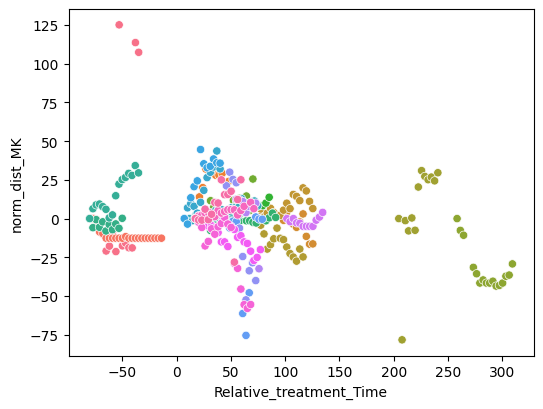

In [ ]:
#NORMALIZING distances TO the distance in the first timepoint
#do on the unique Cell_ID rather than Track_ID

datab['norm_dist_MK']=datab['Intensity_MinIntensity_DistanceTransformMK']
datab['norm_dist_MK_origin']=0
grouped=datab.groupby(['Final_Cell_ID'])

dflist=[]
# print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_0=newdf2['Intensity_MinIntensity_DistanceTransformMK'].values
    newdf['norm_dist_MK_origin']=[norm_0[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['norm_dist_MK']=((newdf['Intensity_MinIntensity_DistanceTransformMK']-newdf['norm_dist_MK_origin']))
    # print(newdf['corrected_x_2'])
    
    dflist.append(newdf)
datac=pd.concat(dflist)
print(datac['norm_dist_MK'])

#NPLOTTING THE ORMALIZED distances TO the distance in the first timepoint (BLOOD VESSEL)
##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
dx=datac[datac['Hoxb5_status_corrected']=='SP']#DP
dx=dx[dx['Treatment']=='plt_depletion']


fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="norm_dist_MK", data=dx, hue="Final_Cell_ID", legend=False)


In [ ]:
#NORMALIZING distances TO the distance in the first timepoint
#do on the unique Cell_ID rather than Track_ID

datab['norm_dist_AF647']=datab['Intensity_MinIntensity_DistanceTransformAF647']
datab['norm_dist_AF647_origin']=0
grouped=datab.groupby(['Final_Cell_ID'])

dflist=[]
# print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_0=newdf2['Intensity_MinIntensity_DistanceTransformAF647'].values
    newdf['norm_dist_AF647_origin']=[norm_0[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['norm_dist_AF647']=((newdf['Intensity_MinIntensity_DistanceTransformAF647']-newdf['norm_dist_AF647_origin']))
    # print(newdf['corrected_x_2'])
    
    dflist.append(newdf)
datac=pd.concat(dflist)
print(datac['norm_dist_AF647'])

12       0.000000
13       1.414214
14       1.000000
15       0.000000
16       0.000000
          ...    
2345     2.000000
2346    12.041595
2347    13.453624
2348    10.816654
2349    11.997817
Name: norm_dist_AF647, Length: 1168, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_11485/1050830332.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


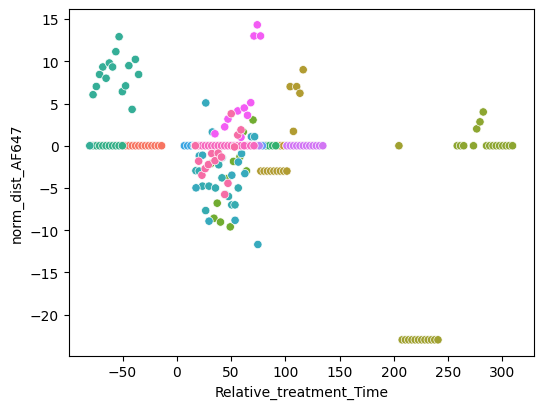

In [ ]:
#NPLOTTING THE ORMALIZED distances TO the distance in the first timepoint (BLOOD VESSEL)
##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
dx=datac[datac['Hoxb5_status_corrected']=='SP']#DP
dx=dx[dx['Treatment']=='plt_depletion']


fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="norm_dist_AF647", data=dx, hue="Final_Cell_ID", legend=False)


In [ ]:
# pip install git+git://github.com/cytomining/pycytominer@2aa8638d7e505ab510f1d5282098dd59bb2cb470

# import scipy
# from scipy import stats
import pycytominer
# pip install scipy=1.4.1 #had 1.9.1

In [ ]:
#Feature selection using pycytominer
#back up #importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
Pdata = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPDP.csv', header = 0)
# print(Pdata)

#REMOVE THE METADATA COLUMNS AND COLUMNS THAT HAVE STRINGS IN THEIR VALUES
df_temp=Pdata.iloc[:,23:-1]
col_list=df_temp.columns.values.tolist()
# print(col_list)
# print(df_temp)
#problem Hoxb5_status not in metadata
# df_temp['Metadata_Hoxb5_status']=df_temp['Hoxb5_status']
#will need to remove the Hoxb5_status column 
# print(df_temp)

# df_norm = pycytominer.normalize(df_temp, method = 'mad_robustize', mad_robustize_epsilon = 0, samples = "Metadata_Compound == 'DMSO'") 
df_selected = pycytominer.feature_select(df_temp, operation = ['correlation_threshold', 'variance_threshold', 'drop_na_columns', 'blocklist','drop_outliers'], outlier_cutoff = 500, features=col_list)
print('How many columns were dropped?',df_temp.shape[1] - df_selected.shape[1])

# df_temp=pycytominer.annotate(Pdata, metadata, join_on=['Metadata_VWF','Metadata_VWF'])

How many columns were dropped? 65


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_10739/3050780689.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [ ]:
#AUTOFLUORESCENT CELLS

#if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Watershedautofluo.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataautofluo=pd.concat(file_list, axis =0, ignore_index=True)
dataautofluo['Hoxb5_status']='Autofluo'
print(dataautofluo)

metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
data2=pd.merge(dataautofluo, metadata[:], on = 'Metadata_VWF')

print(data2)


         ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                727             1                 NaN                    NaN   
1                727             2                 NaN                    NaN   
2                727             3                 NaN                    NaN   
3                727             4                 NaN                    NaN   
4                727             5                 NaN                    NaN   
...              ...           ...                 ...                    ...   
2003372         1421           233                 NaN                    NaN   
2003373         1421           234                 NaN                    NaN   
2003374         1421           235                 NaN                    NaN   
2003375         1421           236                 NaN                    NaN   
2003376         1421           237                 NaN                    NaN   

         Metadata_Format1  

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68139/2278716696.py:18: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68139/2278716696.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


         ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                727             1                 NaN                    NaN   
1                727             2                 NaN                    NaN   
2                727             3                 NaN                    NaN   
3                727             4                 NaN                    NaN   
4                727             5                 NaN                    NaN   
...              ...           ...                 ...                    ...   
2003372         1421           233                 NaN                    NaN   
2003373         1421           234                 NaN                    NaN   
2003374         1421           235                 NaN                    NaN   
2003375         1421           236                 NaN                    NaN   
2003376         1421           237                 NaN                    NaN   

         Metadata_Format1  

In [ ]:
datacomp=pd.concat((data2, data), axis=0)
#print(datacomp)


KeyboardInterrupt: 

In [ ]:
datacomp.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrectautofluo.csv')
#took 7min, 5GB

In [ ]:
#subsetting the dataset to be able to open it 

datacomp_subset=data2.sample(2400, replace=False, axis=0)
datacomp=pd.concat((datacomp_subset, data), axis=0)
datacomp.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrectautofluo_sub.csv')

In [ ]:
# #calculate distance between timeframes

# data['distance']=0
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows(): 
#         # print(b)
#         try:
#             newdf.loc[b, "distance"]=(mt.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
        
#             # newdf["distance"]=(mt.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
#         except:
#             # print(i, r, "error")
#             pass
#     # print(newdf["distance"])
#     dflist.append(newdf)
# dataX=pd.concat(dflist)
# print(dataX['distance'])

# data["distance"] = mt.dist((
#         np.absolute(data["corrected_x_2"]).values,
#         np.absolute(data["corrected_y_2"]).values,
#         np.absolute(data["corrected_z_2"]).values
#         ),(
#         np.absolute(data["corrected_x_2"].shift(1)).values,
#         np.absolute(data["corrected_y_2"].shift(1)).values,
#         np.absolute(data["corrected_z_2"].shift(1)).values
#         ))
# print(data["distance"])

# # print(np.absolute(data["corrected_x_2"]).values)
# # #CONNECT TRACKS BACK UP VERSION

# data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Metadata_VWF']

# grouped=data.groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     # print(i)
#     # newdf=newdf.sort_values(by=[‘AcquisitionTime’, ‘Metadata_Timepoint’])
#     min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#     t = []
#     for mi, ma in zip(min, max):
#         t += [mi, ma]
#     t
#     for i in range(1, len(t)-1, 2):
#         # print(t[i], t[i+1])
#         stored_X=data['corrected_x'][t[i]]
#         stored_X1=data['corrected_x'][t[i+1]]
#         stored_Y=data['corrected_x'][t[i]]
#         stored_Y1=data['corrected_x'][t[i+1]]
#         # print(t[i], stored_X, t[i+1], stored_X1)
#         if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20:
#             newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
#             # print(newdf[‘Final_Cell_ID’])
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Final_Cell_ID'])


# #NORMALIZING POSITIONS TO THE FIRST COORDINATES
# #do on the unique Cell_ID rather than Track_ID
# #PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
# data['corrected_x_2']=data['Location_Center_X']
# data['corrected_y_2']=data['Location_Center_Y']
# data['corrected_z_2']=data['Location_Center_Z']
# data['norm_x']=0
# grouped=data.groupby(['Track_ID'])

# dflist=[]
# print(grouped)
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     norm_y=newdf2['Location_Center_Y'].values
#     norm_z=newdf2['Location_Center_Z'].values

#     newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
#     # print(newdf['norm_x'])
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     # print(newdf['corrected_x_2'])
#     newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
#     newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data)

# grouped=data.groupby(['Track_ID'])

# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
#     val=newdf2['corrected_x_2'].values
#     print(i, val)

In [ ]:
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]


#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)
dflist=[]
grouped=data.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if i in Hoxb5Vwf_list:
        newdf['Hoxb5_status_corrected']='DP'
    else:
        newdf['Hoxb5_status_corrected']='SP'
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['Hoxb5_status_corrected'],data['Hoxb5_status'])
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/data_wrongtrack.csv')


['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1.5259021893143654e-05'
 'VWF_048_MS220118_M3_movie4plt_P12+_6.103608757257462e-05'
 'VWF_048_MS220118_M3_movie4plt_P22+_6.103608757257462e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_7.629510946571827e-05'
 'VWF_049_MS220201_M1_Snap_movie5depletion_P12DP_1.5259021893143654e-05'
 'VWF_062_MS220421_M2_movie_P4_1.5259021893143654e-05'
 'VWF_062_MS220421_M2_movie_P6_1.5259021893143654e-05']
0      SP
1      SP
2      SP
3      SP
4      SP
       ..
613    SP
614    SP
615    SP
616    SP
617    SP
Name: Hoxb5_status_corrected, Length: 618, dtype: object 0      SP
1      SP
2      SP
3      SP
4      SP
       ..
613    SP
614    SP
615    SP
616    SP
617    SP
Name: Hoxb5_status, Length: 618, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_17116/1789773475.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_17116/1789773475.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [ ]:
# %history
#saved my life when I deleted a bunch of code

In [ ]:
#grouped=merged_df.groupby(['Metadata_VWF'])
# for i in grouped:
#     my_list_hoxb5 = np.unique(data['Intensity_MaxIntensity_track'])
# print(data['AcquisitionTime'], data['Time of treatment'])
# print(newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0])

# #REMOVING DUPLICATES from the merge 
# grouped=data.groupby(['Position_Name'])
# grouped #list of dataframes

# dflist=[]

# for i, newdf in grouped: #new df is grouped data franes
#    # print(i,df)
#     if newdf.shape[0]>1:
#         print(newdf.shape)

#         #if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
#         trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
#         #if trmttime > newdf['AcquisitionTime']:
#         newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
#     else: 
#         newdf['TrueTreatment']="none"
#     dflist.append(newdf)
# xdf=pd.concat(dflist)

# xdf[~((xdf['Treatment'].str.contains("plt_depletion")) & (xdf['TrueTreatment'].str.contains("Thomeostasis")))]
# xdf[~((xdf['Treatment'].str.contains("homeostasis")) & (xdf['TrueTreatment'].str.contains("Tdepletion")))]

# print('data drop duplicates', len(xdf))
# data=xdf

In [ ]:
#copied to make it easier
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)

count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 2:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7120/2269674295.py:2: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7120/2269674295.py:15: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_1.5259021893143654e-05'
 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05'
 'VWF_048_MS220118_M3_movie4plt_P22+_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_6.103608757257462e-05'
 'VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P10spot_4.577706567943096e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_6.103608757257462e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_7.629510946571827e-05'
 'VWF_053_MS220209_M1_movie8depletion_P26kuovascu_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE1_P11DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE1_P8_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05'
 

1
New size: [12, 9]


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/3553459217.py:6: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)


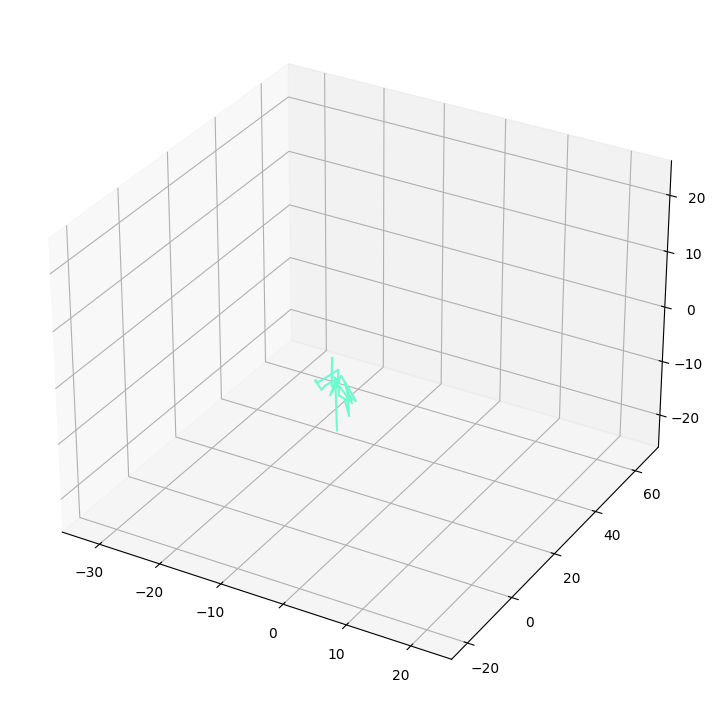

In [ ]:
#SINGLE TRACK 

data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
data.dropna()
count_DP=0


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Write which movie you want to plot

# data=data[data['max_displacement']>19]

#Hoxb5 with 35um max displacement
# my_list_hoxb5 = ['VWF_053_MS220209_M1_movie2homeostasis_P26kuovascu_1.5259021893143654e-05']
#Hoxb5 with 19um max displacement
# my_list_hoxb5 = ['VWF_053_MS220209_M1_movie2homeostasis_P24kuomk_1.5259021893143654e-05']
#not moving Hoxb5 max displacement of 11
# my_list_hoxb5 = ['VWF_053_MS220209_M1_movie2homeostasis_P18kuo_1.5259021893143654e-05']

# ['VWF_053_MS220209_M1_movie2homeostasis_P14partlygreen_1.5259021893143654e-05',
# 'VWF_053_MS220209_M1_movie2homeostasis_P14partlygreen_3.051804378628731e-05', 
#     'VWF_053_MS220209_M1_movie2homeostasis_P16DP_1.5259021893143654e-05',
#     'VWF_053_MS220209_M1_movie2homeostasis_P24kuomk_1.5259021893143654e-05',
#  'VWF_053_MS220209_M1_movie2homeostasis_P26kuovascu_1.5259021893143654e-05']


#immotile Hoxb5Vwf
# my_list_hoxb5 = ['VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1.5259021893143654e-05']

#hoxb5 cell in depletion
# my_list_hoxb5 = ['VWF_066_MS220519_M2_movie2_P12_2k_mk_1.5259021893143654e-05']#21 timepoints but could be moving somewhere
# my_list_hoxb5 = ['VWF_066_MS220522_M1_movie2_P7k_1.5259021893143654e-05']
#hoxb5vwf cell in depletion
# my_list_hoxb5 = ['VWF_048_MS220118_M3_movie4plt_P6DP+_1.5259021893143654e-05']
#24h depletion
# VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05
# my_list_hoxb5 = ['VWF_060_MS220408_M1_MOVIE5_P4_2_4.577706567943096e-05']#moves a lot
my_list_hoxb5 = ['VWF_060_MS220408_M1_MOVIE5_P16_3.051804378628731e-05']
my_list_hoxb5 = ['VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05']



print(len(my_list_hoxb5))

#Plotting the tracks 


for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    # print(data1['max_displacement'].max)
    # if len(data1['Metadata_Timepoint'])>20:
    X1= data1['corrected_x_2']
    Y1= data1['corrected_y_2']
    Z1= data1['corrected_z_2']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    
#    ax.set_xlim(-15, 20)
#    ax.set_ylim(-20, 30)
#    ax.set_zlim(-20, 10)    
    ax.set_xlim(-35, 25)
    ax.set_ylim(-25, 70)
    ax.set_zlim(-25, 25)
    # ax.legend(loc='upper left')

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)


In [ ]:
data = pd.read_csv('/Volumes/LUIS1_MS/Experiments/IVM_tracks.csv', header = 0)
print(data)

            x  relative_x        y  relative_y         z  relative_z  frame  \
0    1068.220       0.000  327.353       0.000  27.77760      0.0000      1   
1    1067.730      -0.490  327.636       0.283  27.78840      0.0108      2   
2    1069.680       1.460  328.081       0.728  28.46300      0.6854      3   
3    1069.680       1.460  329.026       1.673  28.41970      0.6421      4   
4    1067.730      -0.490  329.433       2.080  27.18380     -0.5938      5   
..        ...         ...      ...         ...       ...         ...    ...   
417   881.113     -41.987  147.775      29.832  11.22700      0.0000     18   
418   875.323     -47.777  152.921      34.978   8.55963      0.0000     19   
419   874.770     -48.330  155.125      37.182   6.79874      0.0000     20   
420   876.980     -46.120  154.776      36.833   5.98209      0.0000     21   
421   876.980     -46.120  158.930      40.987   7.76605      0.0000     22   

                                                  f

8
Axes3DSubplot(0.125,0.53;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.327174,0.53;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.529348,0.53;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.731522,0.53;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.125,0.11;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.327174,0.11;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.529348,0.11;0.168478x0.35)
New size: [15, 12]
Axes3DSubplot(0.731522,0.11;0.168478x0.35)
New size: [15, 12]


<Figure size 1800x1350 with 0 Axes>

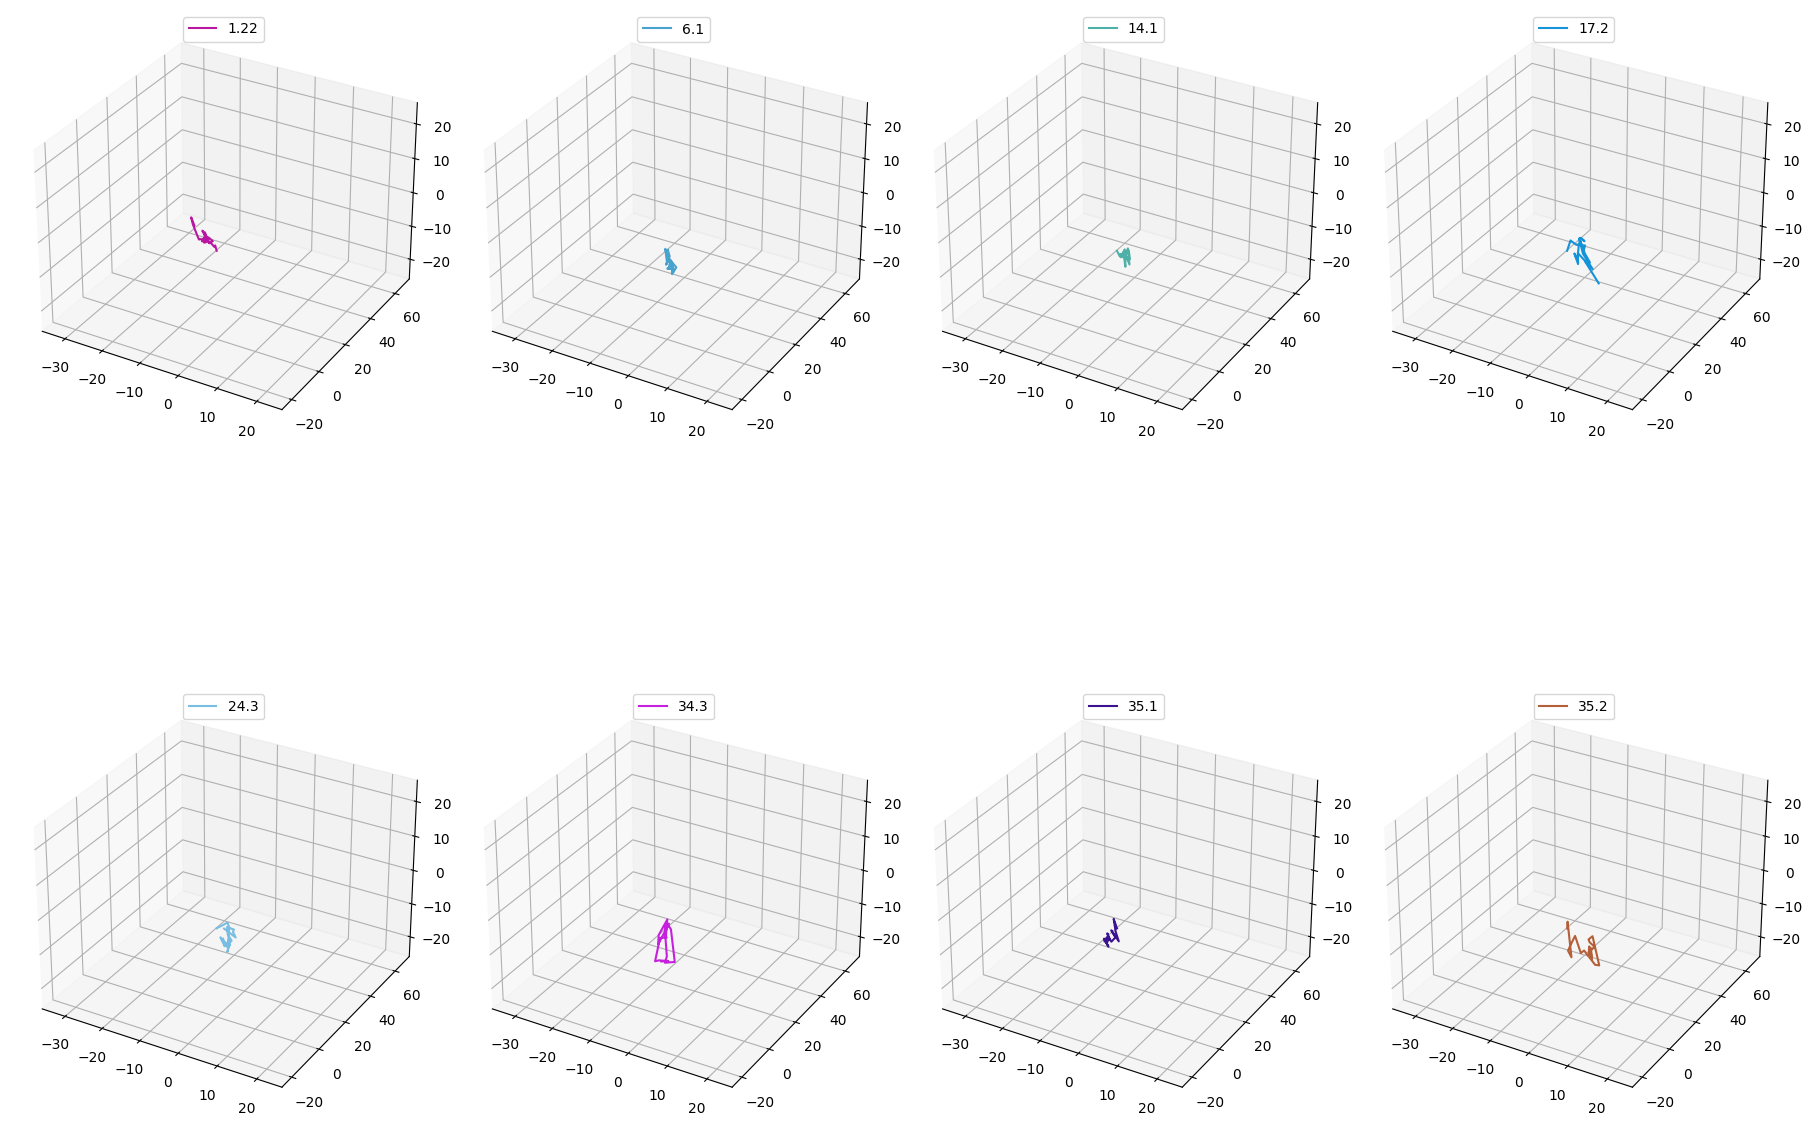

In [296]:
#SINGLE TRACK PLOTS FOR ALL THE CELLS

data= pd.read_csv("/Users/secchim/Downloads/neighbour_tracks231011.csv", header = 0) ###all tracks are 21 frames 
plt.rcParams["font.size"]=10
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')


# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot(x, y)
# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

# for ax in fig.get_axes():
#     ax.label_outer()

##FILTER DATA TO WRITE THE LIST OF TRACKS TO PLOT
data['Group']=data['Treatment']+'_'+data['Hoxb5_status_corrected']
dhhv=data[data['Group']=='depletion_Hoxb5_vwf'] #homeostasis_Hoxb5_vwf, homeostasis_hoxb5
# my_list_hoxb5 = list(dhhv['Final_Cell_ID'].unique())
my_list_hoxb5 = dhhv['Final_Cell_ID'].unique()
###the length of the list tells you how many rows to plot
print(len(my_list_hoxb5))

n=-1
#homeostasis_Hoxb5_vwf 2 rows, 3 columns, fig size is 12, 9 
#homeostasis_hoxb5 6 rows, 4 columns, fig size is 16,27
#24hdepletion_Hoxb5_vwf, 3 rows, 3 columns, 12, 12
#24hdepletion_hoxb5 7 rows, 4 columns, fig size is 16,27
#depletion_hoxb5 2 rows, 5 columns, fig size is 16,6
fig, axs = plt.subplots(nrows=2, ncols=4, layout='constrained', subplot_kw={'projection': '3d'})
for ax in axs.flat:
    print(ax)
    n=n+1
    a=my_list_hoxb5[n]
# #Plotting the tracks 
# for a in my_list_hoxb5:
    data1= data[(data['Final_Cell_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    # print(data1['max_displacement'].max)
    # if len(data1['Metadata_Timepoint'])>20:
    X1= data1['x']
    Y1= data1['y']
    Z1= data1['z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label=a, c=(r,g,b))

#    ax.set_xlim(-15, 20)
#    ax.set_ylim(-20, 30)
#    ax.set_zlim(-20, 10)    
    ax.set_xlim(-35, 25)
    ax.set_ylim(-25, 70)
    ax.set_zlim(-25, 25)
    ax.legend(loc='upper center')

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15#12
    fig_size[1] = 12#9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)


9
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


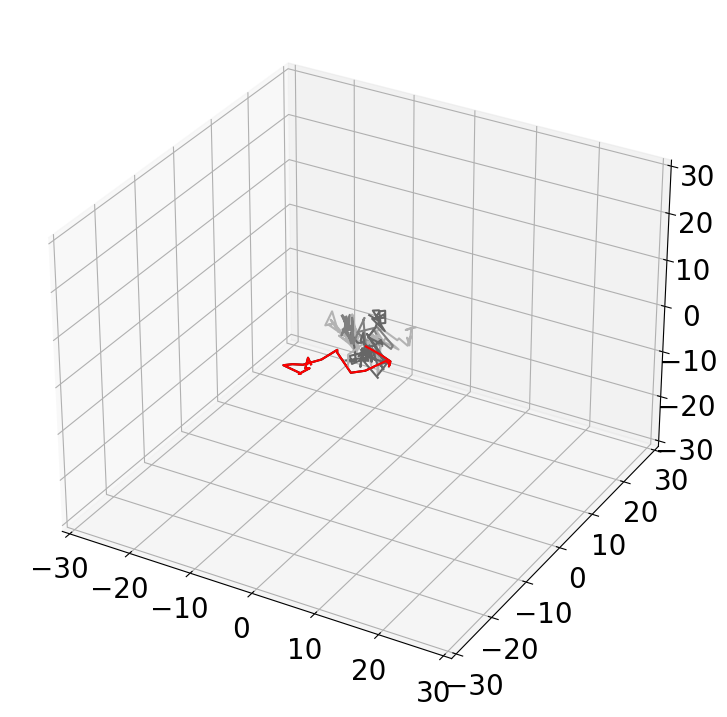

In [314]:
#REPRESENTATIVE CELL IN RED, ALL OTHERS IN GREY

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

##FILTER DATA TO WRITE THE LIST OF TRACKS TO PLOT
data['Group']=data['Treatment']+'_'+data['Hoxb5_status_corrected']
dhhv=data[data['Group']=='24hdepletion_Hoxb5_vwf'] #homeostasis_Hoxb5_vwf #24hdepletion_hoxb5
# my_list_hoxb5 = list(dhhv['Final_Cell_ID'].unique())
my_list_hoxb5 = dhhv['Final_Cell_ID'].unique()
###the length of the list tells you how many rows to plot
print(len(my_list_hoxb5))

r_list=[0.4,0.5, 0.6, 0.7]
#Plotting the tracks 
for a in my_list_hoxb5:
    data1= data[(data['Final_Cell_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    # print(data1['max_displacement'].max)
    # if len(data1['Metadata_Timepoint'])>20:
    X1= data1['x']
    Y1= data1['y']
    Z1= data1['z']
    if a ==13.1: 
        r= 0
        b= 0
        g= 0
    else: 
        rnb=random.choice(r_list)
        r= rnb
        b= rnb
        g= rnb #was 0.8
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    
#    ax.set_xlim(-15, 20)
#    ax.set_ylim(-20, 30)
#    ax.set_zlim(-20, 10)    
    # ax.set_xlim(-35, 25)
    # ax.set_ylim(-25, 70)
    # ax.set_zlim(-25, 25)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_zlim(-30, 30)
    # ax.legend(loc='upper left')

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["font.size"]=20
    print ("New size:", fig_size)
data1= data[(data['Final_Cell_ID'] == 13.1)].sort_values(by=['Metadata_Timepoint'])
X1= data1['x']
Y1= data1['y']
Z1= data1['z']
ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(1,0,0))

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/1174994935.py:6: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  CP=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/1174994935.py:19: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/1174994935.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whm

['VWF_043_MS211125_M3' 'VWF_043_MS211126_M4' 'VWF_045_MS211208_M2'
 'VWF_048_MS220118_M3' 'VWF_048_MS220119_M1' 'VWF_048_MS220120_M2'
 'VWF_049_MS220201_M1' 'VWF_053_MS220209_M1' 'VWF_060_MS220408_M1'
 'VWF_060_MS220408_M2' 'VWF_062_MS220420_M3' 'VWF_062_MS220421_M5'
 'VWF_063_MS220428_M1' 'VWF_063_MS220428_M2' 'VWF_066_MS220519_M2'
 'VWF_066_MS220522_M1' 'VWF_066_MS220522_M4']
                  FileID  track_count_manual  track_count_CP ratio_track
0    VWF_048_MS220118_M3                   3               7    2.333333
1    VWF_048_MS220118_M3                   3               7    2.333333
2    VWF_048_MS220118_M3                   3               7    2.333333
3    VWF_048_MS220118_M3                   3               7    2.333333
4    VWF_048_MS220118_M3                   3               7    2.333333
..                   ...                 ...             ...         ...
215  VWF_062_MS220420_M3                   5               5         1.0
216  VWF_062_MS220420_M3           

<AxesSubplot: xlabel='FileID', ylabel='ratio_track'>

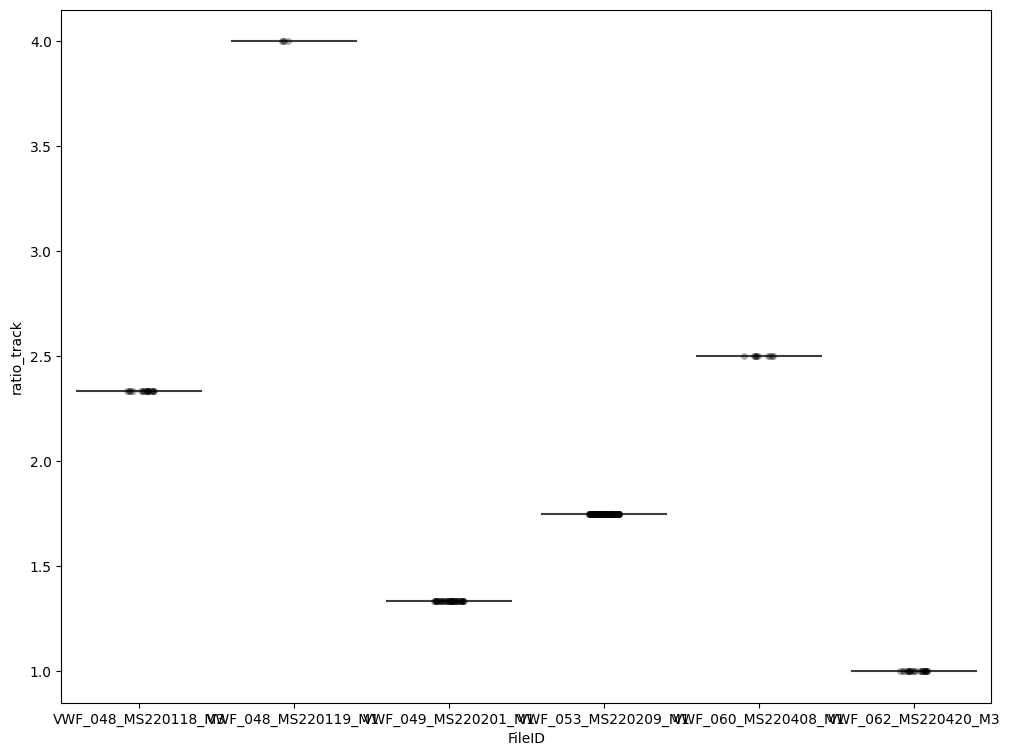

In [ ]:
#COMPARING MANUAL AND CP TRACKS WITH A FILTER OF 11 FRAMES

#IMPORT BOTH

manual=pd.read_csv('/Users/secchim/Downloads/IVM_230412.csv', header = 0)
CP=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)

manual['FileID']=manual['file'].astype(str).str.upper()
for b, r in manual.iterrows():
            (manual.loc[b, "FileID"])=manual.loc[b,'FileID'][0:19]

# print(manual['FileID'])

FileID_list=manual['FileID'].unique()
# print(FileID_list)

df_list =[]
grouped=manual.groupby(['cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        df_list.append(newdf)
manual11=pd.concat(df_list)
manu=manual11[['FileID','cell_ID']]
manu=manu.drop_duplicates()

df_list =[]
grouped=manu.groupby(['FileID'])
for i, newdf in grouped:
        newdf['track_count_manual']=len(newdf)
        df_list.append(newdf)
manual_count11=pd.concat(df_list)     
manual_count11=manual_count11[['FileID','track_count_manual']]  

FileID_list=CP['FileID'].unique()
print(FileID_list)

df_list =[]
grouped=CP.groupby(['Track_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        df_list.append(newdf)
CP11=pd.concat(df_list)
CPP=CP11[['FileID','Track_ID']]
CPP=CPP.drop_duplicates()

df_list =[]
grouped=CPP.groupby(['FileID'])
for i, newdf in grouped:
        newdf['track_count_CP']=len(newdf)
        df_list.append(newdf)
CP_count11=pd.concat(df_list)     
CP_count11=CP_count11[['FileID','track_count_CP']]  

comp=pd.merge(manual_count11, CP_count11[:], on = 'FileID')
comp['ratio_track']='ratio'
for b, r in comp.iterrows():
            (comp.loc[b, "ratio_track"])=comp.loc[b,'track_count_CP']/comp.loc[b,'track_count_manual']
print(comp)

sns.violinplot(x='FileID', y="ratio_track", data=comp, showfliers = False)
sns.stripplot(x='FileID', y="ratio_track", data=comp, dodge=True, color='black', alpha=0.3)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/3445666149.py:6: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  CP=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)


['VWF_049_MS220201_M1' 'VWF_053_MS220209_M1' 'VWF_048_MS220119_M1'
 'VWF_048_MS220118_M3' 'VWF_048_MS220118_M2' 'VWF_043_MS211125_M4'
 'VWF_060_MS220408_M1' 'VWF_062_MS220421_M2' 'VWF_062_MS220420_M3'
 'VWF_063_MS220428_M1' 'VWF_065_MS220519_M2' 'VWF_065_MS220522_M4'
 'VWF_067_220526_M2_M' 'VWF_078_MS230123_M5']
['VWF_043_MS211125_M3' 'VWF_043_MS211126_M4' 'VWF_045_MS211208_M2'
 'VWF_048_MS220118_M3' 'VWF_048_MS220119_M1' 'VWF_048_MS220120_M2'
 'VWF_049_MS220201_M1' 'VWF_053_MS220209_M1' 'VWF_060_MS220408_M1'
 'VWF_060_MS220408_M2' 'VWF_062_MS220420_M3' 'VWF_062_MS220421_M5'
 'VWF_063_MS220428_M1' 'VWF_063_MS220428_M2' 'VWF_066_MS220519_M2'
 'VWF_066_MS220522_M1' 'VWF_066_MS220522_M4']
                 FileID  track_count_manual  track_count_CP ratio_track
0   VWF_048_MS220118_M3                   3               5    1.666667
1   VWF_048_MS220118_M3                   3               5    1.666667
2   VWF_048_MS220118_M3                   3               5    1.666667
3   VWF_048_MS220

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/3445666149.py:19: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/3445666149.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_83149/3445666149.py:39: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/

<AxesSubplot: xlabel='FileID', ylabel='ratio_track'>

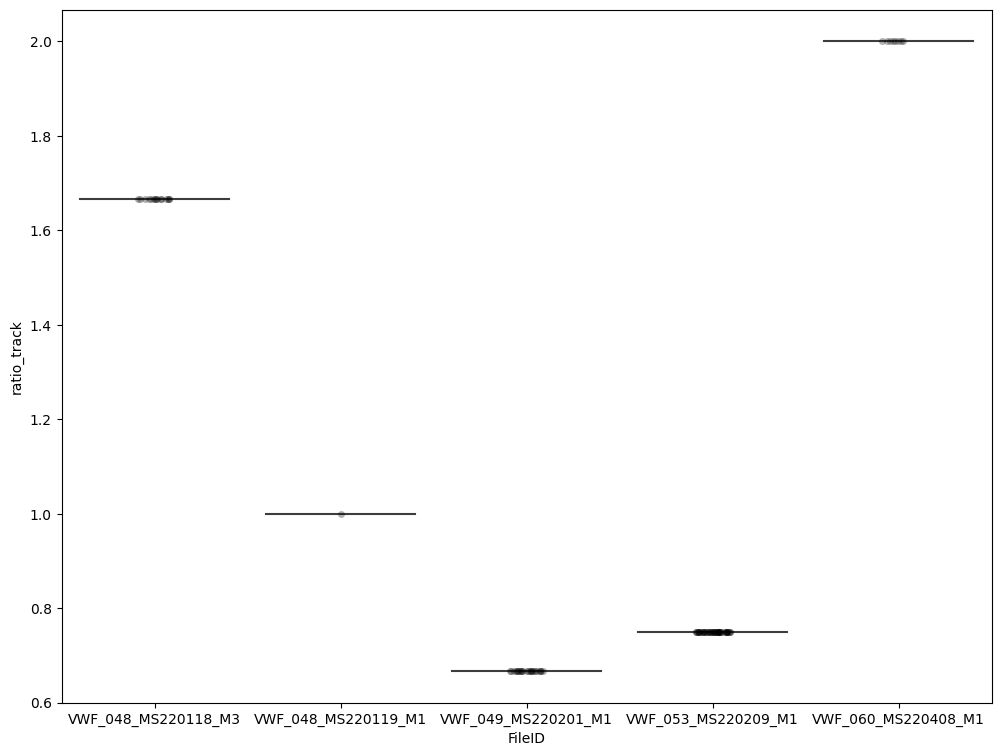

In [ ]:
#COMPARING MANUAL AND CP TRACKS

#IMPORT BOTH

manual=pd.read_csv('/Users/secchim/Downloads/IVM_230412.csv', header = 0)
CP=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', header = 0)

manual['FileID']=manual['file'].astype(str).str.upper()
for b, r in manual.iterrows():
            (manual.loc[b, "FileID"])=manual.loc[b,'FileID'][0:19]

# print(manual['FileID'])

FileID_list=manual['FileID'].unique()
print(FileID_list)

df_list =[]
grouped=manual.groupby(['cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=20:
        df_list.append(newdf)
manual20=pd.concat(df_list)
manu=manual20[['FileID','cell_ID']]
manu=manu.drop_duplicates()

df_list =[]
grouped=manu.groupby(['FileID'])
for i, newdf in grouped:
        newdf['track_count_manual']=len(newdf)
        df_list.append(newdf)
manual_count20=pd.concat(df_list)     
manual_count20=manual_count20[['FileID','track_count_manual']]  

FileID_list=CP['FileID'].unique()
print(FileID_list)

df_list =[]
grouped=CP.groupby(['Track_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=20:
        df_list.append(newdf)
CP20=pd.concat(df_list)
CPP=CP20[['FileID','Track_ID']]
CPP=CPP.drop_duplicates()

df_list =[]
grouped=CPP.groupby(['FileID'])
for i, newdf in grouped:
        newdf['track_count_CP']=len(newdf)
        df_list.append(newdf)
CP_count20=pd.concat(df_list)     
CP_count20=CP_count20[['FileID','track_count_CP']]  

comp=pd.merge(manual_count20, CP_count20[:], on = 'FileID')
comp['ratio_track']='ratio'
for b, r in comp.iterrows():
            (comp.loc[b, "ratio_track"])=comp.loc[b,'track_count_CP']/comp.loc[b,'track_count_manual']
print(comp)

sns.violinplot(x='FileID', y="ratio_track", data=comp, showfliers = False)
sns.stripplot(x='FileID', y="ratio_track", data=comp, dodge=True, color='black', alpha=0.3)

In [115]:
### updated version of above

##dx is based on 230728_cp_movies => CP version
dy=dx
# print(dy)
dy['Analysis']='CP'
dy['Track_length_in_timepoint']=None
dy['MSD']=None
dy['variance_speed']=None
dy['Hoxb5_status_corrected']=dy['Hoxb5_status'].str.replace(r'SP','hoxb5')
dy['Hoxb5_status_corrected']=dy['Hoxb5_status_corrected'].str.replace(r'DP','Hoxb5_vwf')
grouped=dy.groupby(['Final_Cell_ID'])
dflist=[]
# #track length in minutes
###MEAN SQURE DISPLACEMENT
for i, newdf in grouped:
        newdf['Track_length_in_timepoint']=newdf.shape[0]*3
        newdf['MSD']=newdf['distance'].pow(2).mean()
        newdf['variance_speed']=newdf['frame_speed'].var(axis=0)
        dflist.append(newdf[newdf['Metadata_Timepoint']==(newdf['Metadata_Timepoint'].max())])
dy=pd.concat(dflist)
dy=dy[['Analysis','Final_Cell_ID','Hoxb5_status_corrected','Track_length_in_timepoint','Treatment_corrected','displacement','max_displacement', 'track_length','mean_speed', 'linearity_coefficient',	'arrest_coefficient',	'variance_speed', 'MSD']].drop_duplicates()

###dz is based on neighbour_tracks230905 => manual version
dz=data
dz['Treatment_corrected']=dz['Treatment'].str.replace(r'homeostasis','Homeostasis')
dz['Treatment_corrected']=dz['Treatment_corrected'].str.replace(r'plt_depletion','Depletion')
dz['Analysis']='manual'
dz['Track_length_in_timepoint']=None
dz=dz[dz['Treatment']!='ageing']
grouped=dz.groupby(['Final_Cell_ID'])
dflist=[]
#track length in minutes
for i, newdf in grouped:
        newdf['Track_length_in_timepoint']=newdf.shape[0]*3
        dflist.append(newdf[newdf['Metadata_Timepoint']==(newdf['Metadata_Timepoint'].max())])
dz=pd.concat(dflist)
dz=dz[['Analysis','Final_Cell_ID','Hoxb5_status_corrected','Track_length_in_timepoint','Treatment_corrected','displacement','max_displacement', 'track_length','mean_speed', 'linearity_coefficient',	'arrest_coefficient',	'variance_speed', 'MSD']].drop_duplicates()


dw=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/231109_full_Ilastik_movies.csv')
# dw['Final_Cell_ID']=dw['file'].astype(str)+'_'+dw['TRACK_ID'].astype(str)
print(len(dw['Final_Cell_ID'].unique()))
dw['Analysis']='Ilastik'
dw=dw.drop_duplicates()
dw['Hoxb5_status_corrected']='undefined'
grouped=dw.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    dflist.append(newdf[newdf['Metadata_Timepoint']==(newdf['Metadata_Timepoint'].max())])
dw=pd.concat(dflist)   
dw=dw[['Analysis','Final_Cell_ID','Hoxb5_status_corrected','Track_length_in_timepoint','Treatment_corrected','displacement','max_displacement', 'track_length','mean_speed', 'linearity_coefficient',	'arrest_coefficient',	'variance_speed', 'MSD']].drop_duplicates()

dall=pd.concat((dy,dz,dw), axis=0)

# dall.to_csv('/Users/secchim/Downloads/231109_allanalysis.csv')
# ### Tracking length comparing CP and manual tracking

# g=( sns.stripplot(x=("Treatment_corrected"), y="Track_length_in_timepoint", hue="Treatment_corrected", hue_order=("Homeostasis", "Depletion", "24h_depletion"), data=dall, s=10, dodge=True, color='black', alpha=0.5, legend=False),sns.violinplot(x=("Treatment_corrected"),  y="Track_length_in_timepoint", hue="Treatment_corrected", palette=['black', 'grey', 'grey'], hue_order=("Homeostasis", "Depletion", "24h_depletion"), data=dall, showfliers = False, legend=False))
# # g=( sns.stripplot(x=("Treatment_corrected"),hue='Hoxb5_status_corrected', y="Track_length_in_timepoint", data=datax, s=10, dodge=True, color='black', alpha=0.5, legend=False, hue_order=('Hoxb5_vwf','hoxb5')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Track_length_in_timepoint", data=datab, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False))
# # plt.legend(title='Cell type', loc='upper left', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend(fontsize='x-large', title_fontsize='40')
# plt.legend([], [], frameon=False)
# g[1].set(ylim=(0, 175))
# g[1].set(ylabel='Tracking length (min)')
# plt.setp(g[1].collections, alpha=.6)
# plt.show(g)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/330688892.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/330688892.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


38


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/330688892.py:49: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [109]:
#MANUAL DATA PROCESSING

# data=pd.read_csv('/Users/secchim/Documents/Experiments/IVM_tracks230713.csv')
#new version including smaller tracks from aged mice
data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks230905.csv')

In [110]:
print(len(data['Final_Cell_ID'].unique())) #136 tracks total, now 257 

data['corrected_x_2']=data['x']
data['corrected_y_2']=data['y']
data['corrected_z_2']=data['z']

257


In [111]:

#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

#REMOVE FRAMES LONGER THAN 1H 

# print(data['Metadata_Timepoint'])
data=data[data['Metadata_Timepoint']!='na']
data['Metadata_Timepoint']=data['Metadata_Timepoint'].astype(int)
# data=data[data['Metadata_Timepoint']<22]

#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Metadata_Timepoint"])== (newdf['Metadata_Timepoint'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
    dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# #REMOVE TRACKS SHORTER THAN 21 frames
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     if newdf.shape[0]<21:
#         print(newdf['Final_Cell_ID'].unique())
#         # for b, r in newdf.iterrows():
#             # if (newdf.loc[b, "Metadata_Timepoint"])<21 and newdf.loc[b, "Last_timepoint"]=True:
#     elif newdf.shape[0]==21:
#         dflist.append(newdf)
# data=pd.concat(dflist)              
# # print(data)



# calculate distance between timeframes
data['distance']= None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(mt.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(mt.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()


#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf.dropna()
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

#calculate displacement for every timepoint
data['displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
    stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
    stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
    # print(stored_X0.iloc[0], stored_Y0.iloc[0], stored_Z0.iloc[0]) #had to add the iloc [0]
    # stored_X0=0
    # stored_Y0=0
    # stored_Z0=0
    for b, r in newdf.iterrows():
        newdf.loc[b, "displacement"]=mt.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])

#maximum displacement
data['max_displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])

#frame speed
# data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=np.nan #was None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                # newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))#ideal way
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/180)
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])

data['frame_speed_min']=data['frame_speed']*60

#mean frame speed

data['mean_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['mean_speed']=newdf['frame_speed'].mean()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])

# data["Timeframe_Time_next"] = data["Timeframe_Time"].shift(-1)
# #frame speed
# data=data.drop_duplicates() #why do I have duplicates?
# data['frame_speed']=None
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     if newdf.shape[0]>=2:
#         for b, r in newdf.iterrows():
#             if (newdf.loc[b, 'Last_timepoint'])== False: 
#             #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
#             # try:
#                 newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
#             # except:
#                 # newdf.loc[b, "frame_speed"]='NaN'
#             # print(b, newdf["frame_speed"])
#                 # pass
#             # else:
#                 # print(b, 'error')
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['frame_speed'])

#linearity coefficient

data['linearity_coefficient']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])

#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

data['arrest_coefficient']=False
data=data.drop_duplicates()
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrest_coefficient'])

##VARIANCE OF SPEED
data['variance_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    # newdf2=newdf[['frame_speed']]
    # x=(newdf2.var())
    if newdf.shape[0]>=2:
        newdf['frame_speed']=newdf['frame_speed'].dropna()
        newdf['variance_speed']=newdf['frame_speed'].var(axis=0)
        # print((newdf[['frame_speed']]).values)
        # newdf['variance_speed']=statistics.variance((newdf[['frame_speed']]).values)#didn't work
    # for b, r in newdf.iterrows():
        # newdf.loc[b,'variance_speed']=x.astype(int)
    # print(x)
    # newdf['variance_speed']=x
    print(newdf['variance_speed'])
    dflist.append(newdf)
data=pd.concat(dflist)
# print(data['variance_speed'])

###MEAN SQURE DISPLACEMENT
data['MSD']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MSD']=newdf['distance'].pow(2).mean()
    print(newdf['MSD'])
    dflist.append(newdf)
data=pd.concat(dflist)

#NORMALIZING POSITIONS TO THE FIRST COORDINATES

grouped=data.groupby(['Final_Cell_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['corrected_x_2'].values
    norm_y=newdf2['corrected_y_2'].values
    norm_z=newdf2['corrected_z_2'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['x']=(newdf['corrected_x_2']-newdf['norm_x'])
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['y']=(newdf['corrected_y_2']-newdf['norm_y'])
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['z']=(newdf['corrected_z_2']-newdf['norm_z'])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

# data.to_csv('/Users/secchim/Downloads/manual_small_tracks230805.csv')#this one has all movies up to VWF_109
# data.to_csv('/Users/secchim/Downloads/neighbour_tracks231011.csv') ###all tracks are 21 frames 

0       1067.730
1       1069.680
2       1069.680
3       1067.730
4       1070.650
          ...   
4791     656.377
4792     658.845
4793     663.645
4794     660.720
4795         NaN
Name: corrected_x_2_next, Length: 4796, dtype: float64 0       1068.220
1       1067.730
2       1069.680
3       1069.680
4       1067.730
          ...   
4791     656.740
4792     656.377
4793     658.845
4794     663.645
4795     660.720
Name: corrected_x_2, Length: 4796, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:18: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:48: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       0.565956
1       2.110832
2       0.945991
3       2.344269
4        3.14934
          ...   
4791    4.909468
4792    2.747076
4793    7.110465
4794    7.026395
4795        None
Name: distance, Length: 4795, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:70: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       37.726793
1       37.726793
2       37.726793
3       37.726793
4       37.726793
          ...    
4791    73.617412
4792    73.617412
4793    73.617412
4794    73.617412
4795    73.617412
Name: track_length, Length: 4795, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:81: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0             0.0
1        0.565956
2        1.769564
3        2.311454
4        2.217904
          ...    
4791      14.2691
4792    18.182276
4793    17.998699
4794    16.740101
4795    19.146079
Name: displacement, Length: 4795, dtype: object
0        6.498524
1        6.498524
2        6.498524
3        6.498524
4        6.498524
          ...    
4791    19.146079
4792    19.146079
4793    19.146079
4794    19.146079
4795    19.146079
Name: max_displacement, Length: 4795, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:99: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       0.003144
1       0.011727
2       0.005256
3       0.013024
4       0.017496
          ...   
4791    0.027275
4792    0.015262
4793    0.039503
4794    0.039036
4795         NaN
Name: frame_speed, Length: 4795, dtype: float64
0       0.010480
1       0.010480
2       0.010480
3       0.010480
4       0.010480
          ...   
4791    0.020449
4792    0.020449
4793    0.020449
4794    0.020449
4795    0.020449
Name: mean_speed, Length: 4795, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:135: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:169: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       0.172252
1       0.172252
2       0.172252
3       0.172252
4       0.172252
          ...   
4791    0.260075
4792    0.260075
4793    0.260075
4794    0.260075
4795    0.260075
Name: linearity_coefficient, Length: 4795, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:183: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0        True
1        True
2        True
3        True
4        True
        ...  
4791     True
4792     True
4793    False
4794    False
4795    False
Name: arrested, Length: 4795, dtype: bool


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:202: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       0.952381
1       0.952381
2       0.952381
3       0.952381
4       0.952381
          ...   
4791    0.809524
4792    0.809524
4793    0.809524
4794    0.809524
4795    0.809524
Name: arrest_coefficient, Length: 4795, dtype: object
0     0.00003
1     0.00003
2     0.00003
3     0.00003
4     0.00003
5     0.00003
6     0.00003
7     0.00003
8     0.00003
9     0.00003
10    0.00003
11    0.00003
12    0.00003
13    0.00003
14    0.00003
15    0.00003
16    0.00003
17    0.00003
18    0.00003
19    0.00003
20    0.00003
Name: variance_speed, dtype: float64
21    0.000077
22    0.000077
23    0.000077
24    0.000077
25    0.000077
26    0.000077
27    0.000077
28    0.000077
29    0.000077
30    0.000077
31    0.000077
32    0.000077
33    0.000077
34    0.000077
35    0.000077
36    0.000077
37    0.000077
38    0.000077
39    0.000077
40    0.000077
41    0.000077
Name: variance_speed, dtype: float64
494    0.000028
495    0.000028
496    0.000028
497    0.000028
498    0.000

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:216: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


3625    0.000059
3626    0.000059
3627    0.000059
3628    0.000059
3629    0.000059
3630    0.000059
3631    0.000059
3632    0.000059
3633    0.000059
3634    0.000059
3635    0.000059
3636    0.000059
3637    0.000059
3638    0.000059
3639    0.000059
3640    0.000059
3641    0.000059
3642    0.000059
3643    0.000059
3644    0.000059
3645    0.000059
Name: variance_speed, dtype: float64
3646    0.000113
3647    0.000113
3648    0.000113
3649    0.000113
3650    0.000113
3651    0.000113
3652    0.000113
3653    0.000113
3654    0.000113
3655    0.000113
3656    0.000113
3657    0.000113
3658    0.000113
3659    0.000113
3660    0.000113
3661    0.000113
3662    0.000113
3663    0.000113
3664    0.000113
3665    0.000113
3666    0.000113
Name: variance_speed, dtype: float64
3667    0.000491
3668    0.000491
3669    0.000491
3670    0.000491
3671    0.000491
3672    0.000491
3673    0.000491
3674    0.000491
3675    0.000491
3676    0.000491
3677    0.000491
3678    0.000491
3679    

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:237: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


797    37.760141
798    37.760141
799    37.760141
800    37.760141
801    37.760141
802    37.760141
803    37.760141
804    37.760141
805    37.760141
806    37.760141
807    37.760141
808    37.760141
809    37.760141
810    37.760141
811    37.760141
812    37.760141
813    37.760141
814    37.760141
815    37.760141
816    37.760141
817    37.760141
818    37.760141
819    37.760141
820    37.760141
821    37.760141
822    37.760141
823    37.760141
824    37.760141
825    37.760141
Name: MSD, dtype: float64
826    14.622797
827    14.622797
828    14.622797
829    14.622797
830    14.622797
831    14.622797
832    14.622797
833    14.622797
834    14.622797
835    14.622797
836    14.622797
837    14.622797
838    14.622797
839    14.622797
840    14.622797
841    14.622797
842    14.622797
843    14.622797
844    14.622797
845    14.622797
846    14.622797
847    14.622797
848    14.622797
849    14.622797
850    14.622797
851    14.622797
852    14.622797
853    14.622797
854  

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2411883988.py:249: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


          x       y       z  Metadata_Timepoint  \
0     0.000   0.000  0.0000                   1   
1    -0.490   0.283  0.0108                   2   
2     1.460   0.728  0.6854                   3   
3     1.460   1.673  0.6421                   4   
4    -0.490   2.080 -0.5938                   5   
...     ...     ...     ...                 ...   
4791  1.382 -11.438  8.4184                  17   
4792  1.019 -16.313  7.9651                  18   
4793  3.487 -16.313  6.7587                  19   
4794  8.287 -14.425  1.8644                  20   
4795  5.362 -16.611  7.8674                  21   

                                                   file  \
0     VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii...   
1     VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii...   
2     VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii...   
3     VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii...   
4     VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii...   
...                              

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/2863024088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/2863024088.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Tracked_coefficient']=None
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/2863024088.py:29: FutureWarning: In a future version of pandas, a length 1 tuple will

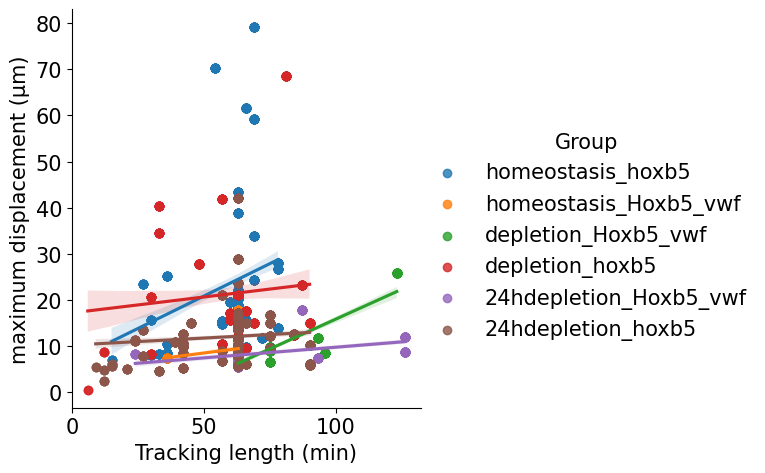

In [342]:

#PRINT TRACK LENGTH AS A FUNCTION OF TIME LENGTH 
# data=pd.read_csv('/Users/secchim/Downloads/manual_tracks230711.csv', header=0)
# data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks230921.csv', header=0)

#using the neighbour_tracks230905.csv
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=15

datax=data[data['track_length']!=0]
datax=datax[datax['Treatment']!='ageing']
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'track_length']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
# print(len(datab))
datab.dropna()
df_list =[]
# grouped=datab.groupby(['Final_Cell_ID'])
# for i, newdf in grouped:
#     if len(newdf.index) >=17:#was 11
#         df_list.append(newdf)
#         print(i)
# datab=pd.concat(df_list)

df_list =[]
datab['Tracked_coefficient']=None
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    newdf['Track_length_in_timepoint']=newdf.shape[0]
    for b, r in newdf.iterrows():
        newdf.loc[b,'Track_length_in_timepoint']=(newdf.loc[b,'Track_length_in_timepoint'])*3
    df_list.append(newdf)
datab=pd.concat(df_list)

# print(datab[datab['track_length']>1000])

##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
# fig, ax = plt.subplots(figsize=(12,9))#6,4.5
# g=sns.scatterplot(x="Track_length_in_timepoint", y="track_length", data=datab, hue='Hoxb5_status_corrected', style='Treatment')
# sns.scatterplot(x="Track_length_in_timepoint", y="track_length", data=datab, hue='Hoxb5_status_corrected', style='Treatment')

# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# sns.lineplot(data=datab, x="Track_length_in_timepoint", y="track_length", hue='Hoxb5_status_corrected', style='Treatment')
# g=sns.lmplot(data=datab, x='Track_length_in_timepoint', y='track_length', hue='Group', col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, 
#             hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, 
#             seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, 
#             facet_kws=None)
# # g.set(ylim=(0, 200))
# g.set(xlabel='Tracking length (min)')
# g.set(ylabel='Track length (μm)')

# model = ols('track_length ~  C(Hoxb5_status_corrected) + C(Treatment) +C(Track_length_in_timepoint)', data=datab).fit()
# sm.stats.anova_lm(model, typ=2)

g=sns.lmplot(data=datab, x='Track_length_in_timepoint', y='max_displacement', hue='Group', col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, 
            hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, 
            seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, 
            facet_kws=None)
g.set(xlabel='Tracking length (min)')
g.set(ylabel='maximum displacement (μm)')

# # model = ols('max_displacement ~  C(Hoxb5_status_corrected) + C(Treatment) +C(Track_length_in_timepoint)', data=datab).fit()
# # sm.stats.anova_lm(model, typ=2)
# datab=datab.drop_duplicates()
# # # datab.to_csv('/Users/secchim/Downloads/manual_track_sum.csv')#this one has all movies up to VWF_109
# plt.rcParams["font.size"]=40
# g=( sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="Track_length_in_timepoint", data=datab, s=10, dodge=True, color='black', alpha=0.5, legend=False, hue_order=('Hoxb5_vwf','hoxb5')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="Track_length_in_timepoint", data=datab, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False))
# # plt.legend(title='Cell type', loc='upper left', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend(fontsize='x-large', title_fontsize='40')
# plt.legend([], [], frameon=False)
# g[1].set(ylim=(0, 175))
# g[1].set(ylabel='Tracking length (min)')
# plt.show(g)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/4211073276.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/4211073276.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['track_length']=newdf2['distance'].sum()
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/4211073276.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[Text(0.5, 0, 'Tracking length (min)')]

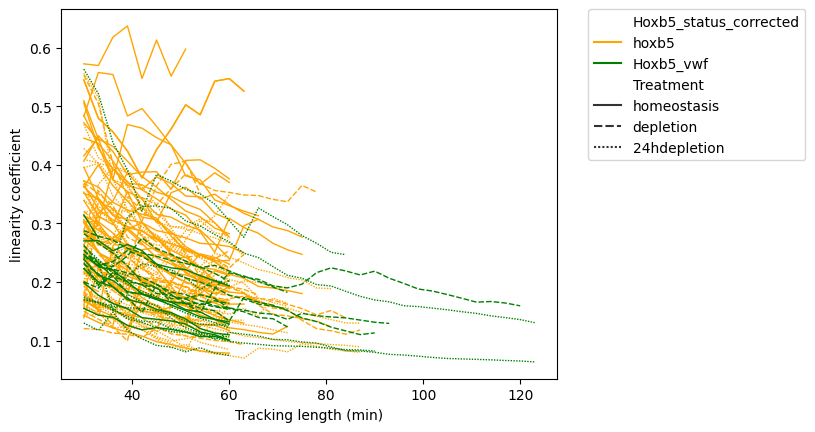

In [104]:
###reran lines above based on neighbour_tracks230905.csv', header=0)

### CALCULATING THESE PARAMETERS OVER TIME 
data['Track_length_in_timepoint']=None
data['Group']=None
data['Group']=data['Treatment']+'_'+data['Hoxb5_status_corrected']
datab=data[data['Treatment']!='ageing']
# print(datab['Final_Cell_ID'].unique())
# print(datab['Group'])
grouped=datab.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    # print(i)
    # print(newdf)
    for tmptmax in range(10, newdf.shape[0],1):
        # print(newdf.shape[0])
        # print(tmptmax)
        # print(type(newdf))
        newdf2=newdf.iloc[0:tmptmax,:]
        # print(newdf.iloc[0:tmptmax,:])
        # print(newdf2)
        # print(newdf2['Group'].unique())
        #Calculate track length
        newdf2.dropna()
        newdf2['track_length']=newdf2['distance'].sum()
        # print(newdf2['track_length'])
        #calculate max displacement
        newdf2['max_displacement']=newdf2['displacement'].max()
        # #calculate mean speed
        newdf2['mean_speed']=newdf2['frame_speed'].mean()*60
        # #calculate linearity coefficient
        newdf2['linearity_coefficient']=newdf2['max_displacement']/newdf2['track_length']
        # #calculate arrest coefficient
        # for b, r in newdf2.iterrows():
        #     # print((newdf.loc[b,'mean_speed']),2/60, b)
        #     # print(newdf.loc[b])
        #     if (newdf2.loc[b,'frame_speed'])!=None and (newdf2.loc[b,'frame_speed'])<(2/60): #different from NaN
        #         newdf2.loc[b,'arrested']=True
        #     else :
        #         newdf2.loc[b,'arrested']=False
        # newdf4=newdf2[newdf2['arrested']==True]
        # newdf3=newdf2[newdf2['arrested']==False]
        # if ((newdf4.shape[0])+(newdf3.shape[0]))>1:
        #     newdf2['arrest_coefficient']=(newdf4.shape[0])/((newdf4.shape[0])+(newdf3.shape[0]))
        # #calculate variance of speed
        # if newdf2.shape[0]>=2:
        #     newdf2['frame_speed']=newdf2['frame_speed'].dropna()
        #     newdf2['variance_speed']=newdf2['frame_speed'].var(axis=0)
        # #calculate mean square displacement
        newdf2['MSD']=newdf2['distance'].pow(2).mean()
        # #calculate tracklength in timepoint
        newdf2['Track_length_in_timepoint']=newdf2.shape[0]*3
        dflist.append(newdf2)
        # print(len(dflist))
datax=pd.concat(dflist)
# print(datax)
# print(datax['Final_Cell_ID'].unique())
datab=datax[datax['Final_Cell_ID']!=30.1]
datax=datab[datab['Final_Cell_ID']!=30.2]
# g=sns.lineplot(data=datax, x='Track_length_in_timepoint', y='track_length', hue='Group', palette=None)
# g=sns.lineplot(data=datax, x='Track_length_in_timepoint', y='max_displacement', hue='Group', palette=None)
# g=sns.lineplot(data=datax, x='Track_length_in_timepoint', y='mean_speed', hue='Group', palette=None)
g=sns.lineplot(data=datax, x='Track_length_in_timepoint', y='linearity_coefficient', hue='Hoxb5_status_corrected', hue_order=('hoxb5','Hoxb5_vwf'), palette= ('orange','green'), style= 'Treatment', units="Final_Cell_ID", estimator=None, lw=1, dashes=True)
g.legend(bbox_to_anchor=(1.5, 1), borderaxespad=0)
g.set(ylabel='linearity coefficient')#μm
g.set(xlabel='Tracking length (min)')

# print(datax[datax['MSD']>200]['Final_Cell_ID'].unique())

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/838153949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_63762/838153949.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['Final_Cell_ID']=datax['Final_Cell_ID'].astype(str)


['hoxb5homeostasis' 'Hoxb5_vwfhomeostasis' 'Hoxb5_vwfdepletion'
 'hoxb5depletion' 'Hoxb5_vwf24hdepletion' 'hoxb524hdepletion']


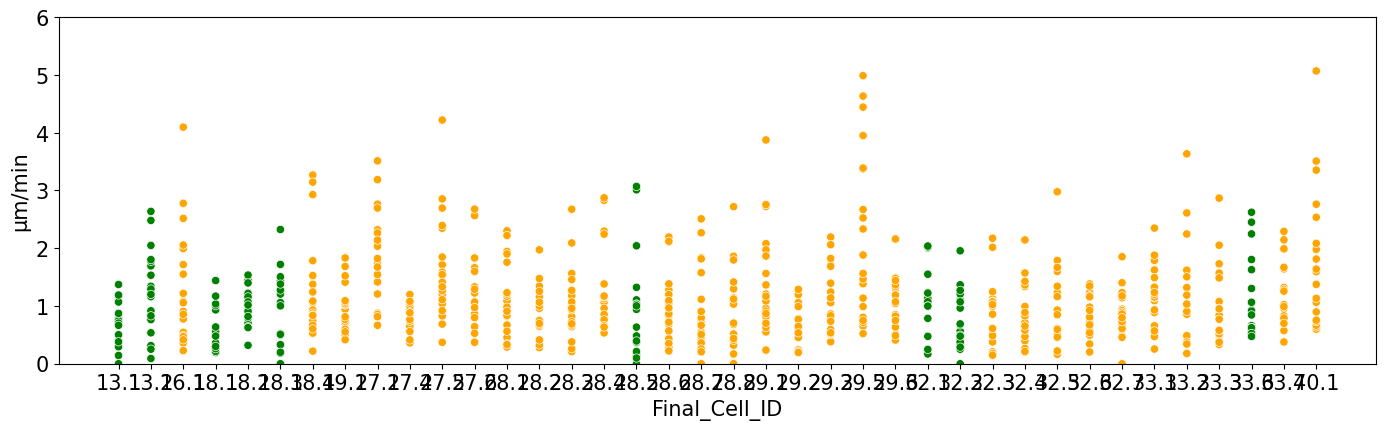

In [ ]:
#distance on y axis, metadatatimepoint on x axis 
data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks230921.csv', header=0)
##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
# fig, ax = plt.subplots(figsize=(17,4.5))
# g=sns.scatterplot(x="Metadata_Timepoint", y="distance", data=data)
# g.set(ylim=(0, 70))
datax=data[data['Treatment']!='ageing']
datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
print(datax['Group'].unique())
datax['Final_Cell_ID']=datax['Final_Cell_ID'].astype(str)
fig, ax = plt.subplots(figsize=(17,4.5))
plt.rcParams["font.size"]=20
# g=sns.scatterplot(x="Final_Cell_ID", y="distance", data=datax, hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g=sns.relplot(
#     data=datax, x="Final_Cell_ID", y="distance",
#     row="Treatment", hue="Hoxb5_status_corrected", style="Hoxb5_status_corrected",
#     kind="scatter",palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')
# )

# g=sns.scatterplot(x="Final_Cell_ID", y="distance", data=datax[datax['Treatment']=='homeostasis'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g=sns.scatterplot(x="Final_Cell_ID", y="distance", data=datax[datax['Treatment']=='depletion'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g=sns.scatterplot(x="Final_Cell_ID", y="distance", data=datax[datax['Treatment']=='24hdepletion'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g.set(ylim=(0, 20))
# g.set(ylabel='μm')
# plt.legend([], [], frameon=False)

# over30=[]
# for b, r in data.iterrows():
#     if data.loc[b,'distance']>20:
#         over30.append(data.loc[b, 'Final_Cell_ID'])

# print(over30)


# g=sns.scatterplot(x="Final_Cell_ID", y="frame_speed_min", data=datax, hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g=sns.stripplot(x="Final_Cell_ID", y="frame_speed_min", data=datax, hue='Group', dodge=True,  palette=['green','green','green','orange','orange','orange'], hue_order=('Hoxb5_vwfhomeostasis','Hoxb5_vwfdepletion','Hoxb5_vwf24hdepletion','hoxb5homeostasis','hoxb5depletion','hoxb524hdepletion'))
# g=sns.relplot(
#     data=datax, x="Final_Cell_ID", y="frame_speed_min",
#     row="Treatment", hue="Hoxb5_status_corrected", style="Hoxb5_status_corrected",
#     kind="scatter",palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')
# )
# g=sns.scatterplot(x="Final_Cell_ID", y="frame_speed_min", data=datax[datax['Treatment']=='homeostasis'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# g=sns.scatterplot(x="Final_Cell_ID", y="frame_speed_min", data=datax[datax['Treatment']=='depletion'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
g=sns.scatterplot(x="Final_Cell_ID", y="frame_speed_min", data=datax[datax['Treatment']=='24hdepletion'], hue='Hoxb5_status_corrected', style='Treatment',  palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))

g.set(ylim=(0, 6))
g.set(ylabel='μm/min')
plt.legend([], [], frameon=False)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_26476/1790263130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['Group']=data['Hoxb5_status_corrected']+data['Treatment']
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


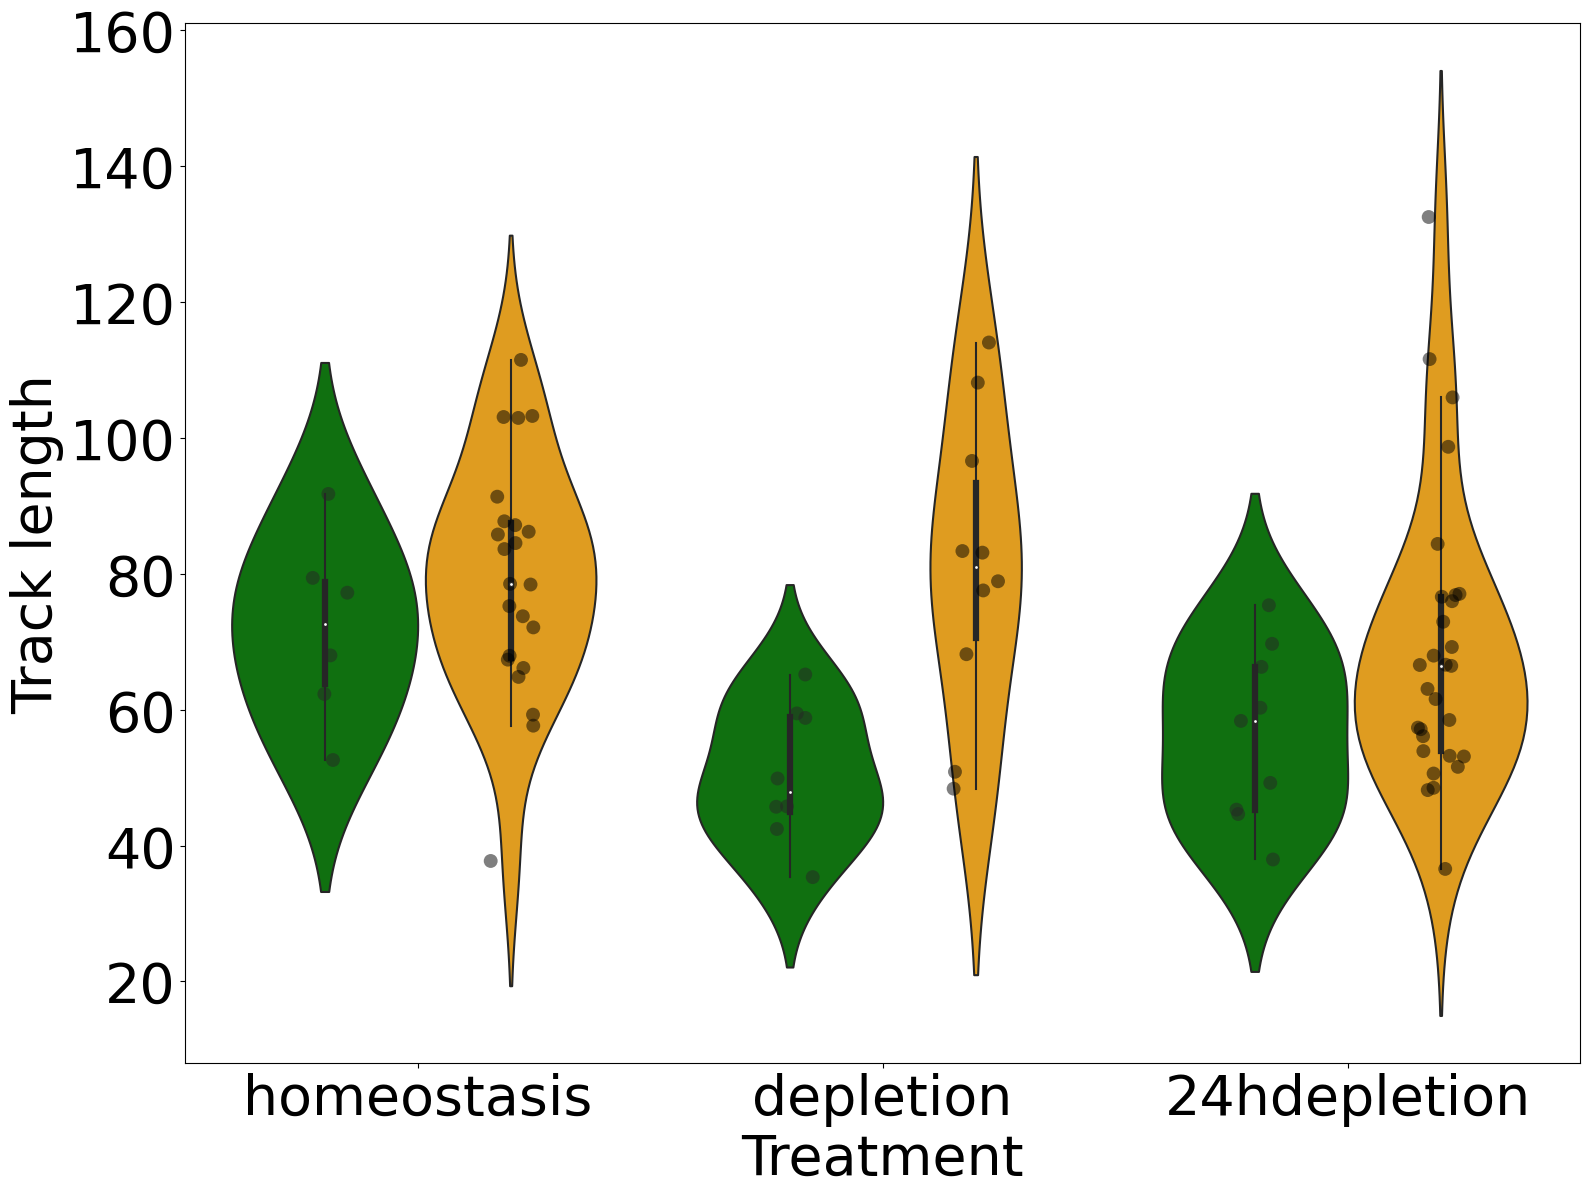

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


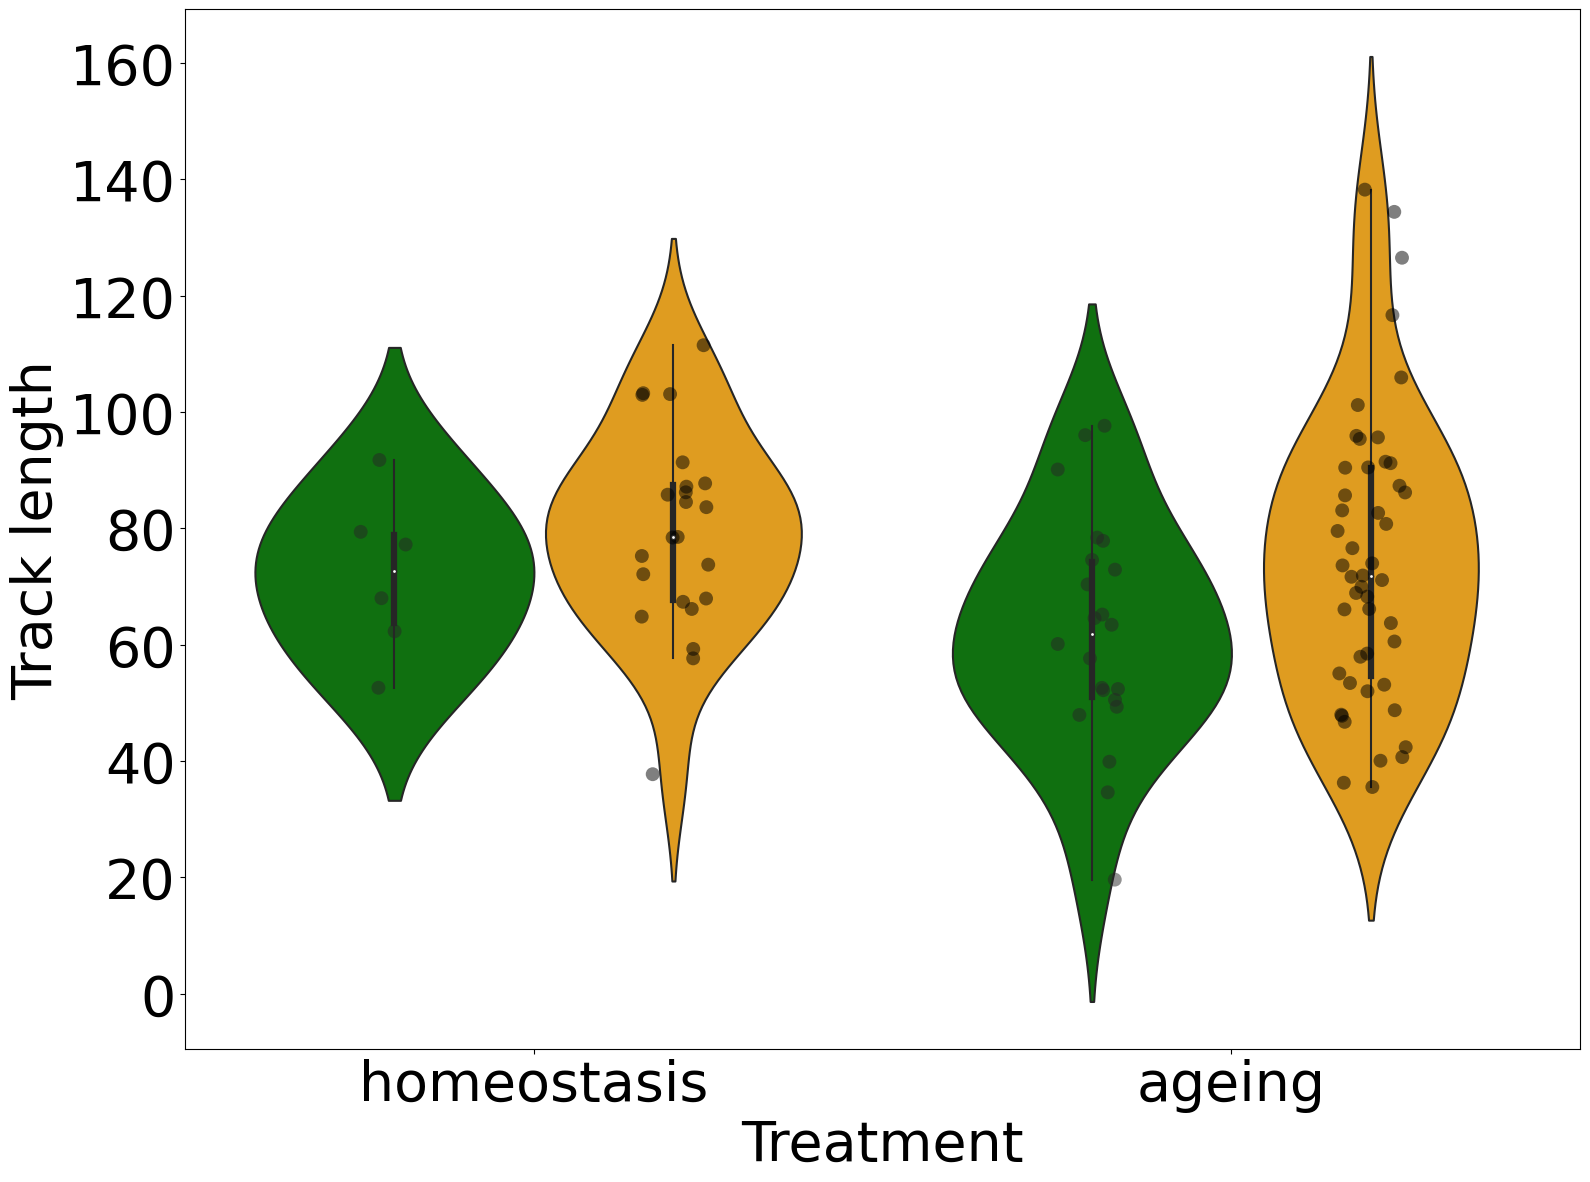

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#TRACK LENGTH FOR HOMEOSTASIS AND DEPLETION
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=40
# print ("New size:", fig_size)

datax=data[data['Treatment']!='ageing']
datax['Group']=data['Hoxb5_status_corrected']+data['Treatment']
dx=datax[['Treatment', 'Hoxb5_status_corrected', 'track_length','Group']]
dx=dx.drop_duplicates()
g=( sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="track_length", data=dx, s=10, dodge=True, color='black', alpha=0.5, legend=False, hue_order=('Hoxb5_vwf','hoxb5')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="track_length", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False))
# plt.legend(title='Cell type', loc='upper left', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g[1].set(ylabel='Track length')
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.show(g)
model = ols('track_length ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
sm.stats.anova_lm(model, typ=2)
sm.stats.multicomp.pairwise_tukeyhsd(dx['track_length'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()

sm.stats.multicomp.pairwise_tukeyhsd(dx['track_length'], dx['Group'], alpha=0.05).summary()
# g=sns.scatterplot(x="Treatment", y="track_length", data=data, hue="Hoxb5_status_corrected")


In [7]:
#PLOTTING HOMEOSTASIS AND DEPLETION 
# data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks230921.csv', header=0)
data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks231011.csv', header=0) ###all tracks are 21 frames 

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=40
# print ("New size:", fig_size)


datax=data[data['Treatment']!='ageing']
# print(len(datax['Final_Cell_ID'].unique())) 86 cells
# datax['MouseID']=datax['file'].str[0:19]
# print(len(datax['MouseID'].unique()))
# print((datax['MouseID'].unique()))

####writing track summary file for Tiago
# datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
# datax=datax[['Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'track_length','max_displacement','arrest_coefficient', 'mean_speed','linearity_coefficient', 'Group']]
# datax['mean_speed']=datax['mean_speed']*60
# datax=datax.drop_duplicates()
# datax.to_csv('/Users/secchim/Downloads/tracks231016.csv', index=False)

###TRACK LENGTH
# #Full dataset
# dx=data[['Treatment', 'Hoxb5_status_corrected', 'track_length']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="track_length", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')) ,sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="track_length", data=dx, showfliers = False,palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='μm')
# plt.show(g)

###MAX DISPLACEMENT
# # Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'max_displacement','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="max_displacement", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='μm')
# plt.show(g)
# model = ols('max_displacement ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Group'], alpha=0.05).summary()



##ARREST COEFFICIENT
#Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'arrest_coefficient']]
# dx=dx.drop_duplicates()

# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Arrest coefficient')
# plt.show(g)

# model = ols('arrest_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()


#Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'arrest_coefficient','Final_Cell_ID','Group']]
# dx=dx.drop_duplicates()

# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Arrest coefficient')
# plt.show(g)

# model = ols('arrest_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Group'], alpha=0.05).summary()


###MEAN SPEED
#Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'mean_speed','Group']]
# dx['mean_speed']=dx['mean_speed']*60
# dx=dx.drop_duplicates()

# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="mean_speed", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="mean_speed", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='μm/min')
# plt.show(g)

# model = ols('mean_speed ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Group'], alpha=0.05).summary()

###LINEARITY COEFFICIENT

# #Only cells that moved
# datax=datax[datax['max_displacement']>10]
# # # dx=dx[['Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient']]
# # # dx=dx.drop_duplicates()
# # # sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, showfliers = False, palette=['green','orange'], order=('homeostasis','depletion','24hdepletion','ageing'))
# # # sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.3, order=('homeostasis','depletion','24hdepletion','ageing'))
# # # model = ols('linearity_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # # sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()

# # # # #Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient','Final_Cell_ID','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))

# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Linearity coefficient')
# plt.show(g)
# model = ols('linearity_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Group'], alpha=0.05).summary()

###COLOR COODED LINEARITY COEFFICIENT
##ONLY HOXB5+ CELLS OVER 10um
# datax=datax[['Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient','max_displacement']]
# datax=datax[datax['Hoxb5_status_corrected']=='hoxb5']
# datax=datax[datax['max_displacement']>10]
# for b,r in datax.iterrows():
#     if datax.loc[b,'max_displacement']<20 and datax.loc[b,'max_displacement']>10:
#         datax.loc[b,'over20']='under20'
#     elif datax.loc[b,'max_displacement']>20:
#         datax.loc[b,'over20']='over20'
# datax=datax.drop_duplicates()
# # print(datax['over20'])
# # g=sns.stripplot(x=("Treatment"), hue='over20', y="linearity_coefficient", data=datax, dodge=False, jitter=True, palette=('red','black'), alpha=0.9, size=8, order=('homeostasis','depletion','24hdepletion'))
# # plt.legend([], [], frameon=False)
# # g.set(ylabel='Linearity coefficient')

# model = ols('linearity_coefficient ~  C(over20) + C(Treatment)', data=datax).fit()
# sm.stats.anova_lm(model, typ=2)

####BOTH HOXB5+ AND VWF+ CELLS over 5um

# dx=datax[datax['max_displacement']<20]
# d1=dx[dx['max_displacement']>10]
# d1=d1.drop_duplicates()
# d2=datax[datax['max_displacement']<5]
# d2=d2.drop_duplicates()
# d3=datax[datax['max_displacement']>20]
# d3=d3.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected',hue_order=('Hoxb5_vwf','hoxb5'), y="linearity_coefficient", data=d1, dodge=True, palette=('red','red'), alpha=0.9, order=('homeostasis','depletion','24hdepletion')), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected',hue_order=('Hoxb5_vwf','hoxb5'), y="linearity_coefficient", data=d2, dodge=True, palette=('green','green'), alpha=0.9, order=('homeostasis','depletion','24hdepletion')), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected',hue_order=('Hoxb5_vwf','hoxb5'), y="linearity_coefficient", data=d3, dodge=True, palette=('black','black'), alpha=0.9, order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Linearity coefficient')
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=d1, dodge=True, color='blue', alpha=0.3, order=('homeostasis','depletion','24hdepletion'))
# dx=datax[datax['max_displacement']<5]
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='red', alpha=0.3, order=('homeostasis','depletion','24hdepletion'))
# dx=datax[datax['max_displacement']>10]
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.3, order=('homeostasis','depletion','24hdepletion'))

# ###MSD

# # #Full dataset
# dx=dx[['Treatment', 'Hoxb5_status_corrected', 'MSD','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="MSD", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="MSD", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='μm')
# plt.show(g)
# model = ols('MSD ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['MSD'], dx['Group'], alpha=0.05).summary()

# ### SPEED VARIANCE

# # #Full dataset
# dx=dx[['Treatment', 'Hoxb5_status_corrected', 'variance_speed','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="variance_speed", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')),sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="variance_speed", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='speed variance')
# plt.show(g)
# model = ols('variance_speed ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['variance_speed'], dx['Group'], alpha=0.05).summary()

# plt.rcParams["font.size"]=15
# datax['Group']=(datax['Hoxb5_status_corrected']+'_'+datax['Treatment'])
# # print(datax)
# # print(datax['Group'].unique())
# list=[ 'Hoxb5_vwf_homeostasis','hoxb5_homeostasis', 'Hoxb5_vwf_depletion', 'hoxb5_depletion', 'Hoxb5_vwf_24hdepletion', 'hoxb5_24hdepletion']
# print(len(list))
# n=-1
# fig, axs = plt.subplots(nrows=3, ncols=2, layout='constrained')
# for ax in axs.flat:
#     # print(ax)
#     n=n+1
#     a=list[n]
#     # print(a)
#     dx=datax[datax['Group']== a][['max_displacement','Final_Cell_ID']].drop_duplicates()
#     # print(dx)
#     # over20=(len(dx[dx['max_displacement']>20])/len(dx['max_displacement']))*100
#     over20=(len(dx[dx['max_displacement']>20]))
#     rest=(len(dx['max_displacement']))-over20
#     print(a, over20, rest)
#     topl=[over20, (100-over20)]
#     ax.pie(topl, colors=('blue','pink'), pctdistance=1.25, autopct='%1.1f%%')
#     ax.legend(title=a, loc='upper center')
#     # ax.pie(topl, labels =['track length over20um', 'track length under 20um'], colors=('blue','pink'), autopct='%1.1f%%')
#     # plt.show()



[13.1 13.2 18.1 18.2 18.3 28.5 32.1 32.2 33.6]


10


[Text(0.5, 0, 'min relative to treatment')]

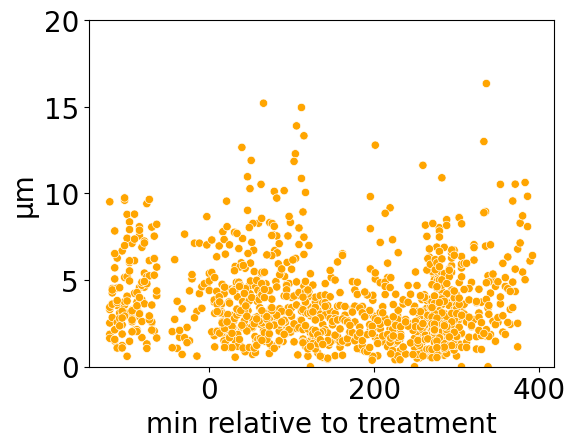

In [40]:
#PLOTTING HOMEOSTASIS AND EARLY DEPLETION FOR MANUAL 
#BASED ON /Users/secchim/Downloads/neighbour_tracks230905.csv

#First must import medatadata
# print(data['file'])
#make sure that date is in reverse format for both imaging date and acquisition date 23-07-17
# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
# metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')

# for i,b in data.iterrows():
#     file=data.loc[i,'file']
#     # print(file)
#     if'_[' in file:
#         ind=file.index('_[')#_Ch3_xyzCorrected.tif - T=0.tiff
#         rep=file[ind:]
#         file_init=file.replace(rep, '_')
#         data.loc[i,'File_ID']=file_init
#     elif '_VWF' in file:
#         ind=file.index('_VWF')#_Ch3_xyzCorrected.tif - T=0.tiff
#         rep=file[ind:]
#         file_init=file.replace(rep, '_')
#         data.loc[i,'File_ID']=file_init
# # print(data['File_ID'])

# metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
# # print(metadata['File_ID'])
# metadata=metadata[['File_ID','AcquisitionTime','Time of treatment', 'AcquisitionDate']].drop_duplicates()
# datab=pd.merge(data, metadata[:], on = 'File_ID')
# print(datab)

#Second must calculate Relative_treatment_time

#time per timepoint
from datetime import datetime
from datetime import timedelta
# print(str(data['AcquisitionDate']),str(data['AcquisitionTime']))
#https://docs.python.org/3/library/datetime.html#timedelta-objects
data=datab
data['Timeframe_Time']=data['AcquisitionTime']
for i in datab.index:
    #worked
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'Metadata_Timepoint'])))


#relative time per timepoint

data['Relative_treatment_Time']=data['Time of treatment']
for i in data.index:
    # print(type(data.loc[i,'Time of treatment']))
    if type(data.loc[i,'Time of treatment'])!=float:
        if data.loc[i, 'Time of treatment']=='na':
            data.loc[i, 'Relative_treatment_Time']=0
        else:
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment'])))))/60
            # print(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'Treat_Time']))))
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment']))))))/60
            if data.loc[i,'Treatment']=='24h_depletion':
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'AcquisitionDate']+' '+(data.loc[i, 'Time of treatment']))))+timedelta(days=1)))/60
            else:
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i,'AcquisitionDate']+' '+(data.loc[i,'Time of treatment'])))))/60
    else:
        data.loc[i, 'Relative_treatment_Time']=0


# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=20

##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
data=data[data['Treatment']!='24h_depletion']
data=data[data['Treatment']!='ageing']
dflist=[]
# dx=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']#DP
dx=data[data['Hoxb5_status_corrected']=='hoxb5']#DP
for i,b in dx.iterrows():
    if dx.loc[i,'Relative_treatment_Time']<0 and dx.loc[i,'Final_Cell_ID'] not in dflist:
        dflist.append(dx.loc[i,'Final_Cell_ID'])
print(len(dflist))

##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="distance", hue='Hoxb5_status_corrected', hue_order=('Hoxb5_vwf','hoxb5'), palette=('green','orange'),data=dx)
g.set(ylim=(0, 20))
plt.legend([], [], frameon=False)
g.set(ylabel='μm')
g.set(xlabel='min relative to treatment')

In [ ]:
#### t-test not assuming equal variance

from scipy.stats import ttest_ind
#https://www.statology.org/pandas-t-test/

dx=datax[datax['Hoxb5_status_corrected']== 'Hoxb5_vwf']
group1=dx[dx['Treatment']== 'homeostasis']
group2=dx[dx['Treatment']== '24hdepletion']
# ttest_ind(group1['mean_speed'], group2['mean_speed'], equal_var=False)
ttest_ind(group1['track_length'], group2['track_length'], equal_var=False)

Ttest_indResult(statistic=10.84598501496075, pvalue=7.692660223805066e-23)

In [ ]:
dx=data[data['Hoxb5_status_corrected']=='hoxb5']
hoxb5list=dx['Final_Cell_ID'].unique()
print(len(hoxb5list))
dx=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']
hoxb5vwflist=dx['Final_Cell_ID'].unique()
print(len(hoxb5vwflist))

dx=data[data['Hoxb5_status_corrected']=='hoxb5']
dx=dx[['Treatment', 'Hoxb5_status_corrected']]
dx=dx.drop_duplicates()
print(dx)
print((dx[dx['Treatment']=='homeostasis']))

# dx=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']
# dx=dx[['Treatment', 'Hoxb5_status_corrected']]
# dx=dx.drop_duplicates()
# print(dx)

56
21
         Treatment Hoxb5_status_corrected
0      homeostasis                  hoxb5
472      depletion                  hoxb5
706   24hdepletion                  hoxb5
1074        ageing                  hoxb5
     Treatment Hoxb5_status_corrected
0  homeostasis                  hoxb5


New size: [12, 9]


[Text(0, 0.5, 'Linearity coefficient')]

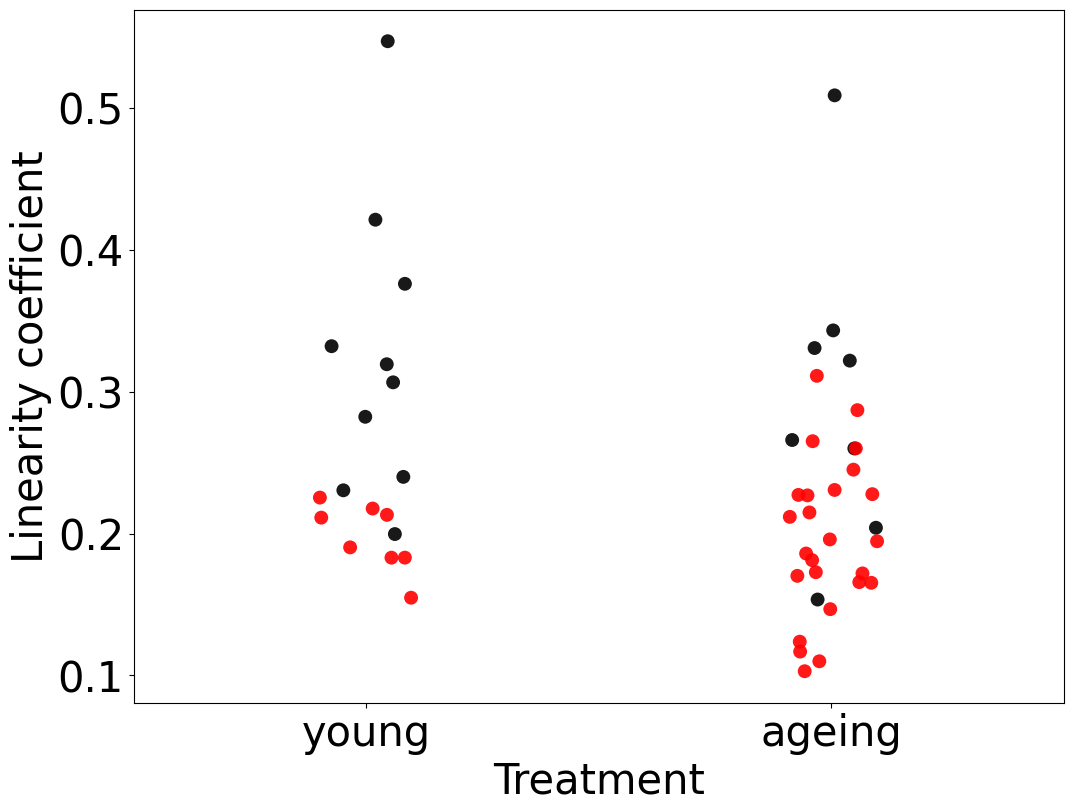

In [95]:
#PLOTTING HOMEOSTASIS AND AGEING 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
# plt.rcParams['axes.labelsize']=15
plt.rcParams["font.size"]=30
print ("New size:", fig_size)

data=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks231011.csv', header=0) ###all tracks are 21 frames 

datax=data[data['Treatment']!='depletion']
datax=datax[datax['Treatment']!='24hdepletion']
datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
datax['Treatment']=datax['Treatment'].str.replace('homeostasis','young')

##TRACK LENGTH

# # # Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'max_displacement','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('young','ageing')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="max_displacement", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('young','ageing')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='µm')
# plt.show(g)
# # model = ols('max_displacement ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Group'], alpha=0.05).summary()

# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'track_length','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="track_length", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('young','ageing')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="track_length", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('young','ageing')))
# # plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='µm')
# plt.show(g)
# model = ols('track_length ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['track_length'], dx['Group'], alpha=0.05).summary()

# ## MAXIMUM DISPLACEMENT

# # Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'max_displacement','Group']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="max_displacement", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='µm')
# # g[1].set(ylim=(0,6000))
# plt.show(g)
# model = ols('max_displacement ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Group'], alpha=0.05).summary()

# ##ARREST COEFFICIENT
##Full dataset
# datax=data[data['Treatment']!='depletion']
# datax=datax[datax['Treatment']!='24hdepletion']
# datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'arrest_coefficient','Final_Cell_ID','Group']]
# dx=dx.drop_duplicates()

# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Arrest coefficient')
# plt.show(g)

# # model = ols('arrest_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # sm.stats.anova_lm(model, typ=2)
# # # # sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Treatment'], alpha=0.05).summary()
# # # # sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['arrest_coefficient'], dx['Group'], alpha=0.05).summary()


###MEAN SPEED
# #Full dataset
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'mean_speed','Group']]
# dx['mean_speed']=dx['mean_speed']*60
# dx=dx.drop_duplicates()

# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="mean_speed", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="mean_speed", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='µm/min')
# plt.show(g)

# model = ols('mean_speed ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(dx['mean_speed'], dx['Group'], alpha=0.05).summary()

# ##LINEARITY COEFFICIENT
# # #Only cells that moved
# datax=data[data['Treatment']!='depletion']
# datax=datax[datax['Treatment']!='24hdepletion']
# datax['Group']=datax['Hoxb5_status_corrected']+datax['Treatment']
# datax=datax[datax['max_displacement']>10]
# dx=datax[['Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Linearity coefficient')
# plt.show(g)
# # model = ols('linearity_coefficient ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # sm.stats.anova_lm(model, typ=2)
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Treatment'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['linearity_coefficient'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()


###COLOR COODED LINEARITY COEFFICIENT
##ONLY HOXB5+ CELLS OVER 10um
datax=datax[['Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient','max_displacement']]
datax=datax[datax['Hoxb5_status_corrected']=='hoxb5']
datax=datax[datax['max_displacement']>10]
for b,r in datax.iterrows():
    if datax.loc[b,'max_displacement']<20 and datax.loc[b,'max_displacement']>10:
        datax.loc[b,'over20']='under20'
    elif datax.loc[b,'max_displacement']>20:
        datax.loc[b,'over20']='over20'
datax=datax.drop_duplicates()
# print(datax['over20'])
g=sns.stripplot(x=("Treatment"), hue='over20', y="linearity_coefficient", data=datax, dodge=False, jitter=True, palette=('red','black'), alpha=0.9, size=10, order=('young','ageing'))
plt.legend([], [], frameon=False)
g.set(ylabel='Linearity coefficient')


#PIES OF MAXIMUM DISPLACEMENT OVER 20UM
# list=[ 'Hoxb5_vwfhomeostasis','hoxb5homeostasis', 'Hoxb5_vwfageing', 'hoxb5ageing']
# # print(len(list))
# n=-1
# fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
# for ax in axs.flat:
#     # print(ax)
#     n=n+1
#     a=list[n]
#     # print(a)
#     dx=datax[datax['Group']== a][['max_displacement','Final_Cell_ID']].drop_duplicates()
#     # print(dx)
#     # over20=(len(dx[dx['max_displacement']>20])/len(dx['max_displacement']))*100
#     over20=(len(dx[dx['max_displacement']>20]))
#     rest=(len(dx['max_displacement']))-over20
#     print(a, over20, rest)


###all tracks are 21 frames 
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     # print(newdf.shape[0])
#     if newdf.shape[0]<21:
#         print("under21", i)
#     elif newdf.shape[0]==21:
#         print("==21", i)


###https://www.pythonfordatascience.org/anova-python/
### type https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/4030020334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/4030020334.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['FileID']=datab['file'].str[0:52]
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/4030020334.py:22: FutureWarning: In a future version of pandas, a length 1 tuple w

92


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


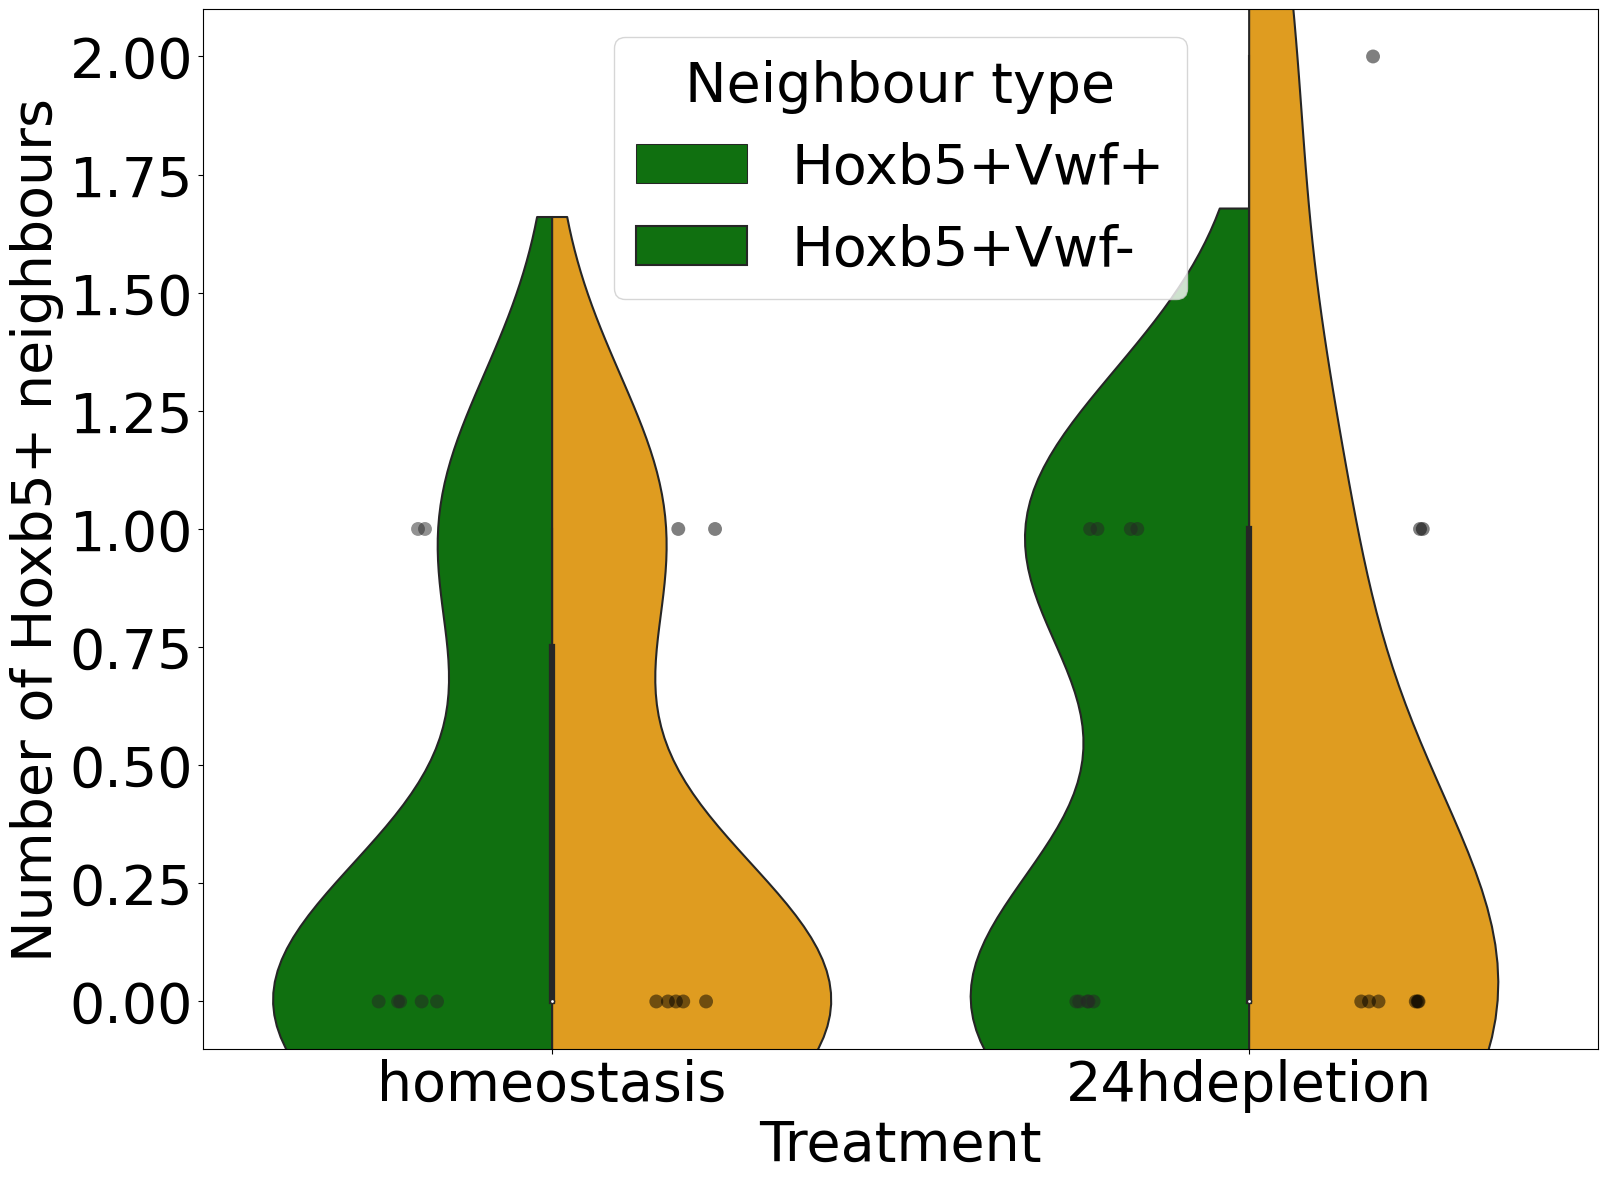

In [ ]:
#calculating number of neighbours from the manual tracks

# Set figure width to 12 and height to 9
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 18
# fig_size[1] = 13.5
# plt.rcParams["figure.figsize"] = fig_size
# plt.rcParams["font.size"]=40
# print ("New size:", fig_size)
data=pd.read_csv('/Users/secchim/Downloads/manual_small_tracks230805.csv', header=0)

# datax=data[data['track_length']!=0]
datax=datax[datax['Treatment']!='ageing']
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'track_length','file']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

datab['FileID']=datab['file'].str[0:52]
print(len(datab['FileID'].unique()))

grouped=datab.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    newdf['KuO']=(len(newdf['Final_Cell_ID'].unique())-1)
    for i, r in newdf.iterrows():
        if 'hoxb5' in newdf.loc[i,'Hoxb5_status_corrected']:
            newdf.loc[i,'KuO_vwf-']=(len(newdf[newdf['Hoxb5_status_corrected']=='hoxb5']['Final_Cell_ID'].unique()))-1
            newdf.loc[i,'KuO_vwf']=(len(newdf[newdf['Hoxb5_status_corrected']=='Hoxb5_vwf']['Final_Cell_ID'].unique()))
        elif 'Hoxb5_vwf' in newdf.loc[i,'Hoxb5_status_corrected']:
            newdf.loc[i,'KuO_vwf-']=(len(newdf[newdf['Hoxb5_status_corrected']=='hoxb5']['Final_Cell_ID'].unique()))
            newdf.loc[i,'KuO_vwf']=(len(newdf[newdf['Hoxb5_status_corrected']=='Hoxb5_vwf']['Final_Cell_ID'].unique()))-1
    dflist.append(newdf)
datab=pd.concat(dflist)


# dx=datab[['Treatment', 'Hoxb5_status_corrected', 'KuO','Group','Final_Cell_ID']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="KuO", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="KuO", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Number of Hoxb5+Vwf- neighbours')
# plt.show(g)
# # model = ols('track_length ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['track_length'], dx['Group'], alpha=0.05).summary()

# dx=datab[['Treatment', 'Hoxb5_status_corrected', 'KuO_vwf','Group','Final_Cell_ID']]
# dx=dx.drop_duplicates()
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="KuO_vwf", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="KuO_vwf", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Number of Hoxb5+Vwf+ neighbours')
# plt.show(g)

dx=datab[['Treatment', 'Hoxb5_status_corrected', 'KuO_vwf-','KuO','KuO_vwf','Group','Final_Cell_ID']]
dx=dx.drop_duplicates()
# dx.to_csv('/Users/secchim/Downloads/KUOneighbours.csv')

dx=pd.read_csv('/Users/secchim/Downloads/KUOneighbours.csv', header=0)

# g=(sns.catplot(x=("Treatment"),col='Hoxb5_status_corrected', hue='status', y=('KuO'), data=dx, dodge=True, alpha=0.5, s=10, col_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
#    , sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="KuO_vwf", data=dx, dodge=True, color='green', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="KuO_vwf", data=dx, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion')))
# plt.legend(title='Cell type', loc='upper right', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='Number of Hoxb5+ neighbours')
# dx=dx[dx['Treatment']!='depletion']
# dx=dx[dx['Treatment']!='24hdepletion']
# g=(sns.violinplot(x=("Hoxb5_status_corrected"), hue='status', y="KuO", data=dx, showfliers = False, palette=['green','orange'], hue_order=('KuO_vwf','KuO_vwf-'), order=('Hoxb5_vwf','hoxb5'), split=True), sns.stripplot(x=("Hoxb5_status_corrected"),hue='status', y="KuO", data=dx, dodge=False, palette= ['green','orange'], alpha=0.5, s=10, hue_order=('KuO_vwf','KuO_vwf-'), order=('Hoxb5_vwf','hoxb5')))
# plt.legend(title='Cell type', loc='upper left', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # # plt.legend([], [], frameon=False)
# g[1].set(ylabel='Number of Hoxb5+ neighbours')
# plt.show(g)

# # model = ols('KuO ~  C(Hoxb5_status_corrected) + C(Treatment)', data=dx).fit()
# # sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Treatment'], alpha=0.05).summary()
# # # sm.stats.multicomp.pairwise_tukeyhsd(dx['max_displacement'], dx['Hoxb5_status_corrected'], alpha=0.05).summary()
# # sm.stats.multicomp.pairwise_tukeyhsd(dx['track_length'], dx['Group'], alpha=0.05).summary()

dx=dx[dx['Hoxb5_status_corrected']!='hoxb5']
dx=dx[dx['Treatment']!='depletion']
g=(sns.violinplot(x=("Treatment"), hue='status', y="KuO", data=dx, showfliers = False, palette=['green','orange'], hue_order=('KuO_vwf','KuO_vwf-'), order=('homeostasis','24hdepletion'), split=True), sns.stripplot(x=("Treatment"),hue='status', y="KuO", data=dx, dodge=True, color='black', alpha=0.5, s=10, hue_order=('KuO_vwf','KuO_vwf-'), order=('homeostasis','24hdepletion')))
plt.legend(title='Neighbour type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend([], [], frameon=False)
g[1].set(ylabel='Number of Hoxb5+ neighbours')
plt.show(g)



/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_46025/491285877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_46025/491285877.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['FileID']=datab['file'].str[0:52]
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_46025/491285877.py:26: FutureWarning: In a future version of pandas, a length 1 tuple w

['VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii1_VWF_'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_[ii2_VWF_'
 'VWF_053_MS220209_M1_movie3depletion_[ii2_VWF_053_MS2'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii0_VWF_053_M'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii1_VWF_053_M'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii2_VWF_053_M'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii3_VWF_053_M'
 'VWF_053_MS220209_M1_movie2homeostasis_[ii4_VWF_053_M'
 'VWF_048_MS220119_M1_homeostasis_movie_3_[ii1_VWF_048'
 'VWF_048_MS220118_M3_movie2homeostasis_[ii2_VWF_048_M'
 'VWF_048_MS220118_M3_movie1plt_[ii0_VWF_048_MS220118_'
 'VWF_048_MS220118_M2_movie3_homeostasis_[ii1_VWF_048_'
 'VWF_048_MS220118_M2_movie3_homeostasis_[ii0_VWF_048_'
 'VWF_048_MS220118_M2_movie3_homeostasis_[ii2_VWF_048_'
 'VWF_043_MS211125_m4-homeostasismovie_2_[ii1_VWF_043_'
 'VWF_043_MS211125_m4-pltdepletionmovie2_[ii0_VWF_043_'
 'VWF_043_MS211125_m4-pltdepletionmovie3_[ii0_VWF_043_'
 'VWF_043_MS211125_m4-pltdepletionmovie2_[ii1_VW

<AxesSubplot: xlabel='min_distance_to_kuo', ylabel='Count'>

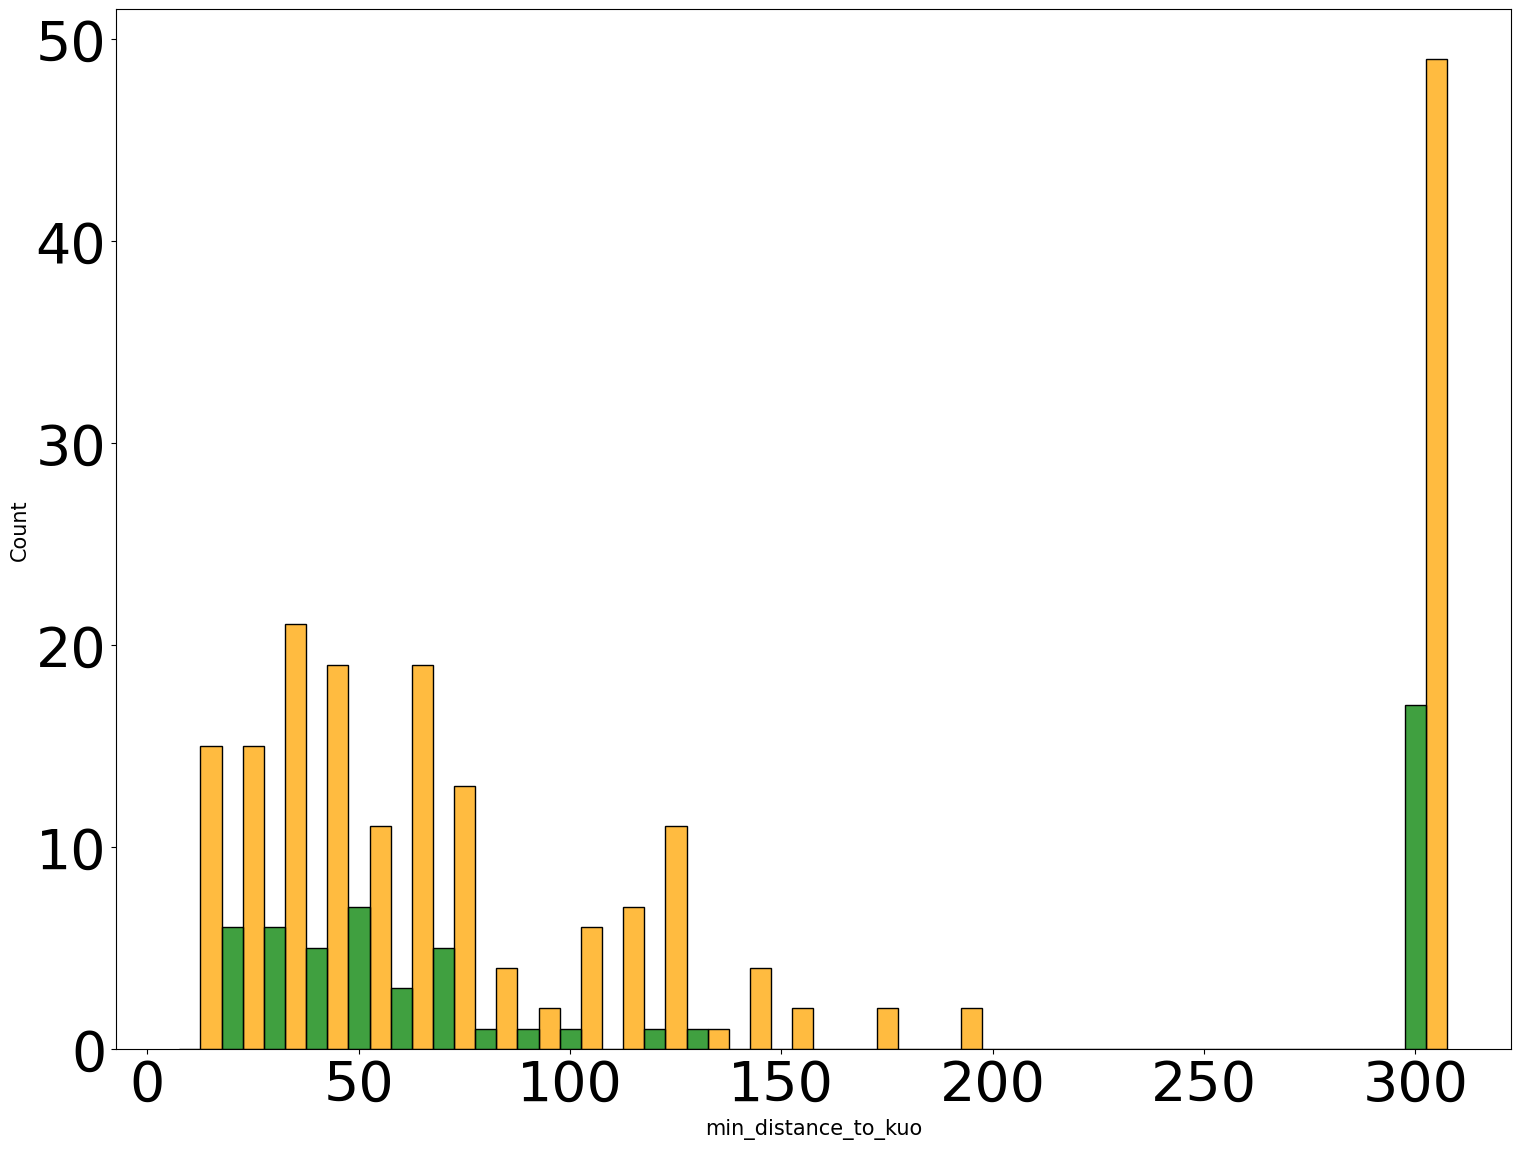

In [ ]:
#attempt to calculate distances between KuO
# data=pd.read_csv('/Users/secchim/Downloads/manual_small_tracks230805.csv', header=0)
datax=pd.read_csv('/Users/secchim/Downloads/neighbour_tracks230905.csv', header=0)

# datax=data[data['track_length']!=0]
# datax=datax[datax['Treatment']!='ageing']
# datax=datax[datax['Treatment']!='depletion']
# datax=datax[datax['Treatment']!='24hdepletion']
# datax=datax[datax['Treatment']!='homeostasis']
# datax=datax[datax['Metadata_Timepoint']!='1']
datab=datax[['Final_Cell_ID', 'file','Treatment', 'Hoxb5_status_corrected', 'x', 'y','z','Metadata_Timepoint']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

datab['FileID']=datab['file'].str[0:52]
print((datab['FileID'].unique()))

dict={}
dict=dict.fromkeys(datab['Final_Cell_ID'].unique())
# print(dict, type(dict))


df_list=[]
# datab['min_distance_to_kuo']=10000000
grouped=datab.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    if len(newdf['Final_Cell_ID'].unique())>1:
        for a in newdf['Final_Cell_ID'].unique():
            for b in newdf['Final_Cell_ID'].unique():
                if a!=b:
                    a_coordinates=newdf[newdf['Final_Cell_ID']==a]
                    tmpta=min(a_coordinates['Metadata_Timepoint'])
                    b_coordinates=newdf[newdf['Final_Cell_ID']==b]
                    tmptb=min(b_coordinates['Metadata_Timepoint'])
                    print(tmpta, tmptb)
                    if tmpta!=tmptb and tmptb in a_coordinates['Metadata_Timepoint'].unique():
                        tmpta=max(tmpta,tmptb)
                        print(tmpta, tmptb)
                        a_coordinates=a_coordinates[a_coordinates['Metadata_Timepoint']==tmpta]
                        b_coordinates=b_coordinates[b_coordinates['Metadata_Timepoint']==tmpta]
                        min_distance_to_kuo=mt.sqrt((a_coordinates.iloc[0,4]-b_coordinates.iloc[0,4])**2+(a_coordinates.iloc[0,5]-b_coordinates.iloc[0,5])**2+(a_coordinates.iloc[0,6]-b_coordinates.iloc[0,6])**2)
                        # print(dict[a])
                        if dict[a]==None: 
                            dict[a]=min_distance_to_kuo
                        elif dict[a]>min_distance_to_kuo:
                            dict[a]=min_distance_to_kuo
                    elif tmpta==tmptb:
                        print("tmpta==tmptb")
                    
                        a_coordinates=a_coordinates[a_coordinates['Metadata_Timepoint']==tmpta]
                        b_coordinates=b_coordinates[b_coordinates['Metadata_Timepoint']==tmpta]
                        min_distance_to_kuo=mt.sqrt((a_coordinates.iloc[0,4]-b_coordinates.iloc[0,4])**2+(a_coordinates.iloc[0,5]-b_coordinates.iloc[0,5])**2+(a_coordinates.iloc[0,6]-b_coordinates.iloc[0,6])**2)
                        # print(dict[a])
                        if dict[a]==None: 
                            dict[a]=min_distance_to_kuo
                        elif dict[a]>min_distance_to_kuo:
                            dict[a]=min_distance_to_kuo
                    else:
                        print("else occured")
                    # if newdf.iloc[1,'min_distance_to_kuo']>min_distance_to_kuo:
                        # newdf['min_distance_to_kuo']=min_distance_to_kuo
                    # dflist.append(newdf)
# datab=pd.concat(dflist)    
# print(datab['min_distance to kuo'])
print(dict)
addup=pd.DataFrame.from_dict(dict, orient='index', columns=['min_distance_to_kuo'])
addup=addup.fillna(300) #gives a value of 300 to cells that don't have a KuO neighbour
addup['Final_Cell_ID']=addup.index
# for i,r in datab.iterrows():
#     if datab.iloc[i,'Final_Cell_ID'] in dict.keys():
#         datab.iloc[i,'min_distance_to_kuo']=dict[(datab.iloc[i,'Final_Cell_ID'])].values()
# print(datab['min_distance_to_kuo'])

# print(addup[:])


data=pd.merge(datab, addup[:], on = 'Final_Cell_ID')
print(data['min_distance_to_kuo'])
data=data[[ 'Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'min_distance_to_kuo','Group']]
data=data.drop_duplicates()
data.to_csv('/Users/secchim/Downloads/min_kuo_distances.csv', index=False)

##plotting one cell type and condition at a time 
# sns.scatterplot(x='FileID',y="min_distance_to_kuo", style='Treatment', hue='Hoxb5_status_corrected', data=data, legend=False)
# data=data[data['Treatment']=='ageing']
# sns.displot(data, x="min_distance_to_kuo", hue="Hoxb5_status_corrected", kind="kde", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# data=data[data['Hoxb5_status_corrected']=='hoxb5']
#histplot best to represent this data
sns.histplot(data, x="min_distance_to_kuo", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge")

##these first few lines not good
# g=(sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion'), split=True, legend=False), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion'), legend=False))
# g=(sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','ageing'), split=True, legend=False), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','ageing'), legend=False))
# plt.legend(title='Mininum distance to other KuO+', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend([], [], frameon=False)
# g[1].set(ylabel='Minimum distance to other KuO+ cells (µm)')
# plt.ylim(0,500)
# plt.show(g)
##this one works fine, plotting all conditions and cell groups at once
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','depletion','24hdepletion'), legend=False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','ageing'), legend=False)


##STATS
# data=data[data['Treatment']!='depletion']###When excluding na, compare only homeostasis and 24hdepletion
# model = ols('min_distance_to_kuo ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Group'], alpha=0.05).summary()

In [ ]:
#calculating proportion of cells moving more than 20um from the manual tracks (regardless of track length)
list2=[]
data=pd.read_csv('/Users/secchim/Downloads/manual_tracks230711.csv', header=0)
datax=data[data['Treatment']!='ageing']
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'track_length','file']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

for i in datab['Group'].unique():
    d=datab[datab['Group']==i]
    d=d[['Group', 'max_displacement','Final_Cell_ID']]
    d=d.drop_duplicates()
    print(d)
    list2.append(d['Final_Cell_ID'].unique())
print(list2)


data=pd.read_csv('/Users/secchim/Downloads/manual_small_tracks230805.csv', header=0)

# datax=data[data['track_length']!=0]
datax=data[data['Treatment']!='ageing']
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'track_length','file']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

list=[]
for i in datab['Group'].unique():
    d=datab[datab['Group']==i]
    d=d[['Group', 'max_displacement','Final_Cell_ID']]
    d=d.drop_duplicates()
    print(d)
    list.append(d['Final_Cell_ID'].unique())
    print(list)
    # over20=(len(d[d['max_displacement']>20])/len(d['max_displacement']))*100
    # print(i, over20)
    # topl=[over20, (100-over20)]
    # plt.pie(topl, labels =['track length over20um', 'track length under 20um'], colors=('blue','pink'), autopct='%1.1f%%')
    # plt.show()


# for i in d['Final_Cell_ID'].unique():
#         if i not in list2:
#             list.append(i)

# print('this is the list', list)

                  Group  max_displacement  Final_Cell_ID
0     homeostasis_hoxb5          6.498524           1.10
84    homeostasis_hoxb5          6.755369           1.40
126   homeostasis_hoxb5         17.671498           3.10
147   homeostasis_hoxb5         14.782966           3.11
189   homeostasis_hoxb5         22.167284           3.40
210   homeostasis_hoxb5         38.826460           3.50
231   homeostasis_hoxb5         20.548757           3.60
315   homeostasis_hoxb5          5.912754           7.10
336   homeostasis_hoxb5         13.572396           8.10
357   homeostasis_hoxb5         18.203331           8.20
399   homeostasis_hoxb5         61.004430          10.10
1176  homeostasis_hoxb5         43.429721          24.40
1197  homeostasis_hoxb5         20.088812          24.50
1218  homeostasis_hoxb5         17.376877          24.60
1239  homeostasis_hoxb5         13.494984          24.70
1869  homeostasis_hoxb5          8.311973          31.10
1890  homeostasis_hoxb5        

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/3978246686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/3978246686.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']


In [ ]:
data=pd.read_csv('/Users/secchim/Downloads/manual_small_tracks230805.csv', header=0)

# datax=data[data['track_length']!=0]
datax=datax[datax['Treatment']!='ageing']
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'track_length','file','Metadata_Timepoint','x','y','z']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

datab['FileID']=datab['file'].str[0:52]
print(len(datab['FileID'].unique()))

grouped=datab.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    if len(newdf['Final_Cell_ID'].unique())>2:
        newdf=newdf[newdf['Metadata_Timepoint']==1]
        newdf["x_next"] = newdf["x"].shift(-1)
        newdf["y_next"] = newdf["y"].shift(-1)
        newdf["z_next"] = newdf["z"].shift(-1)
        for b, r in newdf.iterrows():
            # if (newdf.loc[b, 'Last_timepoint'])== False: 
            # try:#will it work for the last cell?
            newdf.loc[b, "KuOdistance"]=(mt.sqrt((newdf.loc[b, "x"]-newdf.loc[b, "x_next"])**2+(newdf.loc[b, "y"]-newdf.loc[b, "y_next"])**2+(newdf.loc[b, "z"]-newdf.loc[b, "z_next"])**2))
        newdf['minKuOdistance']=newdf['KuOdistance'].min()# is not right
        dflist.append(newdf)
d=pd.concat(dflist)
print(d[['minKuOdistance','Final_Cell_ID']].drop_duplicates())        
        # for i in newdf['Final_Cell_ID'].unique():
            # storedX=newdf[newdf['Final_Cell_ID']==i]['x'].values
# d=d[d['Treatment']!='ageing']
d.to_csv('/Users/secchim/Downloads/KUOdistance.csv')

92
      minKuOdistance  Final_Cell_ID
21         43.257896            1.2
63         43.257896            1.3
84         43.257896            1.4
677        26.340818           15.3
691        26.340818           15.4
705        26.340818           15.5
1954       24.429530           28.3
1975       24.429530           28.4
1996       24.429530           28.5
2017       66.808712           28.6
2038       66.808712           28.7
2059       66.808712           28.8
2465       45.427871           31.4
2486       45.427871           31.5
2498       45.427871           31.6
2510       45.427871           31.7
2568      120.172899           32.1
2589      120.172899           32.2
2673      120.172899           32.6
2631       58.762153           32.4
2652       58.762153           32.5
2694       58.762153           32.7


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/3170073785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/3170073785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['FileID']=datab['file'].str[0:52]
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_4074/3170073785.py:13: FutureWarning: In a future version of pandas, a length 1 tuple wil

In [31]:
#TRACKING USING ILASTIK SEGMENTATION DIRECTLY

#if movies are in lots of different folders
file_list=[]

folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/16_Ilastik_tracked'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('tiff.csv'):
            # file_list.append(os.path.join(root,file))
            try:
                data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
                ind=file.index("_Ch8_xyzCorrected.tiff")
                rep=file[ind:]
                file_init=file.replace(rep, '')
                data['file']=file_init
                file_list.append(data)
            except:
                print('error with file', file)

dataall=pd.concat(file_list, axis =0, ignore_index=True)
# dataall['Metadata_VWF']=(dataall['file']).str[0:19]
# print(dataall.shape[0])
dataall=dataall[dataall['RADIUS']>3] #filter out a few pixels accidentally segmented
# print(dataall['file'])
# print(dataall.shape[0])

#make sure that date is in reverse format for both imaging date and acquisition date 23-07-17
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata['file']=metadata['Original_Filename'].str.replace(r'.czi','')+'_'+metadata['Cell_name']
print(metadata['file'])
# metadata['Metadata_VWF']=(metadata['Position_Name']).str[0:19]
# metadata.drop_duplicates()
data=pd.merge(dataall, metadata[:], on = 'file')
print(data)

data['corrected_x_2']=(data['Position_X']*(data['Scale_X'])*1000000)
data['corrected_y_2']=(data['Position_X']*(data['Scale_Y'])*1000000)
data['corrected_z_2']=(data['Position_X']*(data['Scale_Z'])*1000000)

data['Final_Cell_ID']=data['file'].astype(str)+'_'+data['TRACK_ID'].astype(str)
data=data.drop_duplicates()
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/231015_Ilastik_movies.csv')

data['Final_Cell_ID']=data['file'].astype(str)+'_'+data['TRACK_ID'].astype(str)
print(len(data['Final_Cell_ID'].unique()))

# #REMOVE TRACKS SHORTER THAN 10 frames
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>10:
        dflist.append(newdf)
data=pd.concat(dflist)   
print(len(data['Final_Cell_ID'].unique()))
         


error with file VWF_048_MS220120_M2_movie13_depletion_P11_Ch8_xyzCorrected.tiff.csv
error with file VWF_066_MS220519_M2_movie1k_P6k_Ch8_xyzCorrected.tiff.csv
error with file VWF_043_MS211118_m1-p5_11_12_homeostasismovie_P11_Ch8_xyzCorrected.tiff.csv
error with file VWF_066_MS220519_M2_movie1k_P12_2k_mk_Ch8_xyzCorrected.tiff.csv
error with file VWF_048_MS220118_M3_movie3plt_P22+_Ch8_xyzCorrected.tiff.csv
error with file VWF_043_MS211125_m3-homeostasis_movie_M1_Ch8_xyzCorrected.tiff.csv
error with file VWF_063_MS220428_m2_movie1_P24MK_Ch8_xyzCorrected.tiff.csv
error with file VWF_049_MS220201_M1_Snap_movie7depletion_P12DP_Ch8_xyzCorrected.tiff.csv
error with file VWF_048_MS220120_M2_movie18_depletion_P11_Ch8_xyzCorrected.tiff.csv
error with file VWF_067_220526_M2_movie1_P9_Ch8_xyzCorrected.tiff.csv
error with file VWF_043_MS211118_m1-p5_11_12_homeostasismovie_P5_Ch8_xyzCorrected.tiff.csv
error with file VWF_067_220526_M2_movie1_P8_Ch8_xyzCorrected.tiff.csv
error with file VWF_043_MS21111

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/1248082805.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['file']=metadata['Original_Filename'].str.replace(r'.czi','')+'_'+metadata['Cell_name']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_5260/1248082805.py:51: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [84]:
data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/231015_Ilastik_movies.csv')
data['Final_Cell_ID']=data['file'].astype(str)+'_'+data['TRACK_ID'].astype(str)
print(len(data['Final_Cell_ID'].unique()))
# #REMOVE TRACKS SHORTER THAN 10 frames
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>10:
        dflist.append(newdf)
data=pd.concat(dflist)   
print(len(data['Final_Cell_ID'].unique()))
#correcting treatment 
data['Timeframe_Time']=data['AcquisitionTime']
for i in data.index:
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'FRAME'])))   
#relative time per timepoint
data['Relative_treatment_Time']=data['Time of treatment']
for i in data.index:
    if type(data.loc[i,'Time of treatment'])!=float:
        if data.loc[i, 'Time of treatment']=='na':
            data.loc[i, 'Relative_treatment_Time']=0
        else:
            if data.loc[i,'Treatment']=='24h_depletion':
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'AcquisitionDate']+' '+(data.loc[i, 'Time of treatment']))))+timedelta(days=1)))/60
            else:
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i,'AcquisitionDate']+' '+(data.loc[i,'Time of treatment'])))))/60
    else:
        dw.loc[i, 'Relative_treatment_Time']=0
data['Treatment_corrected']=data['Treatment']
for i in dw.index:
    if data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='24h_depletion':
        data.loc[i, 'Treatment_corrected']='24h_depletion'
    else:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    print(data.loc[i, 'Treatment_corrected'], data.loc[i, 'Relative_treatment_Time'], data.loc[i, 'Treatment'])

data["corrected_x_2"] = data["POSITION_X"]
data["corrected_y_2"] = data["POSITION_Y"]
data["corrected_z_2"] = data["POSITION_Z"]
data['Metadata_Timepoint']= data['FRAME']
#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

# #REMOVE FRAMES LONGER THAN 1H 

# # print(data['Metadata_Timepoint'])
# data=data[data['Metadata_Timepoint']!='na']
# data['Metadata_Timepoint']=data['Metadata_Timepoint'].astype(int)
# # data=data[data['Metadata_Timepoint']<22]

#NORMALIZING POSITIONS TO THE FIRST COORDINATES

grouped=data.groupby(['Final_Cell_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['corrected_x_2'].values
    norm_y=newdf2['corrected_y_2'].values
    norm_z=newdf2['corrected_z_2'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['x']=(newdf['corrected_x_2']-newdf['norm_x'])
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['y']=(newdf['corrected_y_2']-newdf['norm_y'])
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['z']=(newdf['corrected_z_2']-newdf['norm_z'])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

data=data.drop_duplicates()
data['Track_length_in_timepoint']=None
data['MSD']=None
data['variance_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]

for i, newdf in grouped:
        # newdf2.dropna()
        if newdf.shape[0]>=2:
            for b, r in newdf.iterrows():
                if (newdf.loc[b, "Metadata_Timepoint"])== (newdf['Metadata_Timepoint'].max()):
                    newdf.loc[b, "Last_timepoint"]=True
                else:
                    newdf.loc[b, "Last_timepoint"]=False
        if newdf.shape[0]>=2:
            for b, r in newdf.iterrows():
                if (newdf.loc[b, 'Last_timepoint'])== False: 
                    # try:
                    newdf.loc[b, "distance"]=(mt.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))        
        newdf['track_length']=newdf['distance'].sum()
        stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
        stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
        stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()].iloc[0]
        for b, r in newdf.iterrows():
            newdf.loc[b, "displacement"]=mt.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
        newdf['max_displacement']=newdf['displacement'].max()
        if newdf.shape[0]>=2:
            for b, r in newdf.iterrows():
                if (newdf.loc[b, 'Last_timepoint'])== False: 
                   newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/180)

        newdf['mean_speed']=newdf['frame_speed'].mean()*60
        newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
        for b, r in newdf.iterrows():
            if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
                newdf.loc[b,'arrested']=True
            else :
                newdf.loc[b,'arrested']=False
        newdf4=newdf[newdf['arrested']==True]
        newdf3=newdf[newdf['arrested']==False]
        if ((newdf4.shape[0])+(newdf3.shape[0]))>1:
            newdf['arrest_coefficient']=(newdf4.shape[0])/((newdf4.shape[0])+(newdf3.shape[0]))
        newdf['Track_length_in_timepoint']=newdf.shape[0]*3
        newdf['variance_speed']=newdf['frame_speed'].var(axis=0)
        newdf['MSD']=newdf['distance'].pow(2).mean()

        dflist.append(newdf)
data=pd.concat(dflist)

data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/231109_full_Ilastik_movies.csv')

1091
38


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2347766488.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 0 homeostasis
Homeostasis 

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2347766488.py:68: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2822/2347766488.py:93: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
